In [1]:
import threading
import time
import psutil
import random

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC

# Duration in seconds
duration = 3600
duration_training = 600

# Thread
def validation(stop_event):
    global X_train, y_train, result, x
    while not stop_event.is_set():
        print("VALIDATION ", x)
        x += 1
        data = df.sample(random.randint(1, 100))

        nb_pred = textclassifier.predict(data['text'])

        X_train = X_train.append(data['text'])
        y_train = y_train.append(pd.Series(nb_pred))

        result['accuracy'].append(accuracy_score(data['label'], nb_pred))
        result['f1'].append(f1_score(data['label'], nb_pred, average='weighted'))
        result['precision'].append(precision_score(data['label'], nb_pred, average='weighted'))
        result['recall'].append(recall_score(data['label'], nb_pred, average='weighted'))

        time.sleep(1)


def train(stop_event):
    global y, textclassifier, run_classification
    while not stop_event.is_set():
        print("TRAINING ", y)
        y += 1
        tmp_classifier = Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ('smote', SMOTE(random_state=12)),
            ('svc', SVC(kernel='linear', C=1, random_state=0, verbose=1))
        ])

        # Init First Train
        tmp_classifier.fit(X_train, y_train)
        textclassifier = tmp_classifier
        time.sleep(duration_training)


def record_performance(stop_event):
    global performance, z
    while not stop_event.is_set():
        cpu = psutil.cpu_percent(interval=1)
        memory = psutil.virtual_memory().percent
        print(f"PERFORMANCE : {z}  ---- CPU : {cpu} ---- Memory : {memory}", cpu)
        z += 1
        performance['cpu'].append(cpu)
        performance['memory'].append(memory)

        time.sleep(1)


if __name__ == "__main__":
    x = 1
    y = 1
    z = 1
    df = pd.read_csv(r'F:\Koding_Kopmputasi_berbasis_jaringan\sentiment amalysis dataset\movie.csv')
    X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], random_state=0, train_size=0.8)
    data = df.sample(random.randint(1, 100))
    result = {
        'accuracy': [],
        'f1': [],
        'precision': [],
        'recall': []
    }
    
    performance = {
        'cpu': [],
        'memory': [],
    }

    textclassifier = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('smote', SMOTE(random_state=12)),
        ('svc', SVC(kernel='linear', C=1, random_state=0, verbose=1))
    ])

    # Init First Train
    textclassifier.fit(X_train, y_train)

    event_stop = threading.Event()
    run_classification = True
    t1 = threading.Thread(target=validation, args=(event_stop,)).start()
    t2 = threading.Thread(target=record_performance, args=(event_stop,)).start()

    time.sleep(duration_training)
    t3 = threading.Thread(target=train, args=(event_stop,)).start()

    time.sleep(duration)
    event_stop.set()
    print("Done!")

    

[LibSVM]VALIDATION  1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1  ---- CPU : 60.5 ---- Memory : 40.8 60.5
VALIDATION  2
PERFORMANCE : 2  ---- CPU : 29.7 ---- Memory : 41.0 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  3
PERFORMANCE : 3  ---- CPU : 19.9 ---- Memory : 41.1 19.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  4
PERFORMANCE : 4  ---- CPU : 23.7 ---- Memory : 41.1 23.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 5  ---- CPU : 3.1 ---- Memory : 40.8 3.1
VALIDATION  6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  7
PERFORMANCE : 6  ---- CPU : 9.6 ---- Memory : 40.9 9.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  8
PERFORMANCE : 7  ---- CPU : 24.1 ---- Memory : 41.0 24.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 8  ---- CPU : 33.7 ---- Memory : 41.4 33.7
VALIDATION  10
PERFORMANCE : 9  ---- CPU : 48.3 ---- Memory : 41.0 48.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  11
PERFORMANCE : 10  ---- CPU : 26.0 ---- Memory : 41.0 26.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  12


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 11  ---- CPU : 4.2 ---- Memory : 40.8 4.2
VALIDATION  13


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  14


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 12  ---- CPU : 29.5 ---- Memory : 40.9 29.5
VALIDATION  15


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 13  ---- CPU : 19.5 ---- Memory : 40.8 19.5
VALIDATION  16


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  17
PERFORMANCE : 14  ---- CPU : 4.2 ---- Memory : 40.9 4.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  18
PERFORMANCE : 15  ---- CPU : 29.6 ---- Memory : 41.3 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  19
PERFORMANCE : 16  ---- CPU : 44.0 ---- Memory : 41.6 44.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  20
PERFORMANCE : 17  ---- CPU : 23.4 ---- Memory : 41.0 23.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  21
PERFORMANCE : 18  ---- CPU : 7.3 ---- Memory : 41.2 7.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 19  ---- CPU : 2.3 ---- Memory : 41.1 2.3
VALIDATION  22


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  23
PERFORMANCE : 20  ---- CPU : 3.8 ---- Memory : 41.2 3.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  24
PERFORMANCE : 21  ---- CPU : 9.0 ---- Memory : 41.2 9.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  25


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 22  ---- CPU : 17.2 ---- Memory : 40.9 17.2
VALIDATION  26
PERFORMANCE : 23  ---- CPU : 39.0 ---- Memory : 41.3 39.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  27
PERFORMANCE : 24  ---- CPU : 52.5 ---- Memory : 41.9 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  28
PERFORMANCE : 25  ---- CPU : 33.6 ---- Memory : 41.2 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  29


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 26  ---- CPU : 19.1 ---- Memory : 41.1 19.1
VALIDATION  30


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 27  ---- CPU : 13.5 ---- Memory : 41.1 13.5
VALIDATION  31


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  32
PERFORMANCE : 28  ---- CPU : 4.6 ---- Memory : 41.3 4.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  33
PERFORMANCE : 29  ---- CPU : 6.9 ---- Memory : 41.3 6.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  34


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 30  ---- CPU : 9.3 ---- Memory : 41.2 9.3
VALIDATION  35


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  36


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 31  ---- CPU : 16.7 ---- Memory : 41.5 16.7
VALIDATION  37
PERFORMANCE : 32  ---- CPU : 54.6 ---- Memory : 42.1 54.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  38


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 33  ---- CPU : 21.9 ---- Memory : 41.4 21.9
VALIDATION  39


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 34  ---- CPU : 20.3 ---- Memory : 41.3 20.3
VALIDATION  40


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 35  ---- CPU : 2.7 ---- Memory : 41.3 2.7
VALIDATION  41


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  42
PERFORMANCE : 36  ---- CPU : 1.5 ---- Memory : 41.4 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  43
PERFORMANCE : 37  ---- CPU : 8.2 ---- Memory : 41.4 8.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  44
PERFORMANCE : 38  ---- CPU : 11.9 ---- Memory : 41.3 11.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  45
PERFORMANCE : 39  ---- CPU : 29.6 ---- Memory : 41.5 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  46
PERFORMANCE : 40  ---- CPU : 31.9 ---- Memory : 41.9 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  47
PERFORMANCE : 41  ---- CPU : 25.0 ---- Memory : 41.4 25.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  48
PERFORMANCE : 42  ---- CPU : 15.2 ---- Memory : 41.4 15.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  49
PERFORMANCE : 43  ---- CPU : 14.1 ---- Memory : 41.3 14.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 44  ---- CPU : 3.4 ---- Memory : 41.3 3.4
VALIDATION  50


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  51
PERFORMANCE : 45  ---- CPU : 26.4 ---- Memory : 41.7 26.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  52


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 46  ---- CPU : 24.1 ---- Memory : 41.8 24.1
VALIDATION  53
PERFORMANCE : 47  ---- CPU : 42.4 ---- Memory : 42.0 42.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  54
PERFORMANCE : 48  ---- CPU : 48.8 ---- Memory : 42.1 48.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  55
PERFORMANCE : 49  ---- CPU : 23.4 ---- Memory : 41.4 23.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  56
PERFORMANCE : 50  ---- CPU : 23.8 ---- Memory : 41.4 23.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  57
PERFORMANCE : 51  ---- CPU : 21.9 ---- Memory : 41.4 21.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  58
PERFORMANCE : 52  ---- CPU : 10.8 ---- Memory : 41.4 10.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  59


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 53  ---- CPU : 3.5 ---- Memory : 41.4 3.5
VALIDATION  60


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  61


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 54  ---- CPU : 11.3 ---- Memory : 41.2 11.3
VALIDATION  62
PERFORMANCE : 55  ---- CPU : 46.5 ---- Memory : 41.6 46.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  63


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 56  ---- CPU : 29.3 ---- Memory : 42.0 29.3
VALIDATION  64


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 57  ---- CPU : 14.4 ---- Memory : 41.5 14.4
VALIDATION  65


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 58  ---- CPU : 14.2 ---- Memory : 41.5 14.2
VALIDATION  66


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 59  ---- CPU : 11.3 ---- Memory : 41.3 11.3
VALIDATION  67


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  68


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 60  ---- CPU : 9.2 ---- Memory : 41.4 9.2
VALIDATION  69


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  70
PERFORMANCE : 61  ---- CPU : 3.8 ---- Memory : 41.5 3.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 62  ---- CPU : 7.7 ---- Memory : 41.5 7.7
VALIDATION  71


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 63  ---- CPU : 41.1 ---- Memory : 41.6 41.1
VALIDATION  72


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  73
PERFORMANCE : 64  ---- CPU : 32.8 ---- Memory : 42.2 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  74
PERFORMANCE : 65  ---- CPU : 4.2 ---- Memory : 41.5 4.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 66  ---- CPU : 21.5 ---- Memory : 40.2 21.5
VALIDATION  75


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 67  ---- CPU : 17.8 ---- Memory : 40.2 17.8
VALIDATION  76


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  77
PERFORMANCE : 68  ---- CPU : 4.3 ---- Memory : 40.2 4.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  78
PERFORMANCE : 69  ---- CPU : 12.9 ---- Memory : 40.2 12.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  79
PERFORMANCE : 70  ---- CPU : 15.4 ---- Memory : 40.2 15.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  80
PERFORMANCE : 71  ---- CPU : 33.8 ---- Memory : 40.4 33.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  81
PERFORMANCE : 72  ---- CPU : 41.6 ---- Memory : 41.0 41.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  82
PERFORMANCE : 73  ---- CPU : 9.6 ---- Memory : 40.3 9.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  83
PERFORMANCE : 74  ---- CPU : 7.3 ---- Memory : 40.2 7.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  84


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 75  ---- CPU : 7.8 ---- Memory : 40.6 7.8
VALIDATION  85


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 76  ---- CPU : 9.0 ---- Memory : 40.6 9.0
VALIDATION  86


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 77  ---- CPU : 0.0 ---- Memory : 40.7 0.0
 87


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  88
PERFORMANCE : 78  ---- CPU : 2.3 ---- Memory : 40.4 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 79  ---- CPU : 30.4 ---- Memory : 40.8 30.4
VALIDATION  89


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 80  ---- CPU : 43.3 ---- Memory : 41.0 43.3
VALIDATION  90


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 81  ---- CPU : 26.6 ---- Memory : 40.2 26.6
VALIDATION  91
PERFORMANCE : 82  ---- CPU : 26.6 ---- Memory : 40.2 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  92


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 83  ---- CPU : 6.5 ---- Memory : 40.0 6.5
VALIDATION  93


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 84  ---- CPU : 21.2 ---- Memory : 40.1 21.2
VALIDATION  94


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 85  ---- CPU : 5.1 ---- Memory : 40.1 5.1
VALIDATION  95


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 86  ---- CPU : 9.2 ---- Memory : 40.1 9.2
VALIDATION  96


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  97
PERFORMANCE : 87  ---- CPU : 37.0 ---- Memory : 40.4 37.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  98
PERFORMANCE : 88  ---- CPU : 41.9 ---- Memory : 41.0 41.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  99
PERFORMANCE : 89  ---- CPU : 19.2 ---- Memory : 40.3 19.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  100
PERFORMANCE : 90  ---- CPU : 12.3 ---- Memory : 40.2 12.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  101


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 91  ---- CPU : 1.2 ---- Memory : 40.1 1.2
VALIDATION  102


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 92  ---- CPU : 13.5 ---- Memory : 40.2 13.5
VALIDATION  103


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 93  ---- CPU : 13.5 ---- Memory : 40.1 13.5
VALIDATION  104


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 94  ---- CPU : 1.9 ---- Memory : 40.2 1.9
VALIDATION  105


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 95  ---- CPU : 28.1 ---- Memory : 40.5 28.1
 106


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 96  ---- CPU : 31.2 ---- Memory : 41.1 31.2
VALIDATION  107


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 97  ---- CPU : 10.2 ---- Memory : 40.3 10.2
VALIDATION  108


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  109


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 98  ---- CPU : 14.4 ---- Memory : 40.1 14.4
VALIDATION  110
PERFORMANCE : 99  ---- CPU : 25.8 ---- Memory : 40.1 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  111


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 100  ---- CPU : 14.5 ---- Memory : 40.1 14.5
VALIDATION  112


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 101  ---- CPU : 19.5 ---- Memory : 40.1 19.5
VALIDATION  113


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 102  ---- CPU : 16.0 ---- Memory : 40.2 16.0
VALIDATION  114


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 103  ---- CPU : 31.9 ---- Memory : 40.5 31.9
VALIDATION  115


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 104  ---- CPU : 45.3 ---- Memory : 40.6 45.3
VALIDATION  116


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 105  ---- CPU : 23.5 ---- Memory : 40.5 23.5
VALIDATION  117
PERFORMANCE : 106  ---- CPU : 26.2 ---- Memory : 40.4 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  118
PERFORMANCE : 107  ---- CPU : 22.2 ---- Memory : 40.4 22.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  119
PERFORMANCE : 108  ---- CPU : 14.8 ---- Memory : 40.4 14.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  120


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 109  ---- CPU : 15.0 ---- Memory : 40.4 15.0
VALIDATION  121


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 110  ---- CPU : 23.0 ---- Memory : 40.4 23.0
VALIDATION  122
PERFORMANCE : 111  ---- CPU : 51.2 ---- Memory : 40.8 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  123


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 112  ---- CPU : 48.0 ---- Memory : 40.5 48.0
VALIDATION  124


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 113  ---- CPU : 14.7 ---- Memory : 40.2 14.7
VALIDATION  125


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  126
PERFORMANCE : 114  ---- CPU : 10.2 ---- Memory : 40.1 10.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  127
PERFORMANCE : 115  ---- CPU : 19.5 ---- Memory : 40.1 19.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  128
PERFORMANCE : 116  ---- CPU : 19.2 ---- Memory : 40.1 19.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  129


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 117  ---- CPU : 7.0 ---- Memory : 40.1 7.0
VALIDATION  130


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 118  ---- CPU : 4.2 ---- Memory : 40.0 4.2
VALIDATION  131


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  132
PERFORMANCE : 119  ---- CPU : 46.0 ---- Memory : 40.7 46.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  133
PERFORMANCE : 120  ---- CPU : 30.1 ---- Memory : 40.4 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  134
PERFORMANCE : 121  ---- CPU : 10.8 ---- Memory : 40.4 10.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  135
PERFORMANCE : 122  ---- CPU : 15.0 ---- Memory : 40.2 15.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  136


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 123  ---- CPU : 3.8 ---- Memory : 40.2 3.8
VALIDATION  137


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  138


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 124  ---- CPU : 8.1 ---- Memory : 40.3 8.1
VALIDATION  139


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 125  ---- CPU : 20.7 ---- Memory : 40.3 20.7
VALIDATION  140


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 126  ---- CPU : 19.8 ---- Memory : 40.3 19.8
VALIDATION  141


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  142
PERFORMANCE : 127  ---- CPU : 31.2 ---- Memory : 40.9 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  143


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 128  ---- CPU : 35.0 ---- Memory : 40.4 35.0
VALIDATION  144
PERFORMANCE : 129  ---- CPU : 26.8 ---- Memory : 40.4 26.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  145


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 130  ---- CPU : 13.7 ---- Memory : 40.3 13.7
VALIDATION  146


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  147
PERFORMANCE : 131  ---- CPU : 2.3 ---- Memory : 40.3 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  148
PERFORMANCE : 132  ---- CPU : 27.6 ---- Memory : 40.4 27.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  149


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 133  ---- CPU : 8.0 ---- Memory : 40.3 8.0
VALIDATION  150


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  151


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 134  ---- CPU : 19.2 ---- Memory : 40.7 19.2
VALIDATION  152


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 135  ---- CPU : 50.8 ---- Memory : 41.3 50.8
VALIDATION  153


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 136  ---- CPU : 21.9 ---- Memory : 40.8 21.9
VALIDATION  154


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  155
PERFORMANCE : 137  ---- CPU : 5.4 ---- Memory : 40.8 5.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  156


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 138  ---- CPU : 10.4 ---- Memory : 40.7 10.4
VALIDATION  157


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 139  ---- CPU : 15.8 ---- Memory : 40.7 15.8
VALIDATION  158


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 140  ---- CPU : 23.0 ---- Memory : 40.7 23.0
VALIDATION  159
PERFORMANCE : 141  ---- CPU : 26.6 ---- Memory : 40.7 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  160
PERFORMANCE : 142  ---- CPU : 29.3 ---- Memory : 40.7 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  161
PERFORMANCE : 143  ---- CPU : 52.5 ---- Memory : 41.3 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  162


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 144  ---- CPU : 18.5 ---- Memory : 40.5 18.5
VALIDATION  163


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 145  ---- CPU : 19.5 ---- Memory : 40.5 19.5
VALIDATION  164


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 146  ---- CPU : 9.4 ---- Memory : 40.3 9.4
VALIDATION  165


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 147  ---- CPU : 10.5 ---- Memory : 40.3 10.5
VALIDATION  166


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  167
PERFORMANCE : 148  ---- CPU : 2.3 ---- Memory : 40.3 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 149  ---- CPU : 2.0 ---- Memory : 40.3 2.0
VALIDATION  168


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  169
PERFORMANCE : 150  ---- CPU : 31.1 ---- Memory : 40.5 31.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  170
PERFORMANCE : 151  ---- CPU : 46.2 ---- Memory : 41.1 46.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  171


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 152  ---- CPU : 25.8 ---- Memory : 40.6 25.8
VALIDATION  172


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 153  ---- CPU : 14.0 ---- Memory : 40.6 14.0
VALIDATION  173


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  174
PERFORMANCE : 154  ---- CPU : 10.0 ---- Memory : 40.6 10.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  175
PERFORMANCE : 155  ---- CPU : 24.1 ---- Memory : 40.5 24.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  176


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 156  ---- CPU : 13.7 ---- Memory : 40.4 13.7
VALIDATION  177
PERFORMANCE : 157  ---- CPU : 26.2 ---- Memory : 40.4 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  178


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 158  ---- CPU : 17.2 ---- Memory : 40.6 17.2
VALIDATION  179


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  180
PERFORMANCE : 159  ---- CPU : 39.8 ---- Memory : 41.1 39.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  181
PERFORMANCE : 160  ---- CPU : 23.3 ---- Memory : 40.5 23.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  182
PERFORMANCE : 161  ---- CPU : 20.0 ---- Memory : 40.5 20.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  183


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 162  ---- CPU : 18.4 ---- Memory : 40.6 18.4
VALIDATION  184


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 163  ---- CPU : 26.5 ---- Memory : 40.3 26.5
VALIDATION  185


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 164  ---- CPU : 15.3 ---- Memory : 40.7 15.3
VALIDATION  186


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  187
PERFORMANCE : 165  ---- CPU : 2.3 ---- Memory : 40.8 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  188
PERFORMANCE : 166  ---- CPU : 22.7 ---- Memory : 41.0 22.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 167  ---- CPU : 31.9 ---- Memory : 41.3 31.9
VALIDATION  189


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  190
PERFORMANCE : 168  ---- CPU : 10.9 ---- Memory : 40.8 10.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  191
PERFORMANCE : 169  ---- CPU : 12.3 ---- Memory : 40.8 12.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  192
PERFORMANCE : 170  ---- CPU : 2.3 ---- Memory : 40.8 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  193
PERFORMANCE : 171  ---- CPU : 19.5 ---- Memory : 40.8 19.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  194
PERFORMANCE : 172  ---- CPU : 23.3 ---- Memory : 40.8 23.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  195
PERFORMANCE : 173  ---- CPU : 16.5 ---- Memory : 40.8 16.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  196
PERFORMANCE : 174  ---- CPU : 34.0 ---- Memory : 41.0 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  197
PERFORMANCE : 175  ---- CPU : 34.0 ---- Memory : 41.4 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  198


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 176  ---- CPU : 2.3 ---- Memory : 40.4 2.3
VALIDATION  199


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 177  ---- CPU : 25.7 ---- Memory : 40.4 25.7
VALIDATION  200


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 178  ---- CPU : 8.4 ---- Memory : 40.3 8.4
VALIDATION  201


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  202


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 179  ---- CPU : 8.9 ---- Memory : 40.4 8.9
VALIDATION  203


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  204
PERFORMANCE : 180  ---- CPU : 8.5 ---- Memory : 40.4 8.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  205
PERFORMANCE : 181  ---- CPU : 5.1 ---- Memory : 40.4 5.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  206
PERFORMANCE : 182  ---- CPU : 29.7 ---- Memory : 40.7 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 183  ---- CPU : 33.1 ---- Memory : 41.1 33.1
VALIDATION  207


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  208
PERFORMANCE : 184  ---- CPU : 16.0 ---- Memory : 40.7 16.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 185  ---- CPU : 11.3 ---- Memory : 40.8 11.3
VALIDATION  209


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 186  ---- CPU : 1.2 ---- Memory : 40.8 1.2
VALIDATION  210


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  211
PERFORMANCE : 187  ---- CPU : 6.9 ---- Memory : 40.8 6.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  212
PERFORMANCE : 188  ---- CPU : 6.5 ---- Memory : 40.8 6.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  213
PERFORMANCE : 189  ---- CPU : 5.4 ---- Memory : 40.7 5.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  214
PERFORMANCE : 190  ---- CPU : 35.0 ---- Memory : 41.0 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 191  ---- CPU : 30.7 ---- Memory : 41.5 30.7
VALIDATION  215


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  216
PERFORMANCE : 192  ---- CPU : 32.1 ---- Memory : 41.0 32.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  217
PERFORMANCE : 193  ---- CPU : 10.9 ---- Memory : 40.8 10.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  218
PERFORMANCE : 194  ---- CPU : 6.6 ---- Memory : 41.2 6.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  219
PERFORMANCE : 195  ---- CPU : 3.8 ---- Memory : 41.2 3.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  220
PERFORMANCE : 196  ---- CPU : 2.7 ---- Memory : 41.3 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 197  ---- CPU : 3.1 ---- Memory : 41.2 3.1
VALIDATION  221


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 198  ---- CPU : 34.6 ---- Memory : 41.5 34.6
VALIDATION  222


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 199  ---- CPU : 48.8 ---- Memory : 41.9 48.8
VALIDATION  223


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 200  ---- CPU : 6.9 ---- Memory : 41.2 6.9
VALIDATION  224


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 201  ---- CPU : 8.0 ---- Memory : 41.1 8.0
VALIDATION  225


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 202  ---- CPU : 3.9 ---- Memory : 40.9 3.9
VALIDATION  226


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 203  ---- CPU : 1.5 ---- Memory : 41.1 1.5
VALIDATION  227


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 204  ---- CPU : 12.1 ---- Memory : 41.1 12.1
VALIDATION  228


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 205  ---- CPU : 3.8 ---- Memory : 41.1 3.8
VALIDATION  229


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 206  ---- CPU : 36.9 ---- Memory : 41.4 36.9
VALIDATION  230


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 207  ---- CPU : 31.5 ---- Memory : 41.9 31.5
VALIDATION  231


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  232


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 208  ---- CPU : 13.5 ---- Memory : 40.8 13.5
VALIDATION  233


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  234
PERFORMANCE : 209  ---- CPU : 5.0 ---- Memory : 40.8 5.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  235


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 210  ---- CPU : 22.6 ---- Memory : 40.7 22.6
VALIDATION  236


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 211  ---- CPU : 19.2 ---- Memory : 40.7 19.2
VALIDATION  237


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  238
PERFORMANCE : 212  ---- CPU : 3.5 ---- Memory : 40.7 3.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  239


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 213  ---- CPU : 2.7 ---- Memory : 40.7 2.7
VALIDATION  240


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  241
PERFORMANCE : 214  ---- CPU : 46.0 ---- Memory : 41.0 46.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  242
PERFORMANCE : 215  ---- CPU : 36.9 ---- Memory : 41.6 36.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  243
PERFORMANCE : 216  ---- CPU : 2.0 ---- Memory : 40.8 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  244
PERFORMANCE : 217  ---- CPU : 26.5 ---- Memory : 40.7 26.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  245


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 218  ---- CPU : 14.6 ---- Memory : 40.7 14.6
VALIDATION  246
PERFORMANCE : 219  ---- CPU : 26.6 ---- Memory : 40.7 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  247


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 220  ---- CPU : 15.8 ---- Memory : 40.6 15.8
VALIDATION  248
PERFORMANCE : 221  ---- CPU : 26.9 ---- Memory : 40.7 26.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  249


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 222  ---- CPU : 42.7 ---- Memory : 41.2 42.7
VALIDATION  250


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  251
PERFORMANCE : 223  ---- CPU : 29.7 ---- Memory : 41.6 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 224  ---- CPU : 9.0 ---- Memory : 41.2 9.0
VALIDATION  252


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  253
PERFORMANCE : 225  ---- CPU : 5.0 ---- Memory : 41.2 5.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 226  ---- CPU : 5.7 ---- Memory : 41.2 5.7
VALIDATION  254


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 227  ---- CPU : 14.8 ---- Memory : 41.0 14.8
VALIDATION  255


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 228  ---- CPU : 24.6 ---- Memory : 41.3 24.6
VALIDATION  256


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 229  ---- CPU : 26.0 ---- Memory : 41.3 26.0
VALIDATION  257


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 230  ---- CPU : 32.2 ---- Memory : 41.7 32.2
VALIDATION  258


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  259
PERFORMANCE : 231  ---- CPU : 37.7 ---- Memory : 41.8 37.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  260
PERFORMANCE : 232  ---- CPU : 14.9 ---- Memory : 41.4 14.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  261


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 233  ---- CPU : 11.7 ---- Memory : 41.4 11.7
VALIDATION  262
PERFORMANCE : 234  ---- CPU : 28.0 ---- Memory : 41.3 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  263


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 235  ---- CPU : 15.4 ---- Memory : 41.3 15.4
VALIDATION  264


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 236  ---- CPU : 0.4 ---- Memory : 41.2 0.4
VALIDATION  265


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  266
PERFORMANCE : 237  ---- CPU : 1.2 ---- Memory : 41.2 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 238  ---- CPU : 37.6 ---- Memory : 41.7 37.6
VALIDATION  267


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  268
PERFORMANCE : 239  ---- CPU : 34.6 ---- Memory : 41.2 34.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 240  ---- CPU : 11.1 ---- Memory : 41.1 11.1
VALIDATION  269


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 241  ---- CPU : 3.1 ---- Memory : 41.1 3.1
VALIDATION  270


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 242  ---- CPU : 10.8 ---- Memory : 40.9 10.8
VALIDATION  271


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 243  ---- CPU : 16.9 ---- Memory : 40.9 16.9
VALIDATION  272
PERFORMANCE : 244  ---- CPU : 26.6 ---- Memory : 40.9 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  273


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 245  ---- CPU : 12.8 ---- Memory : 40.9 12.8
VALIDATION  274


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 246  ---- CPU : 35.8 ---- Memory : 41.4 35.8
VALIDATION  275


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 247  ---- CPU : 38.5 ---- Memory : 40.8 38.5
VALIDATION  276


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  277
PERFORMANCE : 248  ---- CPU : 7.8 ---- Memory : 40.9 7.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  278
PERFORMANCE : 249  ---- CPU : 5.8 ---- Memory : 40.9 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 250  ---- CPU : 5.0 ---- Memory : 40.8 5.0
VALIDATION  279


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  280
PERFORMANCE : 251  ---- CPU : 6.2 ---- Memory : 40.8 6.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 252  ---- CPU : 15.2 ---- Memory : 40.9 15.2
VALIDATION  281


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  282
PERFORMANCE : 253  ---- CPU : 10.8 ---- Memory : 41.2 10.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  283


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 254  ---- CPU : 47.3 ---- Memory : 41.9 47.3
VALIDATION  284


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 255  ---- CPU : 30.5 ---- Memory : 41.4 30.5
VALIDATION  285


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 256  ---- CPU : 14.0 ---- Memory : 41.5 14.0
VALIDATION  286


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  287
PERFORMANCE : 257  ---- CPU : 13.3 ---- Memory : 41.4 13.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  288


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 258  ---- CPU : 16.2 ---- Memory : 41.3 16.2
VALIDATION  289
PERFORMANCE : 259  ---- CPU : 25.8 ---- Memory : 41.4 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  290
PERFORMANCE : 260  ---- CPU : 26.2 ---- Memory : 41.4 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  291
PERFORMANCE : 261  ---- CPU : 27.3 ---- Memory : 41.4 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  292
PERFORMANCE : 262  ---- CPU : 41.8 ---- Memory : 42.0 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  293


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 263  ---- CPU : 31.4 ---- Memory : 41.5 31.4
VALIDATION  294


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 264  ---- CPU : 14.2 ---- Memory : 41.5 14.2
VALIDATION  295


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 265  ---- CPU : 2.3 ---- Memory : 41.5 2.3
VALIDATION  296


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  297
PERFORMANCE : 266  ---- CPU : 8.2 ---- Memory : 41.4 8.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 267  ---- CPU : 0.8 ---- Memory : 41.2 0.8
 298


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 268  ---- CPU : 4.6 ---- Memory : 41.4 4.6
VALIDATION  299


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  300


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 269  ---- CPU : 12.1 ---- Memory : 41.5 12.1
VALIDATION  301


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 270  ---- CPU : 42.2 ---- Memory : 42.1 42.2
VALIDATION  302


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 271  ---- CPU : 24.2 ---- Memory : 41.3 24.2
VALIDATION  303


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 272  ---- CPU : 4.2 ---- Memory : 41.3 4.2
VALIDATION  304


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  305


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 273  ---- CPU : 10.9 ---- Memory : 41.0 10.9
VALIDATION  306
PERFORMANCE : 274  ---- CPU : 25.8 ---- Memory : 41.1 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  307


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 275  ---- CPU : 11.5 ---- Memory : 41.1 11.5
VALIDATION  308


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 276  ---- CPU : 0.8 ---- Memory : 41.1VALIDATION  309
 0.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  310
PERFORMANCE : 277  ---- CPU : 23.3 ---- Memory : 41.0 23.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  311
PERFORMANCE : 278  ---- CPU : 32.2 ---- Memory : 41.6 32.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  312
PERFORMANCE : 279  ---- CPU : 16.3 ---- Memory : 41.1 16.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  313
PERFORMANCE : 280  ---- CPU : 7.3 ---- Memory : 41.1 7.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  314
PERFORMANCE : 281  ---- CPU : 5.8 ---- Memory : 41.1 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  315
PERFORMANCE : 282  ---- CPU : 9.2 ---- Memory : 41.0 9.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  316


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 283  ---- CPU : 26.6 ---- Memory : 41.3 26.6
VALIDATION  317
PERFORMANCE : 284  ---- CPU : 25.4 ---- Memory : 41.4 25.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  318
PERFORMANCE : 285  ---- CPU : 35.9 ---- Memory : 41.6 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  319


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 286  ---- CPU : 46.9 ---- Memory : 41.9 46.9
VALIDATION  320


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 287  ---- CPU : 12.7 ---- Memory : 41.2 12.7
VALIDATION  321


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  322
PERFORMANCE : 288  ---- CPU : 18.4 ---- Memory : 41.3 18.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  323
PERFORMANCE : 289  ---- CPU : 21.9 ---- Memory : 41.3 21.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  324


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 290  ---- CPU : 14.8 ---- Memory : 41.3 14.8
VALIDATION  325


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 291  ---- CPU : 25.8 ---- Memory : 41.3 25.8
VALIDATION  326


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 292  ---- CPU : 21.1 ---- Memory : 41.3 21.1
VALIDATION  327


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 293  ---- CPU : 23.0 ---- Memory : 41.6 23.0
VALIDATION  328


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 294  ---- CPU : 36.2 ---- Memory : 41.7 36.2
VALIDATION  329


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 295  ---- CPU : 20.8 ---- Memory : 41.3 20.8
VALIDATION  330


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 296  ---- CPU : 13.8 ---- Memory : 41.3 13.8
VALIDATION  331


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 297  ---- CPU : 25.8 ---- Memory : 41.3 25.8
VALIDATION  332


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 298  ---- CPU : 9.8 ---- Memory : 41.3 9.8
TRAINING  1
VALIDATION  333
PERFORMANCE : 299  ---- CPU : 51.7 ---- Memory : 41.6 51.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  334
PERFORMANCE : 300  ---- CPU : 35.4 ---- Memory : 41.8 35.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  335
PERFORMANCE : 301  ---- CPU : 48.0 ---- Memory : 42.3 48.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 302  ---- CPU : 71.5 ---- Memory : 43.1 71.5
VALIDATION  336


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 303  ---- CPU : 37.2 ---- Memory : 43.7 37.2
VALIDATION  337


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  338
PERFORMANCE : 304  ---- CPU : 27.0 ---- Memory : 43.7 27.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  339
PERFORMANCE : 305  ---- CPU : 32.7 ---- Memory : 46.5 32.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  340


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 306  ---- CPU : 44.4 ---- Memory : 49.6 44.4
VALIDATION  341


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 307  ---- CPU : 38.8 ---- Memory : 52.8 38.8
VALIDATION  342


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 308  ---- CPU : 34.1 ---- Memory : 55.9 34.1
VALIDATION  343


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 309  ---- CPU : 61.6 ---- Memory : 52.7 61.6
VALIDATION  344


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 310  ---- CPU : 61.9 ---- Memory : 44.3 61.9
VALIDATION  345


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 311  ---- CPU : 33.8 ---- Memory : 43.6 33.8
VALIDATION  346


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 312  ---- CPU : 52.9 ---- Memory : 46.6 52.9
VALIDATION  347


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 313  ---- CPU : 46.3 ---- Memory : 50.0 46.3
VALIDATION  348


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 314  ---- CPU : 48.8 ---- Memory : 53.1 48.8
VALIDATION  349


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 315  ---- CPU : 47.3 ---- Memory : 56.1 47.3
VALIDATION  350


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 316  ---- CPU : 45.2 ---- Memory : 53.0 45.2
VALIDATION  351


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 317  ---- CPU : 70.0 ---- Memory : 44.2 70.0
VALIDATION  352


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 318  ---- CPU : 74.1 ---- Memory : 44.7 74.1
VALIDATION  353


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 319  ---- CPU : 48.9 ---- Memory : 46.8 48.9
VALIDATION  354


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 320  ---- CPU : 50.4 ---- Memory : 49.9 50.4
VALIDATION  355


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 321  ---- CPU : 39.5 ---- Memory : 53.0 39.5
VALIDATION  356


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  357
PERFORMANCE : 322  ---- CPU : 28.4 ---- Memory : 56.0 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  358
PERFORMANCE : 323  ---- CPU : 63.1 ---- Memory : 52.0 63.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  359
PERFORMANCE : 324  ---- CPU : 56.2 ---- Memory : 43.9 56.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  360


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 325  ---- CPU : 65.5 ---- Memory : 44.2 65.5
VALIDATION  361


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 326  ---- CPU : 74.7 ---- Memory : 46.2 74.7
VALIDATION  362


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 327  ---- CPU : 28.4 ---- Memory : 48.6 28.4
VALIDATION  363


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  364
PERFORMANCE : 328  ---- CPU : 29.1 ---- Memory : 51.8 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 329  ---- CPU : 35.5 ---- Memory : 54.9 35.5
VALIDATION  365


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 330  ---- CPU : 46.1 ---- Memory : 52.7 46.1
VALIDATION  366


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 331  ---- CPU : 32.3 ---- Memory : 43.6 32.3
 367


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  368
PERFORMANCE : 332  ---- CPU : 26.6 ---- Memory : 44.0 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 333  ---- CPU : 57.0 ---- Memory : 47.0 57.0
VALIDATION  369


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  370
PERFORMANCE : 334  ---- CPU : 59.8 ---- Memory : 50.5 59.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  371
PERFORMANCE : 335  ---- CPU : 50.4 ---- Memory : 48.3 50.4
[LibSVM]

C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 336  ---- CPU : 34.6 ---- Memory : 42.9 34.6
VALIDATION  372


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  373


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 337  ---- CPU : 37.9 ---- Memory : 43.2 37.9
VALIDATION  374


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 338  ---- CPU : 47.9 ---- Memory : 43.2 47.9
VALIDATION  375


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 339  ---- CPU : 48.2 ---- Memory : 43.3 48.2
VALIDATION  376
PERFORMANCE : 340  ---- CPU : 52.5 ---- Memory : 43.3 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  377
PERFORMANCE : 341  ---- CPU : 74.3 ---- Memory : 43.8 74.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  378


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 342  ---- CPU : 69.1 ---- Memory : 44.4 69.1
VALIDATION  379


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  380
PERFORMANCE : 343  ---- CPU : 28.8 ---- Memory : 44.0 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  381
PERFORMANCE : 344  ---- CPU : 27.3 ---- Memory : 44.0 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  382
PERFORMANCE : 345  ---- CPU : 35.8 ---- Memory : 44.1 35.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  383


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 346  ---- CPU : 34.7 ---- Memory : 44.2 34.7
VALIDATION  384
PERFORMANCE : 347  ---- CPU : 53.9 ---- Memory : 44.2 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  385
PERFORMANCE : 348  ---- CPU : 49.2 ---- Memory : 44.3 49.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  386
PERFORMANCE : 349  ---- CPU : 68.9 ---- Memory : 44.8 68.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  387
PERFORMANCE : 350  ---- CPU : 57.4 ---- Memory : 45.4 57.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  388
PERFORMANCE : 351  ---- CPU : 34.9 ---- Memory : 44.5 34.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  389
PERFORMANCE : 352  ---- CPU : 42.8 ---- Memory : 44.5 42.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  390
PERFORMANCE : 353  ---- CPU : 30.9 ---- Memory : 44.7 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  391
PERFORMANCE : 354  ---- CPU : 34.9 ---- Memory : 44.7 34.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  392
PERFORMANCE : 355  ---- CPU : 35.5 ---- Memory : 44.7 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  393
PERFORMANCE : 356  ---- CPU : 34.1 ---- Memory : 44.7 34.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  394
PERFORMANCE : 357  ---- CPU : 71.6 ---- Memory : 45.2 71.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  395


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 358  ---- CPU : 66.1 ---- Memory : 45.4 66.1
VALIDATION  396


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 359  ---- CPU : 30.7 ---- Memory : 44.9 30.7
VALIDATION  397


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  398
PERFORMANCE : 360  ---- CPU : 31.9 ---- Memory : 45.1 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  399
PERFORMANCE : 361  ---- CPU : 46.9 ---- Memory : 45.1 46.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  400


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 362  ---- CPU : 28.0 ---- Memory : 45.2 28.0
VALIDATION  401


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 363  ---- CPU : 43.7 ---- Memory : 45.2 43.7
VALIDATION  402


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 364  ---- CPU : 38.7 ---- Memory : 45.2 38.7
VALIDATION  403


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  404
PERFORMANCE : 365  ---- CPU : 57.8 ---- Memory : 45.8 57.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  405
PERFORMANCE : 366  ---- CPU : 65.0 ---- Memory : 45.9 65.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  406
PERFORMANCE : 367  ---- CPU : 39.5 ---- Memory : 45.2 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  407
PERFORMANCE : 368  ---- CPU : 35.9 ---- Memory : 45.2 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 369  ---- CPU : 29.3 ---- Memory : 45.1 29.3
VALIDATION  408


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  409


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 370  ---- CPU : 35.7 ---- Memory : 45.1 35.7
VALIDATION  410


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  411


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 371  ---- CPU : 30.0 ---- Memory : 45.1 30.0
VALIDATION  412


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 372  ---- CPU : 37.3 ---- Memory : 45.3 37.3
VALIDATION  413


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  414


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 373  ---- CPU : 71.1 ---- Memory : 46.0 71.1
VALIDATION  415


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 374  ---- CPU : 53.7 ---- Memory : 45.6 53.7
VALIDATION  416


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 375  ---- CPU : 40.1 ---- Memory : 45.5 40.1
VALIDATION  417


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 376  ---- CPU : 42.4 ---- Memory : 45.5 42.4
VALIDATION  418


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 377  ---- CPU : 28.8 ---- Memory : 45.5 28.8
VALIDATION  419


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  420
PERFORMANCE : 378  ---- CPU : 31.5 ---- Memory : 45.5 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  421
PERFORMANCE : 379  ---- CPU : 35.5 ---- Memory : 45.5 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  422


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 380  ---- CPU : 42.7 ---- Memory : 45.5 42.7
VALIDATION  423
PERFORMANCE : 381  ---- CPU : 79.8 ---- Memory : 46.1 79.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  424
PERFORMANCE : 382  ---- CPU : 70.4 ---- Memory : 45.6 70.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  425
PERFORMANCE : 383  ---- CPU : 33.9 ---- Memory : 45.6 33.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  426
PERFORMANCE : 384  ---- CPU : 51.4 ---- Memory : 45.6 51.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  427
PERFORMANCE : 385  ---- CPU : 40.0 ---- Memory : 45.6 40.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  428
PERFORMANCE : 386  ---- CPU : 29.1 ---- Memory : 45.6 29.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 387  ---- CPU : 36.5 ---- Memory : 45.6 36.5
VALIDATION  429


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 388  ---- CPU : 49.0 ---- Memory : 45.5 49.0
VALIDATION  430


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  431
PERFORMANCE : 389  ---- CPU : 55.9 ---- Memory : 46.1 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  432
PERFORMANCE : 390  ---- CPU : 64.0 ---- Memory : 45.5 64.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  433


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 391  ---- CPU : 26.5 ---- Memory : 45.5 26.5
VALIDATION  434


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 392  ---- CPU : 35.9 ---- Memory : 45.5 35.9
VALIDATION  435


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 393  ---- CPU : 30.8 ---- Memory : 45.5 30.8
VALIDATION  436


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  437
PERFORMANCE : 394  ---- CPU : 30.4 ---- Memory : 45.5 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  438


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 395  ---- CPU : 35.2 ---- Memory : 45.5 35.2
VALIDATION  439


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 396  ---- CPU : 35.2 ---- Memory : 45.7 35.2
VALIDATION  440


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  441
PERFORMANCE : 397  ---- CPU : 63.5 ---- Memory : 46.2 63.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  442
PERFORMANCE : 398  ---- CPU : 48.1 ---- Memory : 45.7 48.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  443


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 399  ---- CPU : 32.7 ---- Memory : 45.4 32.7
VALIDATION  444


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 400  ---- CPU : 42.9 ---- Memory : 45.4 42.9
VALIDATION  445


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 401  ---- CPU : 39.8 ---- Memory : 45.4 39.8
VALIDATION  446


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 402  ---- CPU : 52.3 ---- Memory : 45.8 52.3
VALIDATION  447


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 403  ---- CPU : 28.7 ---- Memory : 45.8 28.7
VALIDATION  448


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  449


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 404  ---- CPU : 41.5 ---- Memory : 45.8 41.5
VALIDATION  450


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 405  ---- CPU : 74.6 ---- Memory : 46.3 74.6
VALIDATION  451


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 406  ---- CPU : 62.8 ---- Memory : 45.8 62.8
VALIDATION  452


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  453
PERFORMANCE : 407  ---- CPU : 30.7 ---- Memory : 45.7 30.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  454
PERFORMANCE : 408  ---- CPU : 28.5 ---- Memory : 45.7 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 409  ---- CPU : 35.5 ---- Memory : 45.7 35.5
VALIDATION  455


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  456
PERFORMANCE : 410  ---- CPU : 36.6 ---- Memory : 45.6 36.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  457
PERFORMANCE : 411  ---- CPU : 47.1 ---- Memory : 45.6 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  458
PERFORMANCE : 412  ---- CPU : 44.5 ---- Memory : 45.7 44.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  459
PERFORMANCE : 413  ---- CPU : 60.5 ---- Memory : 46.3 60.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  460
PERFORMANCE : 414  ---- CPU : 51.3 ---- Memory : 45.6 51.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  461
PERFORMANCE : 415  ---- CPU : 44.1 ---- Memory : 45.6 44.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  462
PERFORMANCE : 416  ---- CPU : 36.7 ---- Memory : 45.6 36.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  463
PERFORMANCE : 417  ---- CPU : 28.1 ---- Memory : 45.6 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  464
PERFORMANCE : 418  ---- CPU : 38.3 ---- Memory : 45.6 38.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  465


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 419  ---- CPU : 32.7 ---- Memory : 45.6 32.7
VALIDATION  466


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  467
PERFORMANCE : 420  ---- CPU : 44.6 ---- Memory : 45.9 44.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  468
PERFORMANCE : 421  ---- CPU : 67.7 ---- Memory : 46.3 67.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  469
PERFORMANCE : 422  ---- CPU : 45.4 ---- Memory : 45.7 45.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 423  ---- CPU : 29.3 ---- Memory : 45.7 29.3
VALIDATION  470


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 424  ---- CPU : 31.7 ---- Memory : 45.7VALIDATION  471
 31.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  472
PERFORMANCE : 425  ---- CPU : 34.7 ---- Memory : 45.7 34.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  473


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 426  ---- CPU : 30.0 ---- Memory : 45.7 30.0
VALIDATION  474


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  475
PERFORMANCE : 427  ---- CPU : 31.5 ---- Memory : 45.7 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  476
PERFORMANCE : 428  ---- CPU : 55.8 ---- Memory : 45.9 55.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  477


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 429  ---- CPU : 64.5 ---- Memory : 46.4 64.5
VALIDATION  478
PERFORMANCE : 430  ---- CPU : 59.5 ---- Memory : 45.8 59.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  479
PERFORMANCE : 431  ---- CPU : 47.1 ---- Memory : 45.5 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  480


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 432  ---- CPU : 38.7 ---- Memory : 45.8 38.7
VALIDATION  481


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  482
PERFORMANCE : 433  ---- CPU : 28.7 ---- Memory : 45.7 28.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  483


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 434  ---- CPU : 42.7 ---- Memory : 45.7 42.7
VALIDATION  484


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  485
PERFORMANCE : 435  ---- CPU : 31.7 ---- Memory : 45.7 31.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 436  ---- CPU : 52.7 ---- Memory : 45.9 52.7
VALIDATION  486


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 437  ---- CPU : 63.0 ---- Memory : 46.2 63.0
VALIDATION  487


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  488
PERFORMANCE : 438  ---- CPU : 37.1 ---- Memory : 45.7 37.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  489
PERFORMANCE : 439  ---- CPU : 38.1 ---- Memory : 45.7 38.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  490
PERFORMANCE : 440  ---- CPU : 44.6 ---- Memory : 45.7 44.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  491
PERFORMANCE : 441  ---- CPU : 37.3 ---- Memory : 45.7 37.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  492
PERFORMANCE : 442  ---- CPU : 49.2 ---- Memory : 45.7 49.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  493
PERFORMANCE : 443  ---- CPU : 44.0 ---- Memory : 45.7 44.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  494
PERFORMANCE : 444  ---- CPU : 65.0 ---- Memory : 45.9 65.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  495
PERFORMANCE : 445  ---- CPU : 63.2 ---- Memory : 46.2 63.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  496
PERFORMANCE : 446  ---- CPU : 38.5 ---- Memory : 45.6 38.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  497


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 447  ---- CPU : 34.2 ---- Memory : 45.7 34.2
VALIDATION  498


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 448  ---- CPU : 37.6 ---- Memory : 45.8 37.6
VALIDATION  499


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  500
PERFORMANCE : 449  ---- CPU : 30.1 ---- Memory : 45.8 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  501
PERFORMANCE : 450  ---- CPU : 30.5 ---- Memory : 45.7 30.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  502
PERFORMANCE : 451  ---- CPU : 28.8 ---- Memory : 45.8 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 452  ---- CPU : 58.2 ---- Memory : 46.0 58.2
VALIDATION  503


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  504
PERFORMANCE : 453  ---- CPU : 59.9 ---- Memory : 46.3 59.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  505
PERFORMANCE : 454  ---- CPU : 33.5 ---- Memory : 45.8 33.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  506
PERFORMANCE : 455  ---- CPU : 46.9 ---- Memory : 45.8 46.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  507


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 456  ---- CPU : 41.6 ---- Memory : 45.7 41.6
VALIDATION  508


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 457  ---- CPU : 28.9 ---- Memory : 45.7 28.9
VALIDATION  509


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 458  ---- CPU : 37.0 ---- Memory : 45.7 37.0
VALIDATION  510


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 459  ---- CPU : 43.8 ---- Memory : 45.7 43.8
VALIDATION  511


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 460  ---- CPU : 63.0 ---- Memory : 46.0 63.0
VALIDATION  512


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 461  ---- CPU : 59.1 ---- Memory : 46.3 59.1
VALIDATION  513


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  514


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 462  ---- CPU : 33.6 ---- Memory : 46.1 33.6
VALIDATION  515


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 463  ---- CPU : 46.9 ---- Memory : 45.7 46.9
VALIDATION  516


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 464  ---- CPU : 49.0 ---- Memory : 45.7 49.0
VALIDATION  517
PERFORMANCE : 465  ---- CPU : 54.1 ---- Memory : 45.6 54.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  518


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 466  ---- CPU : 50.2 ---- Memory : 45.6 50.2
VALIDATION  519


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 467  ---- CPU : 32.8 ---- Memory : 45.6 32.8
VALIDATION  520


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 468  ---- CPU : 71.9 ---- Memory : 45.9 71.9
VALIDATION  521


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 469  ---- CPU : 73.5 ---- Memory : 46.2 73.5
VALIDATION  522


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 470  ---- CPU : 40.6 ---- Memory : 45.6 40.6
VALIDATION  523


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 471  ---- CPU : 28.9 ---- Memory : 45.6 28.9
VALIDATION  524


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 472  ---- CPU : 35.9 ---- Memory : 45.6 35.9
VALIDATION  525


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 473  ---- CPU : 31.5 ---- Memory : 45.6 31.5
VALIDATION  526


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 474  ---- CPU : 31.9 ---- Memory : 45.6 31.9
VALIDATION  527


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 475  ---- CPU : 28.9 ---- Memory : 45.6 28.9
VALIDATION  528


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 476  ---- CPU : 54.8 ---- Memory : 45.9 54.8
VALIDATION  529


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  530
PERFORMANCE : 477  ---- CPU : 69.9 ---- Memory : 46.4 69.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  531
PERFORMANCE : 478  ---- CPU : 40.3 ---- Memory : 45.7 40.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  532


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 479  ---- CPU : 37.8 ---- Memory : 45.7 37.8
VALIDATION  533


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  534
PERFORMANCE : 480  ---- CPU : 36.9 ---- Memory : 45.7 36.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  535
PERFORMANCE : 481  ---- CPU : 35.3 ---- Memory : 45.7 35.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  536
PERFORMANCE : 482  ---- CPU : 48.0 ---- Memory : 45.7 48.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  537


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 483  ---- CPU : 45.9 ---- Memory : 45.7 45.9
VALIDATION  538


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 484  ---- CPU : 72.0 ---- Memory : 46.0 72.0
VALIDATION  539


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 485  ---- CPU : 75.1 ---- Memory : 46.5 75.1
VALIDATION  540


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 486  ---- CPU : 52.0 ---- Memory : 45.7 52.0
VALIDATION  541


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 487  ---- CPU : 52.3 ---- Memory : 45.7 52.3
VALIDATION  542
PERFORMANCE : 488  ---- CPU : 52.5 ---- Memory : 45.7 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  543


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 489  ---- CPU : 33.2 ---- Memory : 45.7 33.2
VALIDATION  544


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  545
PERFORMANCE : 490  ---- CPU : 32.3 ---- Memory : 45.7 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  546


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 491  ---- CPU : 35.7 ---- Memory : 45.7 35.7
VALIDATION  547


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 492  ---- CPU : 67.0 ---- Memory : 46.4 67.0
VALIDATION  548


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  549
PERFORMANCE : 493  ---- CPU : 63.3 ---- Memory : 46.8 63.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  550
PERFORMANCE : 494  ---- CPU : 34.5 ---- Memory : 46.1 34.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  551


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 495  ---- CPU : 35.4 ---- Memory : 45.9 35.4
VALIDATION  552


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  553
PERFORMANCE : 496  ---- CPU : 29.5 ---- Memory : 45.9 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  554
PERFORMANCE : 497  ---- CPU : 32.6 ---- Memory : 45.8 32.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  555
PERFORMANCE : 498  ---- CPU : 34.6 ---- Memory : 45.8 34.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  556
PERFORMANCE : 499  ---- CPU : 29.7 ---- Memory : 45.8 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  557
PERFORMANCE : 500  ---- CPU : 66.1 ---- Memory : 46.1 66.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  558


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 501  ---- CPU : 66.1 ---- Memory : 46.7 66.1
VALIDATION  559


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 502  ---- CPU : 34.0 ---- Memory : 45.8 34.0
VALIDATION  560


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  561


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 503  ---- CPU : 35.0 ---- Memory : 45.8 35.0
VALIDATION  562


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  563


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 504  ---- CPU : 30.8 ---- Memory : 45.8 30.8
VALIDATION  564
PERFORMANCE : 505  ---- CPU : 51.2 ---- Memory : 45.8 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  565
PERFORMANCE : 506  ---- CPU : 46.5 ---- Memory : 45.8 46.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  566
PERFORMANCE : 507  ---- CPU : 45.4 ---- Memory : 45.8 45.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  567
PERFORMANCE : 508  ---- CPU : 71.1 ---- Memory : 46.3 71.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  568
PERFORMANCE : 509  ---- CPU : 64.0 ---- Memory : 46.8 64.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  569
PERFORMANCE : 510  ---- CPU : 33.6 ---- Memory : 45.8 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  570
PERFORMANCE : 511  ---- CPU : 42.0 ---- Memory : 45.8 42.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  571
PERFORMANCE : 512  ---- CPU : 31.5 ---- Memory : 45.8 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 513  ---- CPU : 59.1 ---- Memory : 46.1 59.1
VALIDATION  572


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  573
PERFORMANCE : 514  ---- CPU : 34.0 ---- Memory : 44.0 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 515  ---- CPU : 32.3 ---- Memory : 44.0 32.3
VALIDATION  574


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 516  ---- CPU : 59.5 ---- Memory : 44.5 59.5
VALIDATION  575


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 517  ---- CPU : 55.6 ---- Memory : 44.6 55.6
VALIDATION  576


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  577
PERFORMANCE : 518  ---- CPU : 39.7 ---- Memory : 44.1 39.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  578
PERFORMANCE : 519  ---- CPU : 47.1 ---- Memory : 44.0 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  579
PERFORMANCE : 520  ---- CPU : 37.7 ---- Memory : 44.1 37.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  580
PERFORMANCE : 521  ---- CPU : 50.0 ---- Memory : 44.1 50.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  581


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 522  ---- CPU : 38.7 ---- Memory : 44.5 38.7
VALIDATION  582


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 523  ---- CPU : 48.0 ---- Memory : 44.4 48.0
VALIDATION  583


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 524  ---- CPU : 72.9 ---- Memory : 44.9 72.9
VALIDATION  584


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 525  ---- CPU : 55.5 ---- Memory : 44.5 55.5
VALIDATION  585


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 526  ---- CPU : 35.2 ---- Memory : 44.4 35.2
VALIDATION  586


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 527  ---- CPU : 31.1 ---- Memory : 44.2 31.1
VALIDATION  587


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  588
PERFORMANCE : 528  ---- CPU : 29.5 ---- Memory : 44.2 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  589
PERFORMANCE : 529  ---- CPU : 49.4 ---- Memory : 44.1 49.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  590
PERFORMANCE : 530  ---- CPU : 39.5 ---- Memory : 44.1 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  591
PERFORMANCE : 531  ---- CPU : 41.1 ---- Memory : 44.1 41.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  592
PERFORMANCE : 532  ---- CPU : 77.4 ---- Memory : 44.7 77.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  593


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 533  ---- CPU : 71.3 ---- Memory : 44.2 71.3
VALIDATION  594


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  595
PERFORMANCE : 534  ---- CPU : 28.5 ---- Memory : 44.1 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  596
PERFORMANCE : 535  ---- CPU : 46.0 ---- Memory : 44.1 46.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  597


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 536  ---- CPU : 31.1 ---- Memory : 44.1 31.1
VALIDATION  598


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 537  ---- CPU : 38.4 ---- Memory : 44.2 38.4
VALIDATION  599


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 538  ---- CPU : 34.1 ---- Memory : 44.2 34.1
VALIDATION  600


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  601
PERFORMANCE : 539  ---- CPU : 36.2 ---- Memory : 44.2 36.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  602
PERFORMANCE : 540  ---- CPU : 58.0 ---- Memory : 44.8 58.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 541  ---- CPU : 56.8 ---- Memory : 44.3 56.8
VALIDATION  603


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 542  ---- CPU : 29.3 ---- Memory : 44.2 29.3
VALIDATION  604


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 543  ---- CPU : 36.3 ---- Memory : 44.2 36.3
VALIDATION  605


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  606
PERFORMANCE : 544  ---- CPU : 30.0 ---- Memory : 44.2 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  607
PERFORMANCE : 545  ---- CPU : 32.6 ---- Memory : 44.2 32.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 546  ---- CPU : 29.0 ---- Memory : 44.2VALIDATION  608
 29.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 547  ---- CPU : 34.1 ---- Memory : 44.3 34.1
VALIDATION  609


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  610
PERFORMANCE : 548  ---- CPU : 63.5 ---- Memory : 44.9 63.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  611


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 549  ---- CPU : 67.3 ---- Memory : 44.3 67.3
VALIDATION  612


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 550  ---- CPU : 41.2 ---- Memory : 44.2 41.2
VALIDATION  613


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 551  ---- CPU : 50.4 ---- Memory : 44.6 50.4
VALIDATION  614


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 552  ---- CPU : 50.4 ---- Memory : 44.6 50.4
VALIDATION  615


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 553  ---- CPU : 52.0 ---- Memory : 44.7 52.0
VALIDATION  616
PERFORMANCE : 554  ---- CPU : 54.3 ---- Memory : 44.7 54.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  617


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 555  ---- CPU : 49.2 ---- Memory : 44.6 49.2
VALIDATION  618


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 556  ---- CPU : 61.3 ---- Memory : 45.2 61.3
VALIDATION  619


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 557  ---- CPU : 45.2 ---- Memory : 44.7 45.2
VALIDATION  620


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  621
PERFORMANCE : 558  ---- CPU : 33.6 ---- Memory : 44.6 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  622


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 559  ---- CPU : 31.9 ---- Memory : 44.4 31.9
VALIDATION  623


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  624
PERFORMANCE : 560  ---- CPU : 44.4 ---- Memory : 44.4 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  625


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 561  ---- CPU : 43.1 ---- Memory : 44.3 43.1
VALIDATION  626


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 562  ---- CPU : 37.0 ---- Memory : 44.3 37.0
VALIDATION  627


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  628
PERFORMANCE : 563  ---- CPU : 40.9 ---- Memory : 44.4 40.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 564  ---- CPU : 59.9 ---- Memory : 45.0 59.9
VALIDATION  629


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  630
PERFORMANCE : 565  ---- CPU : 48.8 ---- Memory : 44.4 48.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  631
PERFORMANCE : 566  ---- CPU : 41.0 ---- Memory : 44.4 41.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  632


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 567  ---- CPU : 42.1 ---- Memory : 44.4 42.1
VALIDATION  633


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 568  ---- CPU : 48.0 ---- Memory : 44.4 48.0
VALIDATION  634


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 569  ---- CPU : 39.7 ---- Memory : 44.4 39.7
VALIDATION  635


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  636
PERFORMANCE : 570  ---- CPU : 38.6 ---- Memory : 44.4 38.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  637
PERFORMANCE : 571  ---- CPU : 55.6 ---- Memory : 44.5 55.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  638
PERFORMANCE : 572  ---- CPU : 62.3 ---- Memory : 45.1 62.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  639


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 573  ---- CPU : 46.9 ---- Memory : 44.6 46.9
VALIDATION  640


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 574  ---- CPU : 32.8 ---- Memory : 44.6 32.8
VALIDATION  641


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 575  ---- CPU : 33.8 ---- Memory : 44.5 33.8
VALIDATION  642


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  643
PERFORMANCE : 576  ---- CPU : 26.6 ---- Memory : 44.5 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 577  ---- CPU : 36.3 ---- Memory : 44.5 36.3
VALIDATION  644


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 578  ---- CPU : 39.6 ---- Memory : 44.5 39.6
VALIDATION  645


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  646
PERFORMANCE : 579  ---- CPU : 40.2 ---- Memory : 44.7 40.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  647


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 580  ---- CPU : 55.0 ---- Memory : 45.2 55.0
VALIDATION  648


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  649
PERFORMANCE : 581  ---- CPU : 45.3 ---- Memory : 45.0 45.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  650
PERFORMANCE : 582  ---- CPU : 27.3 ---- Memory : 45.0 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  651


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 583  ---- CPU : 36.9 ---- Memory : 44.9 36.9
VALIDATION  652


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  653
PERFORMANCE : 584  ---- CPU : 27.7 ---- Memory : 44.9 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 585  ---- CPU : 30.0 ---- Memory : 44.9 30.0
VALIDATION  654


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 586  ---- CPU : 30.1 ---- Memory : 44.9 30.1
VALIDATION  655


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 587  ---- CPU : 55.5 ---- Memory : 45.1 55.5
VALIDATION  656
PERFORMANCE : 588  ---- CPU : 78.5 ---- Memory : 45.5 78.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  657


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 589  ---- CPU : 55.9 ---- Memory : 44.9 55.9
VALIDATION  658


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 590  ---- CPU : 48.0 ---- Memory : 44.9 48.0
VALIDATION  659


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 591  ---- CPU : 30.9 ---- Memory : 44.5 30.9
VALIDATION  660


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  661
PERFORMANCE : 592  ---- CPU : 41.6 ---- Memory : 44.5 41.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  662
PERFORMANCE : 593  ---- CPU : 52.1 ---- Memory : 44.5 52.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  663
PERFORMANCE : 594  ---- CPU : 46.5 ---- Memory : 44.5 46.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  664
PERFORMANCE : 595  ---- CPU : 66.0 ---- Memory : 44.7 66.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  665


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 596  ---- CPU : 62.3 ---- Memory : 45.1 62.3
VALIDATION  666


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 597  ---- CPU : 46.9 ---- Memory : 44.7 46.9
VALIDATION  667


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  668
PERFORMANCE : 598  ---- CPU : 31.0 ---- Memory : 44.7 31.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  669
PERFORMANCE : 599  ---- CPU : 35.2 ---- Memory : 44.7 35.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  670
PERFORMANCE : 600  ---- CPU : 36.3 ---- Memory : 44.6 36.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  671
PERFORMANCE : 601  ---- CPU : 50.0 ---- Memory : 44.7 50.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  672
PERFORMANCE : 602  ---- CPU : 37.4 ---- Memory : 44.7 37.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  673
PERFORMANCE : 603  ---- CPU : 61.1 ---- Memory : 44.9 61.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  674
PERFORMANCE : 604  ---- CPU : 56.6 ---- Memory : 45.3 56.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 605  ---- CPU : 40.5 ---- Memory : 44.8 40.5
VALIDATION  675


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  676
PERFORMANCE : 606  ---- CPU : 30.1 ---- Memory : 44.8 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 607  ---- CPU : 29.6 ---- Memory : 44.7 29.6
VALIDATION  677


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 608  ---- CPU : 38.0 ---- Memory : 44.7 38.0
VALIDATION  678


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 609  ---- CPU : 49.0 ---- Memory : 44.7 49.0
VALIDATION  679


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 610  ---- CPU : 28.1 ---- Memory : 44.7 28.1
VALIDATION  680


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 611  ---- CPU : 59.2 ---- Memory : 45.2 59.2
VALIDATION  681


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 612  ---- CPU : 70.7 ---- Memory : 45.7 70.7
VALIDATION  682


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 613  ---- CPU : 40.6 ---- Memory : 45.2 40.6
VALIDATION  683


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  684


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 614  ---- CPU : 32.8 ---- Memory : 45.2 32.8
VALIDATION  685


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  686


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 615  ---- CPU : 32.3 ---- Memory : 45.1 32.3
VALIDATION  687


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  688
PERFORMANCE : 616  ---- CPU : 28.4 ---- Memory : 45.1 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 617  ---- CPU : 35.9 ---- Memory : 45.1 35.9
VALIDATION  689


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 618  ---- CPU : 31.9 ---- Memory : 45.1 31.9
VALIDATION  690


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 619  ---- CPU : 60.9 ---- Memory : 45.3 60.9
VALIDATION  691


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 620  ---- CPU : 57.4 ---- Memory : 45.7 57.4
VALIDATION  692


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  693
PERFORMANCE : 621  ---- CPU : 29.7 ---- Memory : 45.2 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  694
PERFORMANCE : 622  ---- CPU : 50.0 ---- Memory : 45.2 50.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  695


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 623  ---- CPU : 31.9 ---- Memory : 44.8 31.9
VALIDATION  696


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 624  ---- CPU : 30.8 ---- Memory : 44.8 30.8
VALIDATION  697


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  698
PERFORMANCE : 625  ---- CPU : 36.7 ---- Memory : 44.7 36.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 626  ---- CPU : 26.5 ---- Memory : 44.7 26.5
VALIDATION  699


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 627  ---- CPU : 53.3 ---- Memory : 45.0VALIDATION  700
 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  701
PERFORMANCE : 628  ---- CPU : 61.3 ---- Memory : 45.6 61.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  702


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 629  ---- CPU : 38.5 ---- Memory : 44.9 38.5
VALIDATION  703


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 630  ---- CPU : 42.2 ---- Memory : 44.9 42.2
VALIDATION  704


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 631  ---- CPU : 45.8 ---- Memory : 44.9 45.8
VALIDATION  705


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 632  ---- CPU : 46.6 ---- Memory : 44.8 46.6
VALIDATION  706


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 633  ---- CPU : 39.5 ---- Memory : 44.8 39.5
VALIDATION  707


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 634  ---- CPU : 41.0 ---- Memory : 44.8 41.0
VALIDATION  708


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 635  ---- CPU : 70.7 ---- Memory : 45.1 70.7
VALIDATION  709


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 636  ---- CPU : 58.4 ---- Memory : 45.6 58.4
VALIDATION  710


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  711
PERFORMANCE : 637  ---- CPU : 35.0 ---- Memory : 44.9 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  712
PERFORMANCE : 638  ---- CPU : 34.0 ---- Memory : 44.9 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  713


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 639  ---- CPU : 29.5 ---- Memory : 44.9 29.5
VALIDATION  714


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  715
PERFORMANCE : 640  ---- CPU : 48.1 ---- Memory : 44.8 48.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  716
PERFORMANCE : 641  ---- CPU : 38.8 ---- Memory : 45.3 38.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 642  ---- CPU : 26.6 ---- Memory : 45.3VALIDATION  717
 26.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  718
PERFORMANCE : 643  ---- CPU : 76.2 ---- Memory : 45.5 76.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 644  ---- CPU : 54.7 ---- Memory : 45.9 54.7
VALIDATION  719


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  720


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 645  ---- CPU : 39.3 ---- Memory : 45.2 39.3
VALIDATION  721


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  722
PERFORMANCE : 646  ---- CPU : 28.0 ---- Memory : 45.2 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  723


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 647  ---- CPU : 29.1 ---- Memory : 45.2 29.1
VALIDATION  724


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 648  ---- CPU : 29.3 ---- Memory : 45.2 29.3
VALIDATION  725


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 649  ---- CPU : 37.7 ---- Memory : 45.2 37.7
VALIDATION  726


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 650  ---- CPU : 38.9 ---- Memory : 45.2 38.9
VALIDATION  727


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  728
PERFORMANCE : 651  ---- CPU : 62.1 ---- Memory : 45.4 62.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  729
PERFORMANCE : 652  ---- CPU : 60.9 ---- Memory : 45.9 60.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  730
PERFORMANCE : 653  ---- CPU : 30.1 ---- Memory : 45.2 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  731
PERFORMANCE : 654  ---- CPU : 30.4 ---- Memory : 44.9 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  732
PERFORMANCE : 655  ---- CPU : 43.0 ---- Memory : 44.9 43.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  733
PERFORMANCE : 656  ---- CPU : 32.8 ---- Memory : 44.9 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  734
PERFORMANCE : 657  ---- CPU : 46.7 ---- Memory : 44.9 46.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  735
PERFORMANCE : 658  ---- CPU : 33.7 ---- Memory : 44.9 33.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  736
PERFORMANCE : 659  ---- CPU : 73.2 ---- Memory : 45.3 73.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  737
PERFORMANCE : 660  ---- CPU : 75.4 ---- Memory : 45.8 75.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  738


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 661  ---- CPU : 41.2 ---- Memory : 45.0 41.2
VALIDATION  739
PERFORMANCE : 662  ---- CPU : 50.8 ---- Memory : 45.0 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  740
PERFORMANCE : 663  ---- CPU : 45.3 ---- Memory : 45.0 45.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  741
PERFORMANCE : 664  ---- CPU : 37.0 ---- Memory : 44.9 37.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  742
PERFORMANCE : 665  ---- CPU : 33.6 ---- Memory : 44.9 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 666  ---- CPU : 33.9 ---- Memory : 44.9 33.9
VALIDATION  743


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 667  ---- CPU : 53.5 ---- Memory : 45.3 53.5
VALIDATION  744


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  745
PERFORMANCE : 668  ---- CPU : 61.3 ---- Memory : 45.8 61.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  746
PERFORMANCE : 669  ---- CPU : 37.9 ---- Memory : 45.0 37.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  747


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 670  ---- CPU : 37.0 ---- Memory : 45.0 37.0
VALIDATION  748


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 671  ---- CPU : 27.7 ---- Memory : 45.4 27.7
VALIDATION  749


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 672  ---- CPU : 37.9 ---- Memory : 45.3 37.9
VALIDATION  750


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  751
PERFORMANCE : 673  ---- CPU : 44.4 ---- Memory : 45.3 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  752
PERFORMANCE : 674  ---- CPU : 37.8 ---- Memory : 45.3 37.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  753
PERFORMANCE : 675  ---- CPU : 60.9 ---- Memory : 45.8 60.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  754


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 676  ---- CPU : 61.1 ---- Memory : 46.2 61.1
VALIDATION  755


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  756
PERFORMANCE : 677  ---- CPU : 29.2 ---- Memory : 45.4 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 678  ---- CPU : 31.0 ---- Memory : 45.4 31.0
VALIDATION  757


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  758
PERFORMANCE : 679  ---- CPU : 28.4 ---- Memory : 45.4 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  759


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 680  ---- CPU : 41.2 ---- Memory : 45.4 41.2
VALIDATION  760


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 681  ---- CPU : 46.4 ---- Memory : 45.4 46.4
VALIDATION  761


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  762
PERFORMANCE : 682  ---- CPU : 30.4 ---- Memory : 45.4 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  763


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 683  ---- CPU : 64.3 ---- Memory : 45.9 64.3
VALIDATION  764


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 684  ---- CPU : 71.2 ---- Memory : 45.8 71.2
VALIDATION  765


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 685  ---- CPU : 39.9 ---- Memory : 45.4 39.9
VALIDATION  766


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 686  ---- CPU : 46.2 ---- Memory : 45.1 46.2
VALIDATION  767
PERFORMANCE : 687  ---- CPU : 52.5 ---- Memory : 45.1 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  768
PERFORMANCE : 688  ---- CPU : 51.8 ---- Memory : 45.0 51.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  769
PERFORMANCE : 689  ---- CPU : 40.7 ---- Memory : 45.0 40.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  770
PERFORMANCE : 690  ---- CPU : 41.1 ---- Memory : 45.0 41.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  771
PERFORMANCE : 691  ---- CPU : 61.8 ---- Memory : 45.5 61.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 692  ---- CPU : 55.4 ---- Memory : 45.1VALIDATION  772
 55.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  773


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 693  ---- CPU : 41.4 ---- Memory : 45.0 41.4
VALIDATION  774


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 694  ---- CPU : 41.6 ---- Memory : 45.0 41.6
VALIDATION  775


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 695  ---- CPU : 33.3 ---- Memory : 45.0 33.3
VALIDATION  776


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 696  ---- CPU : 45.9 ---- Memory : 45.0 45.9
VALIDATION  777


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 697  ---- CPU : 42.7 ---- Memory : 45.0 42.7
VALIDATION  778


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 698  ---- CPU : 50.2 ---- Memory : 45.0 50.2
VALIDATION  779
PERFORMANCE : 699  ---- CPU : 80.6 ---- Memory : 45.6 80.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  780
PERFORMANCE : 700  ---- CPU : 71.2 ---- Memory : 45.4 71.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  781
PERFORMANCE : 701  ---- CPU : 33.8 ---- Memory : 45.4 33.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  782
PERFORMANCE : 702  ---- CPU : 35.0 ---- Memory : 45.4 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  783
PERFORMANCE : 703  ---- CPU : 41.0 ---- Memory : 45.4 41.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  784
PERFORMANCE : 704  ---- CPU : 52.7 ---- Memory : 45.4 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  785
PERFORMANCE : 705  ---- CPU : 40.4 ---- Memory : 45.4 40.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  786
PERFORMANCE : 706  ---- CPU : 39.8 ---- Memory : 45.4 39.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  787
PERFORMANCE : 707  ---- CPU : 66.5 ---- Memory : 46.0 66.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  788
PERFORMANCE : 708  ---- CPU : 50.6 ---- Memory : 45.5 50.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 709  ---- CPU : 34.5 ---- Memory : 45.5 34.5
VALIDATION  789


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  790
PERFORMANCE : 710  ---- CPU : 35.0 ---- Memory : 45.5 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  791
PERFORMANCE : 711  ---- CPU : 32.9 ---- Memory : 45.5 32.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  792
PERFORMANCE : 712  ---- CPU : 52.5 ---- Memory : 45.5 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  793
PERFORMANCE : 713  ---- CPU : 43.4 ---- Memory : 45.4 43.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  794


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 714  ---- CPU : 45.3 ---- Memory : 45.5 45.3
VALIDATION  795


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  796
PERFORMANCE : 715  ---- CPU : 57.0 ---- Memory : 46.1 57.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  797


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 716  ---- CPU : 63.4 ---- Memory : 45.6 63.4
VALIDATION  798


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 717  ---- CPU : 39.5 ---- Memory : 45.6 39.5
VALIDATION  799


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 718  ---- CPU : 41.6 ---- Memory : 45.4 41.6
VALIDATION  800


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 719  ---- CPU : 35.0 ---- Memory : 45.4 35.0
VALIDATION  801


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  802
PERFORMANCE : 720  ---- CPU : 36.8 ---- Memory : 45.3 36.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  803


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 721  ---- CPU : 44.2 ---- Memory : 45.2 44.2
VALIDATION  804


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  805
PERFORMANCE : 722  ---- CPU : 36.0 ---- Memory : 45.3 36.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  806


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 723  ---- CPU : 73.2 ---- Memory : 45.8 73.2
VALIDATION  807
PERFORMANCE : 724  ---- CPU : 70.7 ---- Memory : 45.2 70.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  808
PERFORMANCE : 725  ---- CPU : 44.9 ---- Memory : 45.2 44.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  809


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 726  ---- CPU : 53.5 ---- Memory : 45.2 53.5
VALIDATION  810


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 727  ---- CPU : 36.5 ---- Memory : 45.2 36.5
VALIDATION  811


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 728  ---- CPU : 48.4 ---- Memory : 45.4 48.4
VALIDATION  812


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  813
PERFORMANCE : 729  ---- CPU : 29.6 ---- Memory : 45.3 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  814
PERFORMANCE : 730  ---- CPU : 47.7 ---- Memory : 45.9 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  815


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 731  ---- CPU : 60.1 ---- Memory : 46.4 60.1
VALIDATION  816


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 732  ---- CPU : 46.6 ---- Memory : 45.8 46.6
VALIDATION  817


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 733  ---- CPU : 50.4 ---- Memory : 45.8 50.4
VALIDATION  818


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  819
PERFORMANCE : 734  ---- CPU : 32.3 ---- Memory : 45.7 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  820
PERFORMANCE : 735  ---- CPU : 47.9 ---- Memory : 45.7 47.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  821
PERFORMANCE : 736  ---- CPU : 40.7 ---- Memory : 45.7 40.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  822
PERFORMANCE : 737  ---- CPU : 40.2 ---- Memory : 45.7 40.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  823


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 738  ---- CPU : 53.1 ---- Memory : 45.9 53.1
VALIDATION  824


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 739  ---- CPU : 70.3 ---- Memory : 46.3 70.3
VALIDATION  825


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  826
PERFORMANCE : 740  ---- CPU : 44.4 ---- Memory : 45.7 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  827
PERFORMANCE : 741  ---- CPU : 39.5 ---- Memory : 45.7 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  828
PERFORMANCE : 742  ---- CPU : 47.3 ---- Memory : 45.7 47.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  829
PERFORMANCE : 743  ---- CPU : 49.6 ---- Memory : 45.7 49.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  830


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 744  ---- CPU : 43.5 ---- Memory : 45.7 43.5
VALIDATION  831


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 745  ---- CPU : 46.5 ---- Memory : 45.7 46.5
VALIDATION  832


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 746  ---- CPU : 46.4 ---- Memory : 45.9 46.4
VALIDATION  833


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 747  ---- CPU : 68.5 ---- Memory : 46.4 68.5
VALIDATION  834


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 748  ---- CPU : 56.6 ---- Memory : 45.8 56.6
VALIDATION  835


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 749  ---- CPU : 41.4 ---- Memory : 45.8 41.4
VALIDATION  836


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 750  ---- CPU : 44.1 ---- Memory : 45.5 44.1
VALIDATION  837


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 751  ---- CPU : 46.9 ---- Memory : 45.6 46.9
VALIDATION  838


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 752  ---- CPU : 70.3 ---- Memory : 45.4 70.3
VALIDATION  839


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 753  ---- CPU : 44.2 ---- Memory : 45.4 44.2
VALIDATION  840
PERFORMANCE : 754  ---- CPU : 70.3 ---- Memory : 45.6 70.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  841
PERFORMANCE : 755  ---- CPU : 74.0 ---- Memory : 46.0 74.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  842


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 756  ---- CPU : 42.1 ---- Memory : 45.4 42.1
VALIDATION  843


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 757  ---- CPU : 38.7 ---- Memory : 45.4 38.7
VALIDATION  844


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  845
PERFORMANCE : 758  ---- CPU : 35.2 ---- Memory : 45.4 35.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  846


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 759  ---- CPU : 43.0 ---- Memory : 45.4 43.0
VALIDATION  847
PERFORMANCE : 760  ---- CPU : 55.9 ---- Memory : 45.8 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  848
PERFORMANCE : 761  ---- CPU : 46.2 ---- Memory : 45.8 46.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  849
PERFORMANCE : 762  ---- CPU : 60.1 ---- Memory : 46.0 60.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 763  ---- CPU : 63.6 ---- Memory : 46.6VALIDATION  850
 63.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  851


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 764  ---- CPU : 33.8 ---- Memory : 45.9 33.8
VALIDATION  852


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  853
PERFORMANCE : 765  ---- CPU : 44.4 ---- Memory : 45.9 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  854
PERFORMANCE : 766  ---- CPU : 47.5 ---- Memory : 45.9 47.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  855


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 767  ---- CPU : 43.6 ---- Memory : 45.9 43.6
VALIDATION  856


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 768  ---- CPU : 38.1 ---- Memory : 45.9 38.1
VALIDATION  857


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 769  ---- CPU : 51.5 ---- Memory : 45.9 51.5
VALIDATION  858


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 770  ---- CPU : 63.8 ---- Memory : 46.1 63.8
VALIDATION  859


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 771  ---- CPU : 54.7 ---- Memory : 46.5 54.7
VALIDATION  860


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  861
PERFORMANCE : 772  ---- CPU : 31.9 ---- Memory : 45.9 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  862
PERFORMANCE : 773  ---- CPU : 30.9 ---- Memory : 45.8 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  863
PERFORMANCE : 774  ---- CPU : 37.9 ---- Memory : 45.8 37.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  864


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 775  ---- CPU : 33.5 ---- Memory : 45.8 33.5
VALIDATION  865
PERFORMANCE : 776  ---- CPU : 55.0 ---- Memory : 45.8 55.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  866
PERFORMANCE : 777  ---- CPU : 50.4 ---- Memory : 45.8 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  867


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 778  ---- CPU : 55.4 ---- Memory : 46.1 55.4
VALIDATION  868
PERFORMANCE : 779  ---- CPU : 77.0 ---- Memory : 46.5 77.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  869


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 780  ---- CPU : 50.0 ---- Memory : 46.0 50.0
VALIDATION  870


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 781  ---- CPU : 49.0 ---- Memory : 45.9 49.0
VALIDATION  871
PERFORMANCE : 782  ---- CPU : 52.0 ---- Memory : 45.6 52.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  872
PERFORMANCE : 783  ---- CPU : 50.8 ---- Memory : 45.6 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  873
PERFORMANCE : 784  ---- CPU : 47.7 ---- Memory : 45.5 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  874
PERFORMANCE : 785  ---- CPU : 41.2 ---- Memory : 45.5 41.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  875
PERFORMANCE : 786  ---- CPU : 67.8 ---- Memory : 45.8 67.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  876


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 787  ---- CPU : 62.6 ---- Memory : 46.2 62.6
VALIDATION  877
PERFORMANCE : 788  ---- CPU : 50.4 ---- Memory : 45.6 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  878
PERFORMANCE : 789  ---- CPU : 51.0 ---- Memory : 45.5 51.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  879
PERFORMANCE : 790  ---- CPU : 52.5 ---- Memory : 46.0 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  880


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 791  ---- CPU : 41.4 ---- Memory : 46.0 41.4
VALIDATION  881
PERFORMANCE : 792  ---- CPU : 51.4 ---- Memory : 46.0 51.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  882
PERFORMANCE : 793  ---- CPU : 49.0 ---- Memory : 46.0 49.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  883


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 794  ---- CPU : 57.7 ---- Memory : 46.2 57.7
VALIDATION  884


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  885
PERFORMANCE : 795  ---- CPU : 66.0 ---- Memory : 46.7 66.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  886
PERFORMANCE : 796  ---- CPU : 26.2 ---- Memory : 46.1 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  887
PERFORMANCE : 797  ---- CPU : 40.5 ---- Memory : 46.0 40.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  888
PERFORMANCE : 798  ---- CPU : 28.5 ---- Memory : 46.0 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 799  ---- CPU : 38.0 ---- Memory : 46.0 38.0
VALIDATION  889


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  890


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 800  ---- CPU : 30.4 ---- Memory : 46.0 30.4
VALIDATION  891


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 801  ---- CPU : 45.3 ---- Memory : 46.0 45.3
VALIDATION  892


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 802  ---- CPU : 59.2 ---- Memory : 46.3 59.2
VALIDATION  893


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 803  ---- CPU : 71.0 ---- Memory : 46.8 71.0
VALIDATION  894


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 804  ---- CPU : 51.8 ---- Memory : 46.1 51.8
VALIDATION  895


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 805  ---- CPU : 30.7 ---- Memory : 45.9 30.7
VALIDATION  896


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 806  ---- CPU : 40.6 ---- Memory : 46.0 40.6
VALIDATION  897


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 807  ---- CPU : 30.1 ---- Memory : 46.0 30.1
VALIDATION  898


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  899
PERFORMANCE : 808  ---- CPU : 42.1 ---- Memory : 46.0 42.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  900
PERFORMANCE : 809  ---- CPU : 45.5 ---- Memory : 46.0 45.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  901


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 810  ---- CPU : 55.6 ---- Memory : 46.3 55.6
VALIDATION  902
PERFORMANCE : 811  ---- CPU : 79.6 ---- Memory : 46.8 79.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  903
PERFORMANCE : 812  ---- CPU : 51.9 ---- Memory : 46.1 51.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  904


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 813  ---- CPU : 38.8 ---- Memory : 46.0 38.8
VALIDATION  905
PERFORMANCE : 814  ---- CPU : 51.2 ---- Memory : 45.7 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  906


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 815  ---- CPU : 35.9 ---- Memory : 45.7 35.9
VALIDATION  907


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 816  ---- CPU : 32.7 ---- Memory : 45.6 32.7
VALIDATION  908


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 817  ---- CPU : 28.5 ---- Memory : 45.6 28.5
VALIDATION  909


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  910
PERFORMANCE : 818  ---- CPU : 69.0 ---- Memory : 45.9 69.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  911
PERFORMANCE : 819  ---- CPU : 64.0 ---- Memory : 46.4 64.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  912
PERFORMANCE : 820  ---- CPU : 45.3 ---- Memory : 46.0 45.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  913
PERFORMANCE : 821  ---- CPU : 35.9 ---- Memory : 46.0 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 822  ---- CPU : 30.5 ---- Memory : 46.0 30.5
VALIDATION  914


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  915
PERFORMANCE : 823  ---- CPU : 46.9 ---- Memory : 46.0 46.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  916


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 824  ---- CPU : 35.8 ---- Memory : 46.0 35.8
VALIDATION  917


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 825  ---- CPU : 33.7 ---- Memory : 46.0 33.7
VALIDATION  918


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  919


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 826  ---- CPU : 58.2 ---- Memory : 46.3 58.2
VALIDATION  920


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 827  ---- CPU : 64.4 ---- Memory : 46.9 64.4
VALIDATION  921


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  922
PERFORMANCE : 828  ---- CPU : 34.0 ---- Memory : 46.1 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  923
PERFORMANCE : 829  ---- CPU : 51.4 ---- Memory : 46.0 51.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  924


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 830  ---- CPU : 31.6 ---- Memory : 45.9 31.6
VALIDATION  925


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 831  ---- CPU : 31.6 ---- Memory : 45.9 31.6
VALIDATION  926


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 832  ---- CPU : 38.5 ---- Memory : 45.9 38.5
VALIDATION  927


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 833  ---- CPU : 29.2 ---- Memory : 45.9 29.2
VALIDATION  928


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  929
PERFORMANCE : 834  ---- CPU : 57.2 ---- Memory : 46.3 57.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  930
PERFORMANCE : 835  ---- CPU : 71.5 ---- Memory : 46.9 71.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  931
PERFORMANCE : 836  ---- CPU : 49.6 ---- Memory : 46.0 49.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  932
PERFORMANCE : 837  ---- CPU : 35.0 ---- Memory : 46.0 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 838  ---- CPU : 31.4 ---- Memory : 45.9 31.4
VALIDATION  933


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 839  ---- CPU : 37.5 ---- Memory : 45.9 37.5
VALIDATION  934


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 840  ---- CPU : 37.9 ---- Memory : 45.9 37.9
VALIDATION  935


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  936
PERFORMANCE : 841  ---- CPU : 37.7 ---- Memory : 45.9 37.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  937


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 842  ---- CPU : 62.6 ---- Memory : 46.5 62.6
VALIDATION  938


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 843  ---- CPU : 76.0 ---- Memory : 46.8 76.0
VALIDATION  939


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 844  ---- CPU : 29.6 ---- Memory : 46.1 29.6
VALIDATION  940


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  941
PERFORMANCE : 845  ---- CPU : 32.8 ---- Memory : 46.1 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  942
PERFORMANCE : 846  ---- CPU : 35.0 ---- Memory : 45.7 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  943
PERFORMANCE : 847  ---- CPU : 34.8 ---- Memory : 45.7 34.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  944
PERFORMANCE : 848  ---- CPU : 46.9 ---- Memory : 45.7 46.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  945
PERFORMANCE : 849  ---- CPU : 41.4 ---- Memory : 45.7 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  946
PERFORMANCE : 850  ---- CPU : 69.6 ---- Memory : 46.6 69.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  947
PERFORMANCE : 851  ---- CPU : 59.3 ---- Memory : 46.6 59.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  948
PERFORMANCE : 852  ---- CPU : 37.7 ---- Memory : 46.1 37.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  949


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 853  ---- CPU : 33.8 ---- Memory : 46.1 33.8
VALIDATION  950


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 854  ---- CPU : 50.4 ---- Memory : 46.0 50.4
VALIDATION  951


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 855  ---- CPU : 28.5 ---- Memory : 46.0 28.5
VALIDATION  952


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  953
PERFORMANCE : 856  ---- CPU : 29.5 ---- Memory : 46.0 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  954
PERFORMANCE : 857  ---- CPU : 35.4 ---- Memory : 46.0 35.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  955
PERFORMANCE : 858  ---- CPU : 78.5 ---- Memory : 46.5 78.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  956


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 859  ---- CPU : 60.0 ---- Memory : 46.4 60.0
VALIDATION  957


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 860  ---- CPU : 46.5 ---- Memory : 46.1 46.5
VALIDATION  958


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 861  ---- CPU : 36.8 ---- Memory : 46.1 36.8
VALIDATION  959


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  960


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 862  ---- CPU : 31.4 ---- Memory : 46.0 31.4
VALIDATION  961


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 863  ---- CPU : 28.5 ---- Memory : 46.0 28.5
VALIDATION  962


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 864  ---- CPU : 41.0 ---- Memory : 46.0 41.0
VALIDATION  963


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  964
PERFORMANCE : 865  ---- CPU : 40.0 ---- Memory : 46.2 40.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  965
PERFORMANCE : 866  ---- CPU : 69.6 ---- Memory : 46.7 69.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  966
PERFORMANCE : 867  ---- CPU : 69.8 ---- Memory : 46.3 69.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  967
PERFORMANCE : 868  ---- CPU : 28.1 ---- Memory : 46.3 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  968
PERFORMANCE : 869  ---- CPU : 40.8 ---- Memory : 46.3 40.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  969
PERFORMANCE : 870  ---- CPU : 33.1 ---- Memory : 46.2 33.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  970
PERFORMANCE : 871  ---- CPU : 33.2 ---- Memory : 46.2 33.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  971
PERFORMANCE : 872  ---- CPU : 40.9 ---- Memory : 46.2 40.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  972
PERFORMANCE : 873  ---- CPU : 41.8 ---- Memory : 46.2 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  973
PERFORMANCE : 874  ---- CPU : 61.5 ---- Memory : 46.8 61.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 875  ---- CPU : 54.6 ---- Memory : 46.3 54.6
VALIDATION  974


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  975
PERFORMANCE : 876  ---- CPU : 38.9 ---- Memory : 46.3 38.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  976
PERFORMANCE : 877  ---- CPU : 51.2 ---- Memory : 46.3 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  977


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 878  ---- CPU : 37.9 ---- Memory : 45.9 37.9
VALIDATION  978


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 879  ---- CPU : 41.4 ---- Memory : 46.3 41.4
VALIDATION  979


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  980
PERFORMANCE : 880  ---- CPU : 37.7 ---- Memory : 46.1 37.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  981


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 881  ---- CPU : 45.0 ---- Memory : 46.3 45.0
VALIDATION  982


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 882  ---- CPU : 56.9 ---- Memory : 46.7 56.9
VALIDATION  983


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 883  ---- CPU : 61.1 ---- Memory : 46.2 61.1
VALIDATION  984


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 884  ---- CPU : 49.0 ---- Memory : 46.2 49.0
VALIDATION  985


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  986
PERFORMANCE : 885  ---- CPU : 27.3 ---- Memory : 46.2 27.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  987
PERFORMANCE : 886  ---- CPU : 47.7 ---- Memory : 46.2 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  988
PERFORMANCE : 887  ---- CPU : 43.0 ---- Memory : 46.2 43.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  989


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 888  ---- CPU : 33.1 ---- Memory : 46.2 33.1
VALIDATION  990
PERFORMANCE : 889  ---- CPU : 59.5 ---- Memory : 46.2 59.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  991
PERFORMANCE : 890  ---- CPU : 77.1 ---- Memory : 46.8 77.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  992


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 891  ---- CPU : 45.9 ---- Memory : 46.3 45.9
VALIDATION  993


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 892  ---- CPU : 35.4 ---- Memory : 46.2 35.4
VALIDATION  994


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 893  ---- CPU : 43.4 ---- Memory : 46.2 43.4
VALIDATION  995


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 894  ---- CPU : 35.0 ---- Memory : 46.2 35.0
VALIDATION  996


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  997
PERFORMANCE : 895  ---- CPU : 38.4 ---- Memory : 46.3 38.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  998
PERFORMANCE : 896  ---- CPU : 44.0 ---- Memory : 46.2 44.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  999
PERFORMANCE : 897  ---- CPU : 43.8 ---- Memory : 46.4 43.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1000
PERFORMANCE : 898  ---- CPU : 67.2 ---- Memory : 46.9 67.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1001
PERFORMANCE : 899  ---- CPU : 51.6 ---- Memory : 46.3 51.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1002


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 900  ---- CPU : 35.2 ---- Memory : 46.3 35.2
VALIDATION  1003


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 901  ---- CPU : 53.3 ---- Memory : 46.2 53.3
VALIDATION  1004
PERFORMANCE : 902  ---- CPU : 54.3 ---- Memory : 46.2 54.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1005
PERFORMANCE : 903  ---- CPU : 43.0 ---- Memory : 46.2 43.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1006
PERFORMANCE : 904  ---- CPU : 33.8 ---- Memory : 46.2 33.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1007
PERFORMANCE : 905  ---- CPU : 56.2 ---- Memory : 46.5 56.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1008
PERFORMANCE : 906  ---- CPU : 60.5 ---- Memory : 46.9 60.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1009
PERFORMANCE : 907  ---- CPU : 63.6 ---- Memory : 46.4 63.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1010


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 908  ---- CPU : 30.7 ---- Memory : 46.4 30.7
VALIDATION  1011


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1012
PERFORMANCE : 909  ---- CPU : 51.0 ---- Memory : 46.7 51.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1013


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 910  ---- CPU : 29.6 ---- Memory : 46.3 29.6
VALIDATION  1014


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 911  ---- CPU : 41.2 ---- Memory : 46.2 41.2
VALIDATION  1015


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1016
PERFORMANCE : 912  ---- CPU : 37.6 ---- Memory : 46.1 37.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1017


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 913  ---- CPU : 51.4 ---- Memory : 46.3 51.4
VALIDATION  1018


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 914  ---- CPU : 59.3 ---- Memory : 46.7 59.3
VALIDATION  1019


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 915  ---- CPU : 51.7 ---- Memory : 46.2 51.7
VALIDATION  1020


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 916  ---- CPU : 46.3 ---- Memory : 46.2 46.3
VALIDATION  1021
PERFORMANCE : 917  ---- CPU : 53.3 ---- Memory : 46.2 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1022


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 918  ---- CPU : 32.7 ---- Memory : 46.2 32.7
VALIDATION  1023


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 919  ---- CPU : 30.2 ---- Memory : 46.1 30.2
VALIDATION  1024


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 920  ---- CPU : 31.2 ---- Memory : 46.1 31.2
VALIDATION  1025


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1026
PERFORMANCE : 921  ---- CPU : 47.3 ---- Memory : 46.3 47.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 922  ---- CPU : 52.9 ---- Memory : 46.8VALIDATION  1027
 52.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1028


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 923  ---- CPU : 39.7 ---- Memory : 46.2 39.7
VALIDATION  1029


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1030
PERFORMANCE : 924  ---- CPU : 34.1 ---- Memory : 46.2 34.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1031
PERFORMANCE : 925  ---- CPU : 31.6 ---- Memory : 46.2 31.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1032


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 926  ---- CPU : 35.8 ---- Memory : 46.2 35.8
VALIDATION  1033


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1034
PERFORMANCE : 927  ---- CPU : 35.4 ---- Memory : 46.3 35.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1035


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 928  ---- CPU : 39.5 ---- Memory : 46.3 39.5
VALIDATION  1036


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 929  ---- CPU : 60.5 ---- Memory : 46.5 60.5
VALIDATION  1037


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1038
PERFORMANCE : 930  ---- CPU : 55.3 ---- Memory : 47.0 55.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1039
PERFORMANCE : 931  ---- CPU : 45.7 ---- Memory : 46.4 45.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1040
PERFORMANCE : 932  ---- CPU : 48.4 ---- Memory : 46.4 48.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1041
PERFORMANCE : 933  ---- CPU : 51.3 ---- Memory : 46.4 51.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1042
PERFORMANCE : 934  ---- CPU : 52.5 ---- Memory : 46.4 52.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1043


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 935  ---- CPU : 43.9 ---- Memory : 46.3 43.9
VALIDATION  1044
PERFORMANCE : 936  ---- CPU : 54.8 ---- Memory : 46.3 54.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1045
PERFORMANCE : 937  ---- CPU : 71.2 ---- Memory : 46.5 71.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1046


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 938  ---- CPU : 68.1 ---- Memory : 46.9 68.1
VALIDATION  1047


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 939  ---- CPU : 38.4 ---- Memory : 46.7 38.4
VALIDATION  1048


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1049
PERFORMANCE : 940  ---- CPU : 41.6 ---- Memory : 46.7 41.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1050


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 941  ---- CPU : 37.7 ---- Memory : 46.7 37.7
VALIDATION  1051


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 942  ---- CPU : 44.0 ---- Memory : 46.4 44.0
VALIDATION  1052


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 943  ---- CPU : 34.0 ---- Memory : 46.3 34.0
VALIDATION  1053


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 944  ---- CPU : 44.9 ---- Memory : 46.2 44.9
VALIDATION  1054


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 945  ---- CPU : 59.5 ---- Memory : 46.4 59.5
VALIDATION  1055


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1056


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 946  ---- CPU : 55.3 ---- Memory : 46.8 55.3
VALIDATION  1057


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 947  ---- CPU : 48.1 ---- Memory : 46.2 48.1
VALIDATION  1058
PERFORMANCE : 948  ---- CPU : 51.8 ---- Memory : 46.2 51.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1059


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 949  ---- CPU : 38.9 ---- Memory : 46.2 38.9
VALIDATION  1060


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1061
PERFORMANCE : 950  ---- CPU : 39.3 ---- Memory : 46.2 39.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1062
PERFORMANCE : 951  ---- CPU : 33.1 ---- Memory : 46.2 33.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1063


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 952  ---- CPU : 46.7 ---- Memory : 46.2 46.7
VALIDATION  1064


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 953  ---- CPU : 72.2 ---- Memory : 46.4 72.2
VALIDATION  1065


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 954  ---- CPU : 63.5 ---- Memory : 46.9 63.5
VALIDATION  1066


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1067
PERFORMANCE : 955  ---- CPU : 43.0 ---- Memory : 46.3 43.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1068


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 956  ---- CPU : 36.4 ---- Memory : 46.4 36.4
VALIDATION  1069


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 957  ---- CPU : 43.2 ---- Memory : 46.4 43.2
VALIDATION  1070


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 958  ---- CPU : 38.5 ---- Memory : 46.4 38.5
VALIDATION  1071


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1072
PERFORMANCE : 959  ---- CPU : 38.8 ---- Memory : 46.4 38.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1073
PERFORMANCE : 960  ---- CPU : 37.1 ---- Memory : 46.3 37.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1074
PERFORMANCE : 961  ---- CPU : 80.2 ---- Memory : 46.8 80.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1075


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 962  ---- CPU : 60.6 ---- Memory : 45.0 60.6
VALIDATION  1076


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1077
PERFORMANCE : 963  ---- CPU : 30.7 ---- Memory : 44.4 30.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 964  ---- CPU : 29.7 ---- Memory : 44.4 29.7
VALIDATION  1078


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 965  ---- CPU : 35.4 ---- Memory : 44.4 35.4
VALIDATION  1079


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1080
PERFORMANCE : 966  ---- CPU : 41.4 ---- Memory : 44.4 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1081
PERFORMANCE : 967  ---- CPU : 35.0 ---- Memory : 44.4 35.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1082
PERFORMANCE : 968  ---- CPU : 34.0 ---- Memory : 44.4 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1083
PERFORMANCE : 969  ---- CPU : 72.1 ---- Memory : 45.1 72.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1084
PERFORMANCE : 970  ---- CPU : 70.3 ---- Memory : 45.6 70.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1085
PERFORMANCE : 971  ---- CPU : 48.7 ---- Memory : 44.9 48.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1086
PERFORMANCE : 972  ---- CPU : 50.8 ---- Memory : 44.9 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1087


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 973  ---- CPU : 49.6 ---- Memory : 45.0 49.6
VALIDATION  1088
PERFORMANCE : 974  ---- CPU : 60.5 ---- Memory : 44.8 60.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1089
PERFORMANCE : 975  ---- CPU : 43.8 ---- Memory : 44.8 43.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1090


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 976  ---- CPU : 31.6 ---- Memory : 44.9 31.6
VALIDATION  1091


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1092
PERFORMANCE : 977  ---- CPU : 56.5 ---- Memory : 45.1 56.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1093
PERFORMANCE : 978  ---- CPU : 65.8 ---- Memory : 45.7 65.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1094
PERFORMANCE : 979  ---- CPU : 34.9 ---- Memory : 45.1 34.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1095


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 980  ---- CPU : 35.0 ---- Memory : 45.0 35.0
VALIDATION  1096
PERFORMANCE : 981  ---- CPU : 53.8 ---- Memory : 45.1 53.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1097


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 982  ---- CPU : 33.2 ---- Memory : 45.2 33.2
VALIDATION  1098


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 983  ---- CPU : 32.7 ---- Memory : 45.2 32.7
VALIDATION  1099


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1100


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 984  ---- CPU : 39.5 ---- Memory : 45.1 39.5
VALIDATION  1101


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 985  ---- CPU : 56.4 ---- Memory : 45.4 56.4
VALIDATION  1102


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1103


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 986  ---- CPU : 57.9 ---- Memory : 46.0 57.9
VALIDATION  1104
PERFORMANCE : 987  ---- CPU : 55.0 ---- Memory : 45.2 55.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1105
PERFORMANCE : 988  ---- CPU : 45.5 ---- Memory : 45.2 45.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1106


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to 

PERFORMANCE : 989  ---- CPU : 29.6 ---- Memory : 45.2 29.6
VALIDATION  1107


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 990  ---- CPU : 49.4 ---- Memory : 45.2 49.4
VALIDATION  1108


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 991  ---- CPU : 27.0 ---- Memory : 45.2 27.0
VALIDATION  1109


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1110


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 992  ---- CPU : 34.5 ---- Memory : 45.2 34.5
VALIDATION  1111
PERFORMANCE : 993  ---- CPU : 78.7 ---- Memory : 45.5 78.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1112
PERFORMANCE : 994  ---- CPU : 74.6 ---- Memory : 46.0 74.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1113
PERFORMANCE : 995  ---- CPU : 38.8 ---- Memory : 45.2 38.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1114


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 996  ---- CPU : 50.8 ---- Memory : 45.2 50.8
VALIDATION  1115


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 997  ---- CPU : 28.1 ---- Memory : 45.2 28.1
VALIDATION  1116


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 998  ---- CPU : 40.3 ---- Memory : 45.2 40.3
VALIDATION  1117


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1118
PERFORMANCE : 999  ---- CPU : 38.1 ---- Memory : 45.5 38.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1119


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1000  ---- CPU : 40.6 ---- Memory : 45.6 40.6
VALIDATION  1120


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1001  ---- CPU : 70.9 ---- Memory : 45.9 70.9
VALIDATION  1121


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1002  ---- CPU : 56.8 ---- Memory : 46.4 56.8
VALIDATION  1122


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1003  ---- CPU : 37.0 ---- Memory : 45.6 37.0
VALIDATION  1123


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1124
PERFORMANCE : 1004  ---- CPU : 49.2 ---- Memory : 45.6 49.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1125
PERFORMANCE : 1005  ---- CPU : 41.8 ---- Memory : 45.6 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1126


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1006  ---- CPU : 33.3 ---- Memory : 45.3 33.3
VALIDATION  1127


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1128
PERFORMANCE : 1007  ---- CPU : 34.0 ---- Memory : 45.3 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1129
PERFORMANCE : 1008  ---- CPU : 42.4 ---- Memory : 45.2 42.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1130
PERFORMANCE : 1009  ---- CPU : 70.7 ---- Memory : 45.6 70.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1131


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1010  ---- CPU : 67.2 ---- Memory : 46.1 67.2
VALIDATION  1132
PERFORMANCE : 1011  ---- CPU : 52.7 ---- Memory : 45.3 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1133
PERFORMANCE : 1012  ---- CPU : 47.5 ---- Memory : 45.2 47.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1134
PERFORMANCE : 1013  ---- CPU : 45.1 ---- Memory : 45.2 45.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1135


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1014  ---- CPU : 45.6 ---- Memory : 45.2 45.6
VALIDATION  1136


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1015  ---- CPU : 53.1 ---- Memory : 45.3 53.1
VALIDATION  1137


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1016  ---- CPU : 30.0 ---- Memory : 45.3VALIDATION  1138
 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1017  ---- CPU : 62.2 ---- Memory : 45.7 62.2
VALIDATION  1139


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1018  ---- CPU : 67.0 ---- Memory : 45.7 67.0
VALIDATION  1140


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1019  ---- CPU : 35.0 ---- Memory : 45.2 35.0
VALIDATION  1141


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1142


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1020  ---- CPU : 30.5 ---- Memory : 45.2 30.5
VALIDATION  1143


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1021  ---- CPU : 42.6 ---- Memory : 45.2 42.6
VALIDATION  1144


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1022  ---- CPU : 42.3 ---- Memory : 45.2 42.3
VALIDATION  1145


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1023  ---- CPU : 37.4 ---- Memory : 45.2 37.4
VALIDATION  1146


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1024  ---- CPU : 43.4 ---- Memory : 45.2 43.4
VALIDATION  1147


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1148
PERFORMANCE : 1025  ---- CPU : 54.7 ---- Memory : 45.7 54.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  1149
PERFORMANCE : 1026  ---- CPU : 77.7 ---- Memory : 45.7 77.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1150


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1027  ---- CPU : 31.1 ---- Memory : 45.2 31.1
VALIDATION  1151


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1028  ---- CPU : 32.3 ---- Memory : 45.5 32.3
VALIDATION  1152


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1153


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1029  ---- CPU : 33.9 ---- Memory : 45.6 33.9
VALIDATION  1154


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1030  ---- CPU : 37.9 ---- Memory : 45.6 37.9
VALIDATION  1155


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1031  ---- CPU : 33.1 ---- Memory : 45.5 33.1
VALIDATION  1156


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1032  ---- CPU : 31.8 ---- Memory : 45.5 31.8
VALIDATION  1157


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1033  ---- CPU : 72.7 ---- Memory : 45.9 72.7
VALIDATION  1158


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1159
PERFORMANCE : 1034  ---- CPU : 73.0 ---- Memory : 45.4 73.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1160
PERFORMANCE : 1035  ---- CPU : 28.8 ---- Memory : 45.3 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1161
PERFORMANCE : 1036  ---- CPU : 46.5 ---- Memory : 45.3 46.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1162
PERFORMANCE : 1037  ---- CPU : 47.1 ---- Memory : 45.3 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1163


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1038  ---- CPU : 43.4 ---- Memory : 45.1 43.4
VALIDATION  1164
PERFORMANCE : 1039  ---- CPU : 52.7 ---- Memory : 45.1 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1165
PERFORMANCE : 1040  ---- CPU : 52.7 ---- Memory : 45.0 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1166
PERFORMANCE : 1041  ---- CPU : 64.4 ---- Memory : 45.5 64.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1167


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1042  ---- CPU : 62.0 ---- Memory : 45.0 62.0
VALIDATION  1168


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1043  ---- CPU : 49.0 ---- Memory : 45.0 49.0
VALIDATION  1169


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1044  ---- CPU : 36.6 ---- Memory : 45.1 36.6
VALIDATION  1170


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1171
PERFORMANCE : 1045  ---- CPU : 34.0 ---- Memory : 45.1 34.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1172
PERFORMANCE : 1046  ---- CPU : 39.5 ---- Memory : 45.1 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1173


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1047  ---- CPU : 29.5 ---- Memory : 45.1 29.5
VALIDATION  1174


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1048  ---- CPU : 34.4 ---- Memory : 45.1 34.4
VALIDATION  1175


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1176
PERFORMANCE : 1049  ---- CPU : 75.0 ---- Memory : 45.7 75.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1177


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1050  ---- CPU : 63.2 ---- Memory : 45.1 63.2
VALIDATION  1178


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1179
PERFORMANCE : 1051  ---- CPU : 30.9 ---- Memory : 45.1 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1180
PERFORMANCE : 1052  ---- CPU : 41.8 ---- Memory : 45.0 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1181
PERFORMANCE : 1053  ---- CPU : 50.4 ---- Memory : 45.0 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1182
PERFORMANCE : 1054  ---- CPU : 38.7 ---- Memory : 45.0 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1183


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1055  ---- CPU : 33.9 ---- Memory : 45.1 33.9
VALIDATION  1184


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1056  ---- CPU : 49.6 ---- Memory : 45.2 49.6
VALIDATION  1185


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1057  ---- CPU : 71.6 ---- Memory : 45.8 71.6
VALIDATION  1186


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1058  ---- CPU : 73.1 ---- Memory : 45.5 73.1
VALIDATION  1187


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1059  ---- CPU : 37.2 ---- Memory : 45.5 37.2
VALIDATION  1188


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1189
PERFORMANCE : 1060  ---- CPU : 33.2 ---- Memory : 45.5 33.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1190
PERFORMANCE : 1061  ---- CPU : 29.6 ---- Memory : 45.5 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1062  ---- CPU : 31.9 ---- Memory : 45.5 31.9
VALIDATION  1191


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1192
PERFORMANCE : 1063  ---- CPU : 36.3 ---- Memory : 45.5 36.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1064  ---- CPU : 50.4 ---- Memory : 45.7 50.4
VALIDATION  1193


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1194
PERFORMANCE : 1065  ---- CPU : 63.7 ---- Memory : 46.2 63.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1195
PERFORMANCE : 1066  ---- CPU : 55.9 ---- Memory : 45.6 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1196


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1067  ---- CPU : 37.4 ---- Memory : 45.6 37.4
VALIDATION  1197


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1068  ---- CPU : 30.0 ---- Memory : 45.6 30.0
VALIDATION  1198


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1199


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1069  ---- CPU : 28.7 ---- Memory : 45.5 28.7
VALIDATION  1200


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1070  ---- CPU : 32.4 ---- Memory : 45.3 32.4
VALIDATION  1201


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1071  ---- CPU : 36.5 ---- Memory : 45.3 36.5
VALIDATION  1202


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1072  ---- CPU : 49.2 ---- Memory : 45.4 49.2
VALIDATION  1203


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1204
PERFORMANCE : 1073  ---- CPU : 63.2 ---- Memory : 45.8 63.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1205
PERFORMANCE : 1074  ---- CPU : 57.2 ---- Memory : 45.3 57.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1206
PERFORMANCE : 1075  ---- CPU : 41.4 ---- Memory : 45.3 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1207
PERFORMANCE : 1076  ---- CPU : 45.4 ---- Memory : 45.2 45.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1208
PERFORMANCE : 1077  ---- CPU : 37.1 ---- Memory : 45.3 37.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1209
PERFORMANCE : 1078  ---- CPU : 33.5 ---- Memory : 45.3 33.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1210


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1079  ---- CPU : 35.8 ---- Memory : 45.2 35.8
VALIDATION  1211
PERFORMANCE : 1080  ---- CPU : 66.2 ---- Memory : 45.5 66.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1212


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1081  ---- CPU : 69.1 ---- Memory : 45.9 69.1
VALIDATION  1213


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1214
PERFORMANCE : 1082  ---- CPU : 50.8 ---- Memory : 45.1 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1215


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1083  ---- CPU : 34.0 ---- Memory : 45.1 34.0
VALIDATION  1216


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1217


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1084  ---- CPU : 40.4 ---- Memory : 45.1 40.4
VALIDATION  1218


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1085  ---- CPU : 52.5 ---- Memory : 45.1 52.5
VALIDATION  1219


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1086  ---- CPU : 48.6 ---- Memory : 45.1 48.6
VALIDATION  1220


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1087  ---- CPU : 41.2 ---- Memory : 45.1 41.2
VALIDATION  1221


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1222
PERFORMANCE : 1088  ---- CPU : 54.0 ---- Memory : 45.7 54.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1223
PERFORMANCE : 1089  ---- CPU : 55.9 ---- Memory : 46.2 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1224
PERFORMANCE : 1090  ---- CPU : 51.2 ---- Memory : 45.5 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1225
PERFORMANCE : 1091  ---- CPU : 50.8 ---- Memory : 45.5 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1226


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1092  ---- CPU : 31.7 ---- Memory : 45.5 31.7
VALIDATION  1227


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1228
PERFORMANCE : 1093  ---- CPU : 47.1 ---- Memory : 45.5 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1229
PERFORMANCE : 1094  ---- CPU : 45.8 ---- Memory : 45.5 45.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1095  ---- CPU : 34.0 ---- Memory : 45.5 34.0
VALIDATION  1230


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1096  ---- CPU : 59.0 ---- Memory : 45.7 59.0
VALIDATION  1231


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1232
PERFORMANCE : 1097  ---- CPU : 59.4 ---- Memory : 46.2 59.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1233


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1098  ---- CPU : 37.0 ---- Memory : 45.5 37.0
VALIDATION  1234


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1235


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1099  ---- CPU : 33.7 ---- Memory : 45.5 33.7
VALIDATION  1236


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1100  ---- CPU : 36.6 ---- Memory : 45.4 36.6
VALIDATION  1237


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1101  ---- CPU : 37.3 ---- Memory : 45.4 37.3
VALIDATION  1238


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1102  ---- CPU : 30.0 ---- Memory : 45.1 30.0
VALIDATION  1239


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1240


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1103  ---- CPU : 31.1 ---- Memory : 45.1 31.1
VALIDATION  1241


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1104  ---- CPU : 62.5 ---- Memory : 45.4 62.5
VALIDATION  1242


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1105  ---- CPU : 74.4 ---- Memory : 45.8 74.4
VALIDATION  1243
PERFORMANCE : 1106  ---- CPU : 52.7 ---- Memory : 45.1 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1244


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1107  ---- CPU : 34.4 ---- Memory : 45.1 34.4
VALIDATION  1245


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1108  ---- CPU : 48.5 ---- Memory : 45.1 48.5
VALIDATION  1246


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1109  ---- CPU : 36.0 ---- Memory : 45.1 36.0
VALIDATION  1247


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1248
PERFORMANCE : 1110  ---- CPU : 29.6 ---- Memory : 45.1 29.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1249
PERFORMANCE : 1111  ---- CPU : 51.9 ---- Memory : 45.1 51.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1250


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1112  ---- CPU : 60.2 ---- Memory : 45.3 60.2
VALIDATION  1251


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1252
PERFORMANCE : 1113  ---- CPU : 53.1 ---- Memory : 45.8 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1114  ---- CPU : 36.8 ---- Memory : 45.1 36.8
VALIDATION  1253


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1254
PERFORMANCE : 1115  ---- CPU : 28.7 ---- Memory : 45.1 28.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1255
PERFORMANCE : 1116  ---- CPU : 33.0 ---- Memory : 45.1 33.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1256
PERFORMANCE : 1117  ---- CPU : 41.4 ---- Memory : 45.1 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1257


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1118  ---- CPU : 29.4 ---- Memory : 45.4 29.4
VALIDATION  1258


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1259
PERFORMANCE : 1119  ---- CPU : 31.8 ---- Memory : 45.5 31.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1120  ---- CPU : 55.9 ---- Memory : 45.8 55.9
VALIDATION  1260


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1261
PERFORMANCE : 1121  ---- CPU : 55.1 ---- Memory : 46.3 55.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1262
PERFORMANCE : 1122  ---- CPU : 40.0 ---- Memory : 45.4 40.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1263


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1123  ---- CPU : 32.4 ---- Memory : 45.4 32.4
VALIDATION  1264


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1124  ---- CPU : 55.4 ---- Memory : 45.4 55.4
VALIDATION  1265


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1125  ---- CPU : 44.4 ---- Memory : 45.4 44.4
VALIDATION  1266


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1267
PERFORMANCE : 1126  ---- CPU : 27.7 ---- Memory : 45.4 27.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1268


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1127  ---- CPU : 41.5 ---- Memory : 45.4 41.5
VALIDATION  1269


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1128  ---- CPU : 73.9 ---- Memory : 45.7 73.9
VALIDATION  1270


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1129  ---- CPU : 71.8 ---- Memory : 46.3 71.8
VALIDATION  1271
PERFORMANCE : 1130  ---- CPU : 50.8 ---- Memory : 45.4 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1272
PERFORMANCE : 1131  ---- CPU : 51.7 ---- Memory : 45.4 51.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1273
PERFORMANCE : 1132  ---- CPU : 44.4 ---- Memory : 45.4 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1274


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1133  ---- CPU : 31.8 ---- Memory : 45.2 31.8
VALIDATION  1275


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1134  ---- CPU : 47.7 ---- Memory : 45.2 47.7
VALIDATION  1276


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1135  ---- CPU : 34.1 ---- Memory : 45.2 34.1
VALIDATION  1277


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1136  ---- CPU : 64.2 ---- Memory : 45.5 64.2
VALIDATION  1278


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1137  ---- CPU : 59.3 ---- Memory : 46.0 59.3
VALIDATION  1279


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1280
PERFORMANCE : 1138  ---- CPU : 36.2 ---- Memory : 45.1 36.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1281
PERFORMANCE : 1139  ---- CPU : 47.1 ---- Memory : 45.1 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1282
PERFORMANCE : 1140  ---- CPU : 40.2 ---- Memory : 45.1 40.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1283
PERFORMANCE : 1141  ---- CPU : 42.2 ---- Memory : 45.1 42.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1284
PERFORMANCE : 1142  ---- CPU : 39.9 ---- Memory : 45.1 39.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1285


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1143  ---- CPU : 40.9 ---- Memory : 45.1 40.9
VALIDATION  1286


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1144  ---- CPU : 57.1 ---- Memory : 45.5 57.1
VALIDATION  1287


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1145  ---- CPU : 70.0 ---- Memory : 46.0 70.0
VALIDATION  1288


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1146  ---- CPU : 45.9 ---- Memory : 45.1 45.9
VALIDATION  1289


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1147  ---- CPU : 49.8 ---- Memory : 45.1 49.8
VALIDATION  1290
PERFORMANCE : 1148  ---- CPU : 53.6 ---- Memory : 45.5 53.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1291
PERFORMANCE : 1149  ---- CPU : 49.6 ---- Memory : 45.5 49.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1292
PERFORMANCE : 1150  ---- CPU : 39.6 ---- Memory : 45.5 39.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1293
PERFORMANCE : 1151  ---- CPU : 32.8 ---- Memory : 45.5 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1152  ---- CPU : 54.0 ---- Memory : 46.0 54.0
VALIDATION  1294


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1295
PERFORMANCE : 1153  ---- CPU : 66.0 ---- Memory : 46.1 66.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1296


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1154  ---- CPU : 49.6 ---- Memory : 45.5 49.6
VALIDATION  1297


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1155  ---- CPU : 34.6 ---- Memory : 45.5 34.6
VALIDATION  1298


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1156  ---- CPU : 28.3 ---- Memory : 45.5VALIDATION  1299
 28.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1157  ---- CPU : 28.0 ---- Memory : 45.5 28.0
VALIDATION  1300


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1301


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1158  ---- CPU : 34.6 ---- Memory : 45.5 34.6
VALIDATION  1302


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1159  ---- CPU : 49.4 ---- Memory : 45.5 49.4
VALIDATION  1303
PERFORMANCE : 1160  ---- CPU : 79.2 ---- Memory : 46.1 79.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1304


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1161  ---- CPU : 67.4 ---- Memory : 45.6 67.4
VALIDATION  1305


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1162  ---- CPU : 34.6 ---- Memory : 45.7 34.6
VALIDATION  1306


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1163  ---- CPU : 33.6 ---- Memory : 45.6 33.6
VALIDATION  1307


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1308


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1164  ---- CPU : 34.4 ---- Memory : 45.6 34.4
VALIDATION  1309


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1165  ---- CPU : 38.4 ---- Memory : 45.3 38.4
VALIDATION  1310


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1166  ---- CPU : 30.4 ---- Memory : 45.3 30.4
VALIDATION  1311


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1312
PERFORMANCE : 1167  ---- CPU : 30.3 ---- Memory : 45.2 30.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1313
PERFORMANCE : 1168  ---- CPU : 61.7 ---- Memory : 45.8 61.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1169  ---- CPU : 55.5 ---- Memory : 45.3 55.5
VALIDATION  1314


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1170  ---- CPU : 32.8 ---- Memory : 45.3 32.8
VALIDATION  1315


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1316
PERFORMANCE : 1171  ---- CPU : 39.5 ---- Memory : 45.2 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1317
PERFORMANCE : 1172  ---- CPU : 51.6 ---- Memory : 45.2 51.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1318
PERFORMANCE : 1173  ---- CPU : 38.7 ---- Memory : 45.2 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1319


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1174  ---- CPU : 38.1 ---- Memory : 45.2 38.1
VALIDATION  1320


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1175  ---- CPU : 43.8 ---- Memory : 45.2 43.8
VALIDATION  1321


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1176  ---- CPU : 68.7 ---- Memory : 45.8 68.7
VALIDATION  1322


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1323
PERFORMANCE : 1177  ---- CPU : 58.4 ---- Memory : 45.7 58.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1324


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1178  ---- CPU : 38.1 ---- Memory : 45.7 38.1
VALIDATION  1325


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1179  ---- CPU : 43.2 ---- Memory : 45.6 43.2
VALIDATION  1326


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1180  ---- CPU : 47.9 ---- Memory : 45.6 47.9
VALIDATION  1327


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1181  ---- CPU : 39.8 ---- Memory : 45.6 39.8
VALIDATION  1328


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1182  ---- CPU : 40.3 ---- Memory : 45.6 40.3
VALIDATION  1329


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1183  ---- CPU : 41.8 ---- Memory : 45.6 41.8
VALIDATION  1330


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1184  ---- CPU : 69.3 ---- Memory : 46.2 69.3
VALIDATION  1331


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1332
PERFORMANCE : 1185  ---- CPU : 46.9 ---- Memory : 45.7 46.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1333
PERFORMANCE : 1186  ---- CPU : 34.2 ---- Memory : 45.7 34.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1334
PERFORMANCE : 1187  ---- CPU : 44.5 ---- Memory : 45.6 44.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1335
PERFORMANCE : 1188  ---- CPU : 41.4 ---- Memory : 45.6 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1336
PERFORMANCE : 1189  ---- CPU : 41.0 ---- Memory : 45.6 41.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1337


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1190  ---- CPU : 35.7 ---- Memory : 45.6 35.7
VALIDATION  1338


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1191  ---- CPU : 50.0 ---- Memory : 45.7 50.0
VALIDATION  1339


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1192  ---- CPU : 69.8 ---- Memory : 46.2 69.8
VALIDATION  1340
PERFORMANCE : 1193  ---- CPU : 66.9 ---- Memory : 45.8 66.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1341


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1194  ---- CPU : 44.1 ---- Memory : 45.8 44.1
VALIDATION  1342
PERFORMANCE : 1195  ---- CPU : 52.7 ---- Memory : 45.7 52.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1343


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1196  ---- CPU : 33.7 ---- Memory : 45.6 33.7
VALIDATION  1344


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1197  ---- CPU : 28.1 ---- Memory : 45.4VALIDATION  1345
 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1346
PERFORMANCE : 1198  ---- CPU : 29.9 ---- Memory : 45.4 29.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1347


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1199  ---- CPU : 61.3 ---- Memory : 45.6 61.3
VALIDATION  1348


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1200  ---- CPU : 58.6 ---- Memory : 45.9 58.6
VALIDATION  1349


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1350


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1201  ---- CPU : 51.3 ---- Memory : 45.4 51.3
VALIDATION  1351


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1202  ---- CPU : 34.2 ---- Memory : 45.4 34.2
VALIDATION  1352


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1203  ---- CPU : 38.7 ---- Memory : 45.4 38.7
VALIDATION  1353


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1354


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1204  ---- CPU : 30.6 ---- Memory : 45.4 30.6
VALIDATION  1355


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1205  ---- CPU : 47.7 ---- Memory : 45.4 47.7
VALIDATION  1356


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1206  ---- CPU : 27.3 ---- Memory : 45.3 27.3
VALIDATION  1357


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  1358


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1207  ---- CPU : 68.9 ---- Memory : 46.0 68.9
VALIDATION  1359


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1208  ---- CPU : 71.5 ---- Memory : 46.4 71.5
VALIDATION  1360


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1209  ---- CPU : 40.5 ---- Memory : 45.8 40.5
VALIDATION  1361


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1362


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1210  ---- CPU : 29.6 ---- Memory : 45.8 29.6
VALIDATION  1363


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1211  ---- CPU : 35.7 ---- Memory : 45.8 35.7
VALIDATION  1364


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1365
PERFORMANCE : 1212  ---- CPU : 31.9 ---- Memory : 45.8 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1213  ---- CPU : 33.5 ---- Memory : 45.8 33.5
VALIDATION  1366


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1367


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1214  ---- CPU : 43.0 ---- Memory : 45.9 43.0
VALIDATION  1368
PERFORMANCE : 1215  ---- CPU : 69.0 ---- Memory : 46.0 69.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1369
PERFORMANCE : 1216  ---- CPU : 70.8 ---- Memory : 46.5 70.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1370


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1217  ---- CPU : 39.1 ---- Memory : 45.8 39.1
VALIDATION  1371


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1218  ---- CPU : 31.9 ---- Memory : 45.8 31.9
VALIDATION  1372


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1373
PERFORMANCE : 1219  ---- CPU : 42.6 ---- Memory : 45.8 42.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1374
PERFORMANCE : 1220  ---- CPU : 33.1 ---- Memory : 45.8 33.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1221  ---- CPU : 28.5 ---- Memory : 45.8 28.5
VALIDATION  1375


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1376


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1222  ---- CPU : 34.6 ---- Memory : 45.8 34.6
VALIDATION  1377


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1223  ---- CPU : 53.5 ---- Memory : 46.0 53.5
VALIDATION  1378


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1379
PERFORMANCE : 1224  ---- CPU : 60.9 ---- Memory : 46.5 60.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1380
PERFORMANCE : 1225  ---- CPU : 39.5 ---- Memory : 45.8 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1381
PERFORMANCE : 1226  ---- CPU : 40.3 ---- Memory : 45.9 40.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1382


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1227  ---- CPU : 34.0 ---- Memory : 45.8 34.0
VALIDATION  1383


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1228  ---- CPU : 48.0 ---- Memory : 45.8 48.0
VALIDATION  1384
PERFORMANCE : 1229  ---- CPU : 52.3 ---- Memory : 45.5 52.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1385


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1230  ---- CPU : 34.2 ---- Memory : 45.5 34.2
VALIDATION  1386


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1231  ---- CPU : 59.8 ---- Memory : 45.7 59.8
VALIDATION  1387


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1232  ---- CPU : 73.3 ---- Memory : 46.0 73.3
VALIDATION  1388


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1389
PERFORMANCE : 1233  ---- CPU : 32.7 ---- Memory : 45.5 32.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1234  ---- CPU : 34.9 ---- Memory : 45.5 34.9
VALIDATION  1390


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1391
PERFORMANCE : 1235  ---- CPU : 41.8 ---- Memory : 45.5 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1392
PERFORMANCE : 1236  ---- CPU : 41.5 ---- Memory : 45.5 41.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1393
PERFORMANCE : 1237  ---- CPU : 47.7 ---- Memory : 45.8 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1394


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1238  ---- CPU : 32.3 ---- Memory : 45.9 32.3
VALIDATION  1395


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1396
PERFORMANCE : 1239  ---- CPU : 54.2 ---- Memory : 46.1 54.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1397
PERFORMANCE : 1240  ---- CPU : 55.9 ---- Memory : 46.5 55.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1241  ---- CPU : 30.2 ---- Memory : 45.9 30.2
VALIDATION  1398


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1399
PERFORMANCE : 1242  ---- CPU : 43.4 ---- Memory : 45.9 43.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1400
PERFORMANCE : 1243  ---- CPU : 51.4 ---- Memory : 45.9 51.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1401


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1244  ---- CPU : 41.5 ---- Memory : 45.9 41.5
VALIDATION  1402


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1245  ---- CPU : 38.0 ---- Memory : 45.9 38.0
VALIDATION  1403


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1246  ---- CPU : 42.0 ---- Memory : 45.9 42.0
VALIDATION  1404


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1405
PERFORMANCE : 1247  ---- CPU : 55.4 ---- Memory : 46.1 55.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1406
PERFORMANCE : 1248  ---- CPU : 54.1 ---- Memory : 46.5 54.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1407
PERFORMANCE : 1249  ---- CPU : 41.8 ---- Memory : 46.0 41.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1408
PERFORMANCE : 1250  ---- CPU : 31.5 ---- Memory : 46.0 31.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1409
PERFORMANCE : 1251  ---- CPU : 47.5 ---- Memory : 46.0 47.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1410
PERFORMANCE : 1252  ---- CPU : 42.2 ---- Memory : 45.9 42.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1411


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1253  ---- CPU : 51.9 ---- Memory : 46.0 51.9
VALIDATION  1412


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1254  ---- CPU : 32.0 ---- Memory : 46.0 32.0
VALIDATION  1413


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1255  ---- CPU : 55.7 ---- Memory : 46.3 55.7
VALIDATION  1414


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1415
PERFORMANCE : 1256  ---- CPU : 64.3 ---- Memory : 46.7 64.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1416
PERFORMANCE : 1257  ---- CPU : 34.4 ---- Memory : 46.0 34.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1417


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1258  ---- CPU : 32.3 ---- Memory : 46.0 32.3
VALIDATION  1418
PERFORMANCE : 1259  ---- CPU : 50.8 ---- Memory : 46.0 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1419
PERFORMANCE : 1260  ---- CPU : 50.4 ---- Memory : 46.0 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1420
PERFORMANCE : 1261  ---- CPU : 43.0 ---- Memory : 45.8 43.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1421
PERFORMANCE : 1262  ---- CPU : 42.2 ---- Memory : 45.8 42.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1422
PERFORMANCE : 1263  ---- CPU : 60.5 ---- Memory : 46.0 60.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1423


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1264  ---- CPU : 55.2 ---- Memory : 46.3 55.2
VALIDATION  1424


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1265  ---- CPU : 37.2 ---- Memory : 45.6 37.2
VALIDATION  1425


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1266  ---- CPU : 33.5 ---- Memory : 45.6 33.5
VALIDATION  1426


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1427
PERFORMANCE : 1267  ---- CPU : 28.5 ---- Memory : 46.0 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1428
PERFORMANCE : 1268  ---- CPU : 40.5 ---- Memory : 46.0 40.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1429
PERFORMANCE : 1269  ---- CPU : 46.5 ---- Memory : 46.0 46.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1430


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1270  ---- CPU : 34.2 ---- Memory : 46.0 34.2
VALIDATION  1431


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1271  ---- CPU : 60.3 ---- Memory : 46.3 60.3
VALIDATION  1432


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1272  ---- CPU : 66.7 ---- Memory : 46.8 66.7
VALIDATION  1433


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1273  ---- CPU : 33.8 ---- Memory : 46.0 33.8
VALIDATION  1434


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1274  ---- CPU : 34.4 ---- Memory : 46.1 34.4
VALIDATION  1435


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1436
PERFORMANCE : 1275  ---- CPU : 28.8 ---- Memory : 46.0 28.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1437
PERFORMANCE : 1276  ---- CPU : 32.7 ---- Memory : 46.0 32.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1438
PERFORMANCE : 1277  ---- CPU : 44.0 ---- Memory : 46.0 44.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1439
PERFORMANCE : 1278  ---- CPU : 36.6 ---- Memory : 46.0 36.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1440


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1279  ---- CPU : 58.8 ---- Memory : 46.3 58.8
VALIDATION  1441


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1442
PERFORMANCE : 1280  ---- CPU : 58.5 ---- Memory : 46.8 58.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1443


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1281  ---- CPU : 42.2 ---- Memory : 46.0 42.2
VALIDATION  1444


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1445
PERFORMANCE : 1282  ---- CPU : 28.0 ---- Memory : 46.0 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1446


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1283  ---- CPU : 28.5 ---- Memory : 46.0 28.5
VALIDATION  1447


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1284  ---- CPU : 30.0 ---- Memory : 46.0 30.0
VALIDATION  1448


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1449
PERFORMANCE : 1285  ---- CPU : 45.3 ---- Memory : 46.0 45.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1450
PERFORMANCE : 1286  ---- CPU : 41.4 ---- Memory : 46.0 41.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1451


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1287  ---- CPU : 62.6 ---- Memory : 46.4 62.6
VALIDATION  1452


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1288  ---- CPU : 70.0 ---- Memory : 46.9 70.0
VALIDATION  1453


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1454
PERFORMANCE : 1289  ---- CPU : 30.9 ---- Memory : 46.1 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1455


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1290  ---- CPU : 32.8 ---- Memory : 46.0 32.8
VALIDATION  1456


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1291  ---- CPU : 33.1 ---- Memory : 46.0 33.1
VALIDATION  1457


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1292  ---- CPU : 35.4 ---- Memory : 46.0 35.4
VALIDATION  1458


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1293  ---- CPU : 49.4 ---- Memory : 45.8 49.4
VALIDATION  1459
PERFORMANCE : 1294  ---- CPU : 64.0 ---- Memory : 45.7 64.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1460


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1295  ---- CPU : 80.2 ---- Memory : 46.1 80.2
VALIDATION  1461


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1296  ---- CPU : 83.1 ---- Memory : 46.5 83.1
VALIDATION  1462
PERFORMANCE : 1297  ---- CPU : 54.6 ---- Memory : 46.2 54.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1463
PERFORMANCE : 1298  ---- CPU : 55.3 ---- Memory : 46.3 55.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1464
PERFORMANCE : 1299  ---- CPU : 67.6 ---- Memory : 46.2 67.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1465


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1300  ---- CPU : 60.3 ---- Memory : 46.3 60.3
VALIDATION  1466


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1301  ---- CPU : 56.0 ---- Memory : 46.4 56.0
VALIDATION  1467


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1302  ---- CPU : 32.7 ---- Memory : 46.4 32.7
VALIDATION  1468


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1469
PERFORMANCE : 1303  ---- CPU : 74.3 ---- Memory : 47.0 74.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1470


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1304  ---- CPU : 71.6 ---- Memory : 47.5 71.6
VALIDATION  1471
PERFORMANCE : 1305  ---- CPU : 53.3 ---- Memory : 46.5 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1472
PERFORMANCE : 1306  ---- CPU : 49.2 ---- Memory : 46.5 49.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1473
PERFORMANCE : 1307  ---- CPU : 37.0 ---- Memory : 46.5 37.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1474


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1308  ---- CPU : 48.6 ---- Memory : 46.5 48.6
VALIDATION  1475


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1309  ---- CPU : 41.8 ---- Memory : 46.6 41.8
VALIDATION  1476


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1310  ---- CPU : 49.2 ---- Memory : 46.6 49.2
VALIDATION  1477
PERFORMANCE : 1311  ---- CPU : 78.5 ---- Memory : 47.1 78.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1478
PERFORMANCE : 1312  ---- CPU : 73.8 ---- Memory : 47.2 73.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1479
PERFORMANCE : 1313  ---- CPU : 59.0 ---- Memory : 46.7 59.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1480


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1314  ---- CPU : 42.3 ---- Memory : 46.7 42.3
VALIDATION  1481


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1315  ---- CPU : 45.5 ---- Memory : 46.7 45.5
VALIDATION  1482


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1316  ---- CPU : 50.2 ---- Memory : 46.7 50.2
VALIDATION  1483
PERFORMANCE : 1317  ---- CPU : 53.3 ---- Memory : 46.7 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1484
PERFORMANCE : 1318  ---- CPU : 50.6 ---- Memory : 46.7 50.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1485


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1319  ---- CPU : 65.5 ---- Memory : 47.2 65.5
VALIDATION  1486
PERFORMANCE : 1320  ---- CPU : 79.7 ---- Memory : 47.3 79.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1487
PERFORMANCE : 1321  ---- CPU : 48.8 ---- Memory : 46.8 48.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1488
PERFORMANCE : 1322  ---- CPU : 43.4 ---- Memory : 46.7 43.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1489


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1323  ---- CPU : 37.7 ---- Memory : 46.7 37.7
VALIDATION  1490


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1324  ---- CPU : 32.7 ---- Memory : 46.7 32.7
VALIDATION  1491


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1492
PERFORMANCE : 1325  ---- CPU : 32.0 ---- Memory : 46.4 32.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1493
PERFORMANCE : 1326  ---- CPU : 56.9 ---- Memory : 46.7 56.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1494
PERFORMANCE : 1327  ---- CPU : 68.8 ---- Memory : 47.4 68.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1495


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1328  ---- CPU : 58.6 ---- Memory : 46.9 58.6
VALIDATION  1496


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1497
PERFORMANCE : 1329  ---- CPU : 31.2 ---- Memory : 46.8 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1330  ---- CPU : 32.8 ---- Memory : 46.6 32.8
VALIDATION  1498


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1499
PERFORMANCE : 1331  ---- CPU : 33.5 ---- Memory : 46.6 33.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1500


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1332  ---- CPU : 36.9 ---- Memory : 46.6 36.9
VALIDATION  1501


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1333  ---- CPU : 47.5 ---- Memory : 46.6 47.5
VALIDATION  1502


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1334  ---- CPU : 48.1 ---- Memory : 46.6 48.1
VALIDATION  1503


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1335  ---- CPU : 76.2 ---- Memory : 47.2 76.2
VALIDATION  1504


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1336  ---- CPU : 56.6 ---- Memory : 46.8 56.6
VALIDATION  1505


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1337  ---- CPU : 35.4 ---- Memory : 46.7 35.4
VALIDATION  1506


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1338  ---- CPU : 46.3 ---- Memory : 46.6 46.3
VALIDATION  1507


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1339  ---- CPU : 38.9 ---- Memory : 46.6 38.9
VALIDATION  1508


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1340  ---- CPU : 45.2 ---- Memory : 46.6 45.2
VALIDATION  1509


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1341  ---- CPU : 37.3 ---- Memory : 46.6 37.3
VALIDATION  1510


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1342  ---- CPU : 45.3 ---- Memory : 46.7 45.3
VALIDATION  1511


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1343  ---- CPU : 71.4 ---- Memory : 47.3 71.4
VALIDATION  1512
PERFORMANCE : 1344  ---- CPU : 73.9 ---- Memory : 46.8 73.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1513
PERFORMANCE : 1345  ---- CPU : 50.8 ---- Memory : 46.8 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1514
PERFORMANCE : 1346  ---- CPU : 42.7 ---- Memory : 46.6 42.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1515
PERFORMANCE : 1347  ---- CPU : 42.6 ---- Memory : 46.6 42.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1516
PERFORMANCE : 1348  ---- CPU : 46.4 ---- Memory : 46.5 46.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1517


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1349  ---- CPU : 36.9 ---- Memory : 46.5 36.9
VALIDATION  1518


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1350  ---- CPU : 43.2 ---- Memory : 46.5 43.2
VALIDATION  1519


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1351  ---- CPU : 61.1 ---- Memory : 47.1 61.1
VALIDATION  1520


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1352  ---- CPU : 55.0 ---- Memory : 46.5 55.0
VALIDATION  1521


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1353  ---- CPU : 49.8 ---- Memory : 46.5 49.8
VALIDATION  1522


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1354  ---- CPU : 44.1 ---- Memory : 46.4 44.1
VALIDATION  1523


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1355  ---- CPU : 44.7 ---- Memory : 46.4 44.7
VALIDATION  1524


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1356  ---- CPU : 43.8 ---- Memory : 46.7 43.8
VALIDATION  1525


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1526
PERFORMANCE : 1357  ---- CPU : 35.9 ---- Memory : 46.4 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1527


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1358  ---- CPU : 52.0 ---- Memory : 46.5 52.0
VALIDATION  1528


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1359  ---- CPU : 72.4 ---- Memory : 46.9 72.4
VALIDATION  1529


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1360  ---- CPU : 47.7 ---- Memory : 46.3 47.7
VALIDATION  1530


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1531


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1361  ---- CPU : 37.3 ---- Memory : 46.3 37.3
VALIDATION  1532


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1362  ---- CPU : 32.4 ---- Memory : 46.2 32.4
VALIDATION  1533


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1534


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1363  ---- CPU : 31.4 ---- Memory : 46.2 31.4
VALIDATION  1535


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1364  ---- CPU : 33.3 ---- Memory : 46.2 33.3
VALIDATION  1536


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1537
PERFORMANCE : 1365  ---- CPU : 45.0 ---- Memory : 46.2 45.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1538
PERFORMANCE : 1366  ---- CPU : 57.8 ---- Memory : 46.4 57.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1539
PERFORMANCE : 1367  ---- CPU : 64.6 ---- Memory : 46.9 64.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1540
PERFORMANCE : 1368  ---- CPU : 58.5 ---- Memory : 46.3 58.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1541
PERFORMANCE : 1369  ---- CPU : 39.5 ---- Memory : 46.3 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1370  ---- CPU : 31.5 ---- Memory : 46.2 31.5
VALIDATION  1542


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1371  ---- CPU : 32.8 ---- Memory : 46.2 32.8
VALIDATION  1543


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1372  ---- CPU : 33.7 ---- Memory : 46.3 33.7
VALIDATION  1544


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1373  ---- CPU : 38.4 ---- Memory : 46.3 38.4
VALIDATION  1545


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1546
PERFORMANCE : 1374  ---- CPU : 48.6 ---- Memory : 46.5 48.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1375  ---- CPU : 66.5 ---- Memory : 47.0 66.5
VALIDATION  1547


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1376  ---- CPU : 58.1 ---- Memory : 46.4 58.1
VALIDATION  1548


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1377  ---- CPU : 30.7 ---- Memory : 46.4 30.7
VALIDATION  1549


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1378  ---- CPU : 43.0 ---- Memory : 46.3 43.0
VALIDATION  1550
PERFORMANCE : 1379  ---- CPU : 51.6 ---- Memory : 46.3 51.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1551


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1380  ---- CPU : 42.4 ---- Memory : 46.3 42.4
VALIDATION  1552


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1381  ---- CPU : 43.0 ---- Memory : 46.3 43.0
VALIDATION  1553


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1382  ---- CPU : 55.6 ---- Memory : 46.5 55.6
VALIDATION  1554


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1555
PERFORMANCE : 1383  ---- CPU : 63.0 ---- Memory : 46.9 63.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1556
PERFORMANCE : 1384  ---- CPU : 38.7 ---- Memory : 46.3 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1557


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1385  ---- CPU : 35.0 ---- Memory : 46.3 35.0
VALIDATION  1558


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1386  ---- CPU : 47.3 ---- Memory : 46.6 47.3
VALIDATION  1559


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  1560


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1387  ---- CPU : 31.6 ---- Memory : 46.7 31.6
VALIDATION  1561
PERFORMANCE : 1388  ---- CPU : 51.9 ---- Memory : 46.7 51.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1562


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1389  ---- CPU : 50.6 ---- Memory : 46.4 50.6
VALIDATION  1563
PERFORMANCE : 1390  ---- CPU : 73.9 ---- Memory : 46.6 73.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1564


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1391  ---- CPU : 66.5 ---- Memory : 47.0 66.5
VALIDATION  1565


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1392  ---- CPU : 47.9 ---- Memory : 46.4 47.9
VALIDATION  1566
PERFORMANCE : 1393  ---- CPU : 53.9 ---- Memory : 46.4 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1567


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1394  ---- CPU : 48.0 ---- Memory : 46.4 48.0
VALIDATION  1568


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1395  ---- CPU : 39.6 ---- Memory : 46.3 39.6
VALIDATION  1569


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1570
PERFORMANCE : 1396  ---- CPU : 33.2 ---- Memory : 46.3 33.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1571
PERFORMANCE : 1397  ---- CPU : 32.2 ---- Memory : 46.3 32.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1572
PERFORMANCE : 1398  ---- CPU : 59.5 ---- Memory : 46.5 59.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1573
PERFORMANCE : 1399  ---- CPU : 64.9 ---- Memory : 47.1 64.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1400  ---- CPU : 36.4 ---- Memory : 46.5 36.4
VALIDATION  1574


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1401  ---- CPU : 28.9 ---- Memory : 46.5 28.9
VALIDATION  1575


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1576
PERFORMANCE : 1402  ---- CPU : 33.2 ---- Memory : 46.6 33.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1577
PERFORMANCE : 1403  ---- CPU : 42.0 ---- Memory : 46.5 42.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1578
PERFORMANCE : 1404  ---- CPU : 37.0 ---- Memory : 46.5 37.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1405  ---- CPU : 28.3 ---- Memory : 46.5 28.3
VALIDATION  1579


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1580
PERFORMANCE : 1406  ---- CPU : 65.9 ---- Memory : 46.7 65.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1581
PERFORMANCE : 1407  ---- CPU : 54.3 ---- Memory : 47.1 54.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1582
PERFORMANCE : 1408  ---- CPU : 53.9 ---- Memory : 46.5 53.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1583


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1409  ---- CPU : 39.1 ---- Memory : 46.5 39.1
VALIDATION  1584


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1410  ---- CPU : 44.7 ---- Memory : 46.5 44.7
VALIDATION  1585


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1411  ---- CPU : 30.7 ---- Memory : 46.3 30.7
VALIDATION  1586


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1587


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1412  ---- CPU : 28.9 ---- Memory : 46.3 28.9
VALIDATION  1588


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1413  ---- CPU : 40.7 ---- Memory : 46.3 40.7
VALIDATION  1589


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1590
PERFORMANCE : 1414  ---- CPU : 64.1 ---- Memory : 46.6 64.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1591


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1415  ---- CPU : 67.6 ---- Memory : 47.0 67.6
VALIDATION  1592


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1416  ---- CPU : 37.0 ---- Memory : 46.7 37.0
VALIDATION  1593


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1417  ---- CPU : 34.2 ---- Memory : 46.7 34.2
VALIDATION  1594


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1595
PERFORMANCE : 1418  ---- CPU : 32.8 ---- Memory : 46.7 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1596
PERFORMANCE : 1419  ---- CPU : 32.0 ---- Memory : 46.7 32.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1597
PERFORMANCE : 1420  ---- CPU : 30.0 ---- Memory : 46.8 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1598
PERFORMANCE : 1421  ---- CPU : 48.8 ---- Memory : 46.6 48.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1599
PERFORMANCE : 1422  ---- CPU : 79.5 ---- Memory : 47.2 79.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1600


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1423  ---- CPU : 62.6 ---- Memory : 47.6 62.6
VALIDATION  1601


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1424  ---- CPU : 35.5 ---- Memory : 47.0 35.5
VALIDATION  1602


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1425  ---- CPU : 33.2 ---- Memory : 46.8 33.2
VALIDATION  1603


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1604
PERFORMANCE : 1426  ---- CPU : 39.3 ---- Memory : 46.8 39.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1605
PERFORMANCE : 1427  ---- CPU : 51.7 ---- Memory : 46.8 51.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1606


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1428  ---- CPU : 41.9 ---- Memory : 46.8 41.9
VALIDATION  1607
PERFORMANCE : 1429  ---- CPU : 53.3 ---- Memory : 46.8 53.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1608
PERFORMANCE : 1430  ---- CPU : 77.4 ---- Memory : 47.1 77.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1609


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1431  ---- CPU : 59.5 ---- Memory : 47.5 59.5
VALIDATION  1610


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1611
PERFORMANCE : 1432  ---- CPU : 41.2 ---- Memory : 46.9 41.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1612
PERFORMANCE : 1433  ---- CPU : 44.1 ---- Memory : 46.9 44.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1613


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1434  ---- CPU : 33.5 ---- Memory : 46.9 33.5
VALIDATION  1614


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1435  ---- CPU : 40.8 ---- Memory : 46.9 40.8
VALIDATION  1615


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1436  ---- CPU : 29.7 ---- Memory : 46.9 29.7
VALIDATION  1616


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1617
PERFORMANCE : 1437  ---- CPU : 38.3 ---- Memory : 46.9 38.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1618


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1438  ---- CPU : 64.6 ---- Memory : 47.2 64.6
VALIDATION  1619
PERFORMANCE : 1439  ---- CPU : 94.9 ---- Memory : 48.0 94.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1620


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1440  ---- CPU : 42.1 ---- Memory : 44.9 42.1
VALIDATION  1621


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1441  ---- CPU : 38.1 ---- Memory : 44.9 38.1
VALIDATION  1622


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1442  ---- CPU : 33.2 ---- Memory : 44.8 33.2
VALIDATION  1623


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1443  ---- CPU : 33.6 ---- Memory : 44.7 33.6
VALIDATION  1624


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1444  ---- CPU : 38.9 ---- Memory : 44.8 38.9
VALIDATION  1625


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1626


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1445  ---- CPU : 29.7 ---- Memory : 44.8 29.7
VALIDATION  1627


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1446  ---- CPU : 70.0 ---- Memory : 45.5 70.0
VALIDATION  1628


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1447  ---- CPU : 72.0 ---- Memory : 46.0 72.0
VALIDATION  1629


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1448  ---- CPU : 45.0 ---- Memory : 45.3 45.0
VALIDATION  1630


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1449  ---- CPU : 49.6 ---- Memory : 45.2 49.6
VALIDATION  1631


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1450  ---- CPU : 34.1 ---- Memory : 45.1 34.1
VALIDATION  1632


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1451  ---- CPU : 28.0 ---- Memory : 45.1 28.0
VALIDATION  1633


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1634


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1452  ---- CPU : 45.5 ---- Memory : 45.1 45.5
VALIDATION  1635


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1453  ---- CPU : 33.9 ---- Memory : 44.8 33.9
VALIDATION  1636


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1637
PERFORMANCE : 1454  ---- CPU : 56.0 ---- Memory : 45.2 56.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1638
PERFORMANCE : 1455  ---- CPU : 76.0 ---- Memory : 45.6 76.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1639
PERFORMANCE : 1456  ---- CPU : 54.9 ---- Memory : 44.4 54.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1640


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1457  ---- CPU : 38.1 ---- Memory : 44.4 38.1
VALIDATION  1641


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1642
PERFORMANCE : 1458  ---- CPU : 29.2 ---- Memory : 44.3 29.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1643
PERFORMANCE : 1459  ---- CPU : 28.9 ---- Memory : 44.3 28.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1644
PERFORMANCE : 1460  ---- CPU : 28.1 ---- Memory : 44.3 28.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1645
PERFORMANCE : 1461  ---- CPU : 48.7 ---- Memory : 44.4 48.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1646


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1462  ---- CPU : 60.7 ---- Memory : 44.8 60.7
VALIDATION  1647


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1463  ---- CPU : 77.7 ---- Memory : 45.3 77.7
VALIDATION  1648


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1464  ---- CPU : 32.7 ---- Memory : 44.5 32.7
VALIDATION  1649


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1650
PERFORMANCE : 1465  ---- CPU : 29.3 ---- Memory : 44.5 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1651
PERFORMANCE : 1466  ---- CPU : 30.9 ---- Memory : 44.5 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1652
PERFORMANCE : 1467  ---- CPU : 32.3 ---- Memory : 44.4 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1468  ---- CPU : 32.0 ---- Memory : 44.4 32.0
VALIDATION  1653


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1654
PERFORMANCE : 1469  ---- CPU : 39.5 ---- Memory : 44.4 39.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1655
PERFORMANCE : 1470  ---- CPU : 74.3 ---- Memory : 44.8 74.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1656
PERFORMANCE : 1471  ---- CPU : 65.0 ---- Memory : 45.3 65.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1657
PERFORMANCE : 1472  ---- CPU : 29.5 ---- Memory : 44.5 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1658
PERFORMANCE : 1473  ---- CPU : 47.7 ---- Memory : 44.5 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1659


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1474  ---- CPU : 32.3 ---- Memory : 44.5 32.3
VALIDATION  1660


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1661
PERFORMANCE : 1475  ---- CPU : 29.7 ---- Memory : 44.4 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1662
PERFORMANCE : 1476  ---- CPU : 49.6 ---- Memory : 44.8 49.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1663
PERFORMANCE : 1477  ---- CPU : 46.6 ---- Memory : 44.8 46.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1664
PERFORMANCE : 1478  ---- CPU : 74.8 ---- Memory : 45.3 74.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1665


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1479  ---- CPU : 56.7 ---- Memory : 45.4 56.7
VALIDATION  1666


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1480  ---- CPU : 46.5 ---- Memory : 44.9 46.5
VALIDATION  1667


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1668
PERFORMANCE : 1481  ---- CPU : 30.4 ---- Memory : 44.9 30.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1669


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1482  ---- CPU : 36.0 ---- Memory : 44.9 36.0
VALIDATION  1670


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1483  ---- CPU : 47.7 ---- Memory : 44.8 47.7
VALIDATION  1671


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1672
PERFORMANCE : 1484  ---- CPU : 28.0 ---- Memory : 44.8 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1673


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1485  ---- CPU : 59.3 ---- Memory : 44.7 59.3
VALIDATION  1674


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1486  ---- CPU : 73.1 ---- Memory : 45.1 73.1
VALIDATION  1675


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1676
PERFORMANCE : 1487  ---- CPU : 56.9 ---- Memory : 45.1 56.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1488  ---- CPU : 39.5 ---- Memory : 44.7 39.5
VALIDATION  1677


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1489  ---- CPU : 37.2 ---- Memory : 44.7 37.2
VALIDATION  1678


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1490  ---- CPU : 36.3 ---- Memory : 44.7 36.3
VALIDATION  1679


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1680
PERFORMANCE : 1491  ---- CPU : 29.3 ---- Memory : 44.6 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1681


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1492  ---- CPU : 40.0 ---- Memory : 44.7 40.0
VALIDATION  1682


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1493  ---- CPU : 34.0 ---- Memory : 44.7 34.0
VALIDATION  1683


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1684
PERFORMANCE : 1494  ---- CPU : 62.8 ---- Memory : 45.2 62.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1685


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1495  ---- CPU : 60.0 ---- Memory : 44.8 60.0
VALIDATION  1686


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1496  ---- CPU : 37.4 ---- Memory : 44.7 37.4
VALIDATION  1687


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1688


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1497  ---- CPU : 33.9 ---- Memory : 44.7 33.9
VALIDATION  1689


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1498  ---- CPU : 40.6 ---- Memory : 44.7 40.6
VALIDATION  1690


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1499  ---- CPU : 38.8 ---- Memory : 44.7 38.8
VALIDATION  1691


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1500  ---- CPU : 49.6 ---- Memory : 44.6 49.6
VALIDATION  1692


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1501  ---- CPU : 46.9 ---- Memory : 44.6 46.9
VALIDATION  1693


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1502  ---- CPU : 73.8 ---- Memory : 45.2 73.8
VALIDATION  1694


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1503  ---- CPU : 53.4 ---- Memory : 44.6 53.4
VALIDATION  1695


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1504  ---- CPU : 34.2 ---- Memory : 44.6 34.2
VALIDATION  1696


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1697
PERFORMANCE : 1505  ---- CPU : 42.8 ---- Memory : 44.8 42.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1698


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1506  ---- CPU : 46.7 ---- Memory : 44.9 46.7
VALIDATION  1699


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1507  ---- CPU : 34.5 ---- Memory : 44.9 34.5
VALIDATION  1700


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1701
PERFORMANCE : 1508  ---- CPU : 31.4 ---- Memory : 44.9 31.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1702


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1509  ---- CPU : 48.0 ---- Memory : 45.1 48.0
VALIDATION  1703


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1704
PERFORMANCE : 1510  ---- CPU : 55.4 ---- Memory : 45.6 55.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1705
PERFORMANCE : 1511  ---- CPU : 58.2 ---- Memory : 45.0 58.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1706
PERFORMANCE : 1512  ---- CPU : 30.9 ---- Memory : 45.0 30.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1707
PERFORMANCE : 1513  ---- CPU : 35.4 ---- Memory : 45.0 35.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1708
PERFORMANCE : 1514  ---- CPU : 50.4 ---- Memory : 45.0 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1709
PERFORMANCE : 1515  ---- CPU : 62.1 ---- Memory : 44.9 62.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1710


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1516  ---- CPU : 50.0 ---- Memory : 44.9 50.0
VALIDATION  1711


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1517  ---- CPU : 59.8 ---- Memory : 44.8 59.8
VALIDATION  1712


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1518  ---- CPU : 57.7 ---- Memory : 45.3 57.7
VALIDATION  1713


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1714
PERFORMANCE : 1519  ---- CPU : 48.4 ---- Memory : 44.7 48.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1715
PERFORMANCE : 1520  ---- CPU : 30.0 ---- Memory : 44.7 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1716
PERFORMANCE : 1521  ---- CPU : 48.4 ---- Memory : 44.7 48.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1717


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1522  ---- CPU : 41.6 ---- Memory : 44.7 41.6
VALIDATION  1718


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1523  ---- CPU : 44.0 ---- Memory : 44.6 44.0
VALIDATION  1719


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1524  ---- CPU : 31.9 ---- Memory : 44.6 31.9
VALIDATION  1720


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1525  ---- CPU : 46.0 ---- Memory : 44.8 46.0
VALIDATION  1721


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1526  ---- CPU : 57.3 ---- Memory : 45.3 57.3
VALIDATION  1722


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1723
PERFORMANCE : 1527  ---- CPU : 53.7 ---- Memory : 44.7 53.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1724
PERFORMANCE : 1528  ---- CPU : 25.4 ---- Memory : 41.2 25.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1725


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1529  ---- CPU : 8.8 ---- Memory : 41.2 8.8
VALIDATION  1726


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1727
PERFORMANCE : 1530  ---- CPU : 11.3 ---- Memory : 41.2 11.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1728


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1531  ---- CPU : 6.5 ---- Memory : 41.2 6.5
VALIDATION  1729


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1730
PERFORMANCE : 1532  ---- CPU : 3.5 ---- Memory : 41.1 3.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1731
PERFORMANCE : 1533  ---- CPU : 22.2 ---- Memory : 41.3 22.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1732
PERFORMANCE : 1534  ---- CPU : 32.3 ---- Memory : 41.8 32.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1535  ---- CPU : 25.7 ---- Memory : 41.5 25.7
VALIDATION  1733


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1734
PERFORMANCE : 1536  ---- CPU : 7.0 ---- Memory : 41.4 7.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1735


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1537  ---- CPU : 6.5 ---- Memory : 41.5 6.5
VALIDATION  1736
PERFORMANCE : 1538  ---- CPU : 27.2 ---- Memory : 41.5 27.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1737
PERFORMANCE : 1539  ---- CPU : 11.2 ---- Memory : 41.5 11.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1540  ---- CPU : 13.1 ---- Memory : 41.5 13.1
VALIDATION  1738


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1541  ---- CPU : 37.4 ---- Memory : 41.5 37.4
VALIDATION  1739


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1542  ---- CPU : 49.8 ---- Memory : 41.9 49.8
VALIDATION  1740


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1543  ---- CPU : 14.6 ---- Memory : 41.4 14.6
VALIDATION  1741
PERFORMANCE : 1544  ---- CPU : 25.4 ---- Memory : 41.4 25.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1742


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1545  ---- CPU : 26.5 ---- Memory : 41.4 26.5
VALIDATION  1743
PERFORMANCE : 1546  ---- CPU : 26.8 ---- Memory : 41.4 26.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1744


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1547  ---- CPU : 12.9 ---- Memory : 41.4 12.9
VALIDATION  1745


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1548  ---- CPU : 6.6 ---- Memory : 41.4 6.6
VALIDATION  1746


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1747


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1549  ---- CPU : 34.2 ---- Memory : 41.5 34.2
VALIDATION  1748
PERFORMANCE : 1550  ---- CPU : 54.1 ---- Memory : 41.9 54.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1749
PERFORMANCE : 1551  ---- CPU : 19.9 ---- Memory : 41.3 19.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1750


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1552  ---- CPU : 11.3 ---- Memory : 41.3 11.3
VALIDATION  1751


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1553  ---- CPU : 19.6 ---- Memory : 41.3 19.6
VALIDATION  1752


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1554  ---- CPU : 3.1 ---- Memory : 41.3 3.1
VALIDATION  1753


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1754
PERFORMANCE : 1555  ---- CPU : 21.8 ---- Memory : 41.3 21.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1755


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1556  ---- CPU : 10.8 ---- Memory : 41.2 10.8
VALIDATION  1756


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1757
PERFORMANCE : 1557  ---- CPU : 36.2 ---- Memory : 41.5 36.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1558  ---- CPU : 57.0 ---- Memory : 42.0 57.0
VALIDATION  1758


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1559  ---- CPU : 33.5 ---- Memory : 41.9 33.5
VALIDATION  1759


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1760
PERFORMANCE : 1560  ---- CPU : 7.4 ---- Memory : 41.9 7.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1761
PERFORMANCE : 1561  ---- CPU : 16.1 ---- Memory : 41.9 16.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1562  ---- CPU : 21.8 ---- Memory : 41.9 21.8
VALIDATION  1762


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1563  ---- CPU : 5.8 ---- Memory : 42.0 5.8
VALIDATION  1763


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1564  ---- CPU : 8.6 ---- Memory : 42.0 8.6
VALIDATION  1764


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1565  ---- CPU : 37.5 ---- Memory : 42.6 37.5
VALIDATION  1765


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1766
PERFORMANCE : 1566  ---- CPU : 46.0 ---- Memory : 43.1 46.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1567  ---- CPU : 4.7 ---- Memory : 42.2 4.7
VALIDATION  1767


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1768
PERFORMANCE : 1568  ---- CPU : 21.2 ---- Memory : 42.4 21.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1769
PERFORMANCE : 1569  ---- CPU : 15.6 ---- Memory : 42.4 15.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1770
PERFORMANCE : 1570  ---- CPU : 4.6 ---- Memory : 42.3 4.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1571  ---- CPU : 17.2 ---- Memory : 42.3 17.2
VALIDATION  1771


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1772
PERFORMANCE : 1572  ---- CPU : 6.1 ---- Memory : 42.3 6.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1773
PERFORMANCE : 1573  ---- CPU : 30.5 ---- Memory : 42.5 30.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1774
PERFORMANCE : 1574  ---- CPU : 40.0 ---- Memory : 43.0 40.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1775
PERFORMANCE : 1575  ---- CPU : 24.0 ---- Memory : 42.1 24.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1776
PERFORMANCE : 1576  ---- CPU : 26.8 ---- Memory : 42.1 26.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1777
PERFORMANCE : 1577  ---- CPU : 25.8 ---- Memory : 42.1 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1778
PERFORMANCE : 1578  ---- CPU : 20.5 ---- Memory : 42.1 20.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1779
PERFORMANCE : 1579  ---- CPU : 9.4 ---- Memory : 42.1 9.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1780
PERFORMANCE : 1580  ---- CPU : 23.5 ---- Memory : 41.8 23.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1781
PERFORMANCE : 1581  ---- CPU : 28.9 ---- Memory : 42.2 28.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1782
PERFORMANCE : 1582  ---- CPU : 31.7 ---- Memory : 42.7 31.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1583  ---- CPU : 12.9 ---- Memory : 41.8 12.9
VALIDATION  1783


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1584  ---- CPU : 7.3 ---- Memory : 41.8 7.3
VALIDATION  1784


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1785
PERFORMANCE : 1585  ---- CPU : 1.5 ---- Memory : 41.8 1.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1786


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1586  ---- CPU : 8.6 ---- Memory : 41.8 8.6
VALIDATION  1787
PERFORMANCE : 1587  ---- CPU : 27.0 ---- Memory : 41.8 27.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1788
PERFORMANCE : 1588  ---- CPU : 25.7 ---- Memory : 41.7 25.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1789


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1589  ---- CPU : 34.2 ---- Memory : 42.1 34.2
VALIDATION  1790


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1791
PERFORMANCE : 1590  ---- CPU : 38.0 ---- Memory : 42.5 38.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1591  ---- CPU : 7.7 ---- Memory : 41.7 7.7
VALIDATION  1792


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1793
PERFORMANCE : 1592  ---- CPU : 3.1 ---- Memory : 41.7 3.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1794
PERFORMANCE : 1593  ---- CPU : 10.8 ---- Memory : 41.7 10.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1594  ---- CPU : 5.9 ---- Memory : 41.7 5.9
VALIDATION  1795


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1595  ---- CPU : 19.5 ---- Memory : 42.0 19.5
VALIDATION  1796


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1596  ---- CPU : 16.5 ---- Memory : 42.1 16.5
VALIDATION  1797


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1798
PERFORMANCE : 1597  ---- CPU : 28.7 ---- Memory : 42.5 28.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1598  ---- CPU : 38.3 ---- Memory : 42.6 38.3
VALIDATION  1799


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1599  ---- CPU : 5.4 ---- Memory : 42.2 5.4
VALIDATION  1800


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1600  ---- CPU : 7.0 ---- Memory : 42.2 7.0
VALIDATION  1801


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1601  ---- CPU : 7.7 ---- Memory : 42.1 7.7
VALIDATION  1802


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1803
PERFORMANCE : 1602  ---- CPU : 2.3 ---- Memory : 42.1 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1603  ---- CPU : 7.0 ---- Memory : 42.1 7.0
VALIDATION  1804


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1604  ---- CPU : 16.9 ---- Memory : 42.0 16.9
VALIDATION  1805
PERFORMANCE : 1605  ---- CPU : 66.9 ---- Memory : 42.5 66.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1806


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1606  ---- CPU : 38.7 ---- Memory : 42.2 38.7
VALIDATION  1807


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1607  ---- CPU : 2.7 ---- Memory : 42.1 2.7
VALIDATION  1808


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1809


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1608  ---- CPU : 7.0 ---- Memory : 42.1 7.0
VALIDATION  1810
PERFORMANCE : 1609  ---- CPU : 25.8 ---- Memory : 42.1 25.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1811


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1610  ---- CPU : 6.9 ---- Memory : 42.1 6.9
VALIDATION  1812


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1611  ---- CPU : 16.8 ---- Memory : 42.1 16.8
VALIDATION  1813


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1814
PERFORMANCE : 1612  ---- CPU : 10.2 ---- Memory : 42.0 10.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1815
PERFORMANCE : 1613  ---- CPU : 34.4 ---- Memory : 42.4 34.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1614  ---- CPU : 26.8 ---- Memory : 41.9 26.8
VALIDATION  1816


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1615  ---- CPU : 21.9 ---- Memory : 41.9 21.9
VALIDATION  1817


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1616  ---- CPU : 2.7 ---- Memory : 41.9 2.7
VALIDATION  1818


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1617  ---- CPU : 9.4 ---- Memory : 41.9 9.4
VALIDATION  1819


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1618  ---- CPU : 1.6 ---- Memory : 41.9VALIDATION  1820
 1.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1619  ---- CPU : 15.6 ---- Memory : 41.7 15.6
VALIDATION  1821


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1620  ---- CPU : 17.1 ---- Memory : 41.7 17.1
VALIDATION  1822


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1621  ---- CPU : 31.9 ---- Memory : 42.2 31.9
VALIDATION  1823


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1622  ---- CPU : 31.6 ---- Memory : 41.8 31.6
VALIDATION  1824


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1825
PERFORMANCE : 1623  ---- CPU : 4.3 ---- Memory : 41.7 4.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1826


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1624  ---- CPU : 13.3 ---- Memory : 42.1 13.3
VALIDATION  1827


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1625  ---- CPU : 3.5 ---- Memory : 42.1 3.5
VALIDATION  1828


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1829
PERFORMANCE : 1626  ---- CPU : 23.7 ---- Memory : 42.1 23.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1830
PERFORMANCE : 1627  ---- CPU : 12.9 ---- Memory : 42.1 12.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1831


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1628  ---- CPU : 5.8 ---- Memory : 42.1 5.8
VALIDATION  1832


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1629  ---- CPU : 52.9 ---- Memory : 42.7 52.9
VALIDATION  1833
PERFORMANCE : 1630  ---- CPU : 45.0 ---- Memory : 42.2 45.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1834
PERFORMANCE : 1631  ---- CPU : 23.1 ---- Memory : 42.2 23.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1835
PERFORMANCE : 1632  ---- CPU : 3.4 ---- Memory : 42.2 3.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1633  ---- CPU : 18.0 ---- Memory : 42.2 18.0
VALIDATION  1836


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1837


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1634  ---- CPU : 3.9 ---- Memory : 42.2 3.9
VALIDATION  1838


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1635  ---- CPU : 27.7 ---- Memory : 42.2 27.7
VALIDATION  1839


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1636  ---- CPU : 14.0 ---- Memory : 42.2 14.0
VALIDATION  1840


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1637  ---- CPU : 34.1 ---- Memory : 42.8 34.1
VALIDATION  1841


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1638  ---- CPU : 36.2 ---- Memory : 42.2 36.2
VALIDATION  1842


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1639  ---- CPU : 1.2 ---- Memory : 42.2 1.2
VALIDATION  1843


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1640  ---- CPU : 12.8 ---- Memory : 42.3 12.8
VALIDATION  1844


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1641  ---- CPU : 11.7 ---- Memory : 42.3 11.7
VALIDATION  1845


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1642  ---- CPU : 1.2 ---- Memory : 42.3 1.2
VALIDATION  1846


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1847
PERFORMANCE : 1643  ---- CPU : 6.5 ---- Memory : 42.3 6.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1848
PERFORMANCE : 1644  ---- CPU : 13.5 ---- Memory : 42.1 13.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1645  ---- CPU : 47.9 ---- Memory : 42.6 47.9
VALIDATION  1849


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1646  ---- CPU : 18.7 ---- Memory : 41.9 18.7
VALIDATION  1850


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1647  ---- CPU : 19.6 ---- Memory : 41.9 19.6
VALIDATION  1851


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1852
PERFORMANCE : 1648  ---- CPU : 15.7 ---- Memory : 42.0 15.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1853


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1649  ---- CPU : 37.9 ---- Memory : 42.1 37.9
VALIDATION  1854


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1650  ---- CPU : 4.2 ---- Memory : 42.1 4.2
VALIDATION  1855


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1856
PERFORMANCE : 1651  ---- CPU : 23.4 ---- Memory : 42.1 23.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1857
PERFORMANCE : 1652  ---- CPU : 18.5 ---- Memory : 42.3 18.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1858


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1653  ---- CPU : 33.1 ---- Memory : 42.7 33.1
VALIDATION  1859


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1654  ---- CPU : 19.6 ---- Memory : 42.4 19.6
VALIDATION  1860


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1655  ---- CPU : 9.2 ---- Memory : 42.4 9.2
VALIDATION  1861


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1656  ---- CPU : 1.9 ---- Memory : 42.5 1.9
 1862


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1863
PERFORMANCE : 1657  ---- CPU : 16.5 ---- Memory : 42.5 16.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1864
PERFORMANCE : 1658  ---- CPU : 4.6 ---- Memory : 42.6 4.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1865


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1659  ---- CPU : 12.5 ---- Memory : 42.5 12.5
VALIDATION  1866


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  1867
PERFORMANCE : 1660  ---- CPU : 26.2 ---- Memory : 42.8 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1868
PERFORMANCE : 1661  ---- CPU : 29.3 ---- Memory : 43.2 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1662  ---- CPU : 14.1 ---- Memory : 42.6 14.1
VALIDATION  1869


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1870
PERFORMANCE : 1663  ---- CPU : 8.5 ---- Memory : 42.5 8.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1664  ---- CPU : 9.9 ---- Memory : 42.6 9.9
VALIDATION  1871


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1665  ---- CPU : 30.9 ---- Memory : 42.6 30.9
VALIDATION  1872


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1666  ---- CPU : 2.3 ---- Memory : 42.6 2.3
VALIDATION  1873


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1874
PERFORMANCE : 1667  ---- CPU : 19.9 ---- Memory : 42.6 19.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1875
PERFORMANCE : 1668  ---- CPU : 22.7 ---- Memory : 42.9 22.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1876
PERFORMANCE : 1669  ---- CPU : 39.1 ---- Memory : 43.2 39.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1877
PERFORMANCE : 1670  ---- CPU : 19.5 ---- Memory : 42.6 19.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1878
PERFORMANCE : 1671  ---- CPU : 9.8 ---- Memory : 42.5 9.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1879
PERFORMANCE : 1672  ---- CPU : 15.3 ---- Memory : 42.5 15.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1673  ---- CPU : 1.6 ---- Memory : 42.2 1.6
VALIDATION  1880


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1881
PERFORMANCE : 1674  ---- CPU : 9.2 ---- Memory : 42.4 9.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1882
PERFORMANCE : 1675  ---- CPU : 2.3 ---- Memory : 42.4 2.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1676  ---- CPU : 43.2 ---- Memory : 42.3 43.2
VALIDATION  1883


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1884
PERFORMANCE : 1677  ---- CPU : 30.5 ---- Memory : 42.8 30.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1678  ---- CPU : 19.6 ---- Memory : 42.1 19.6
VALIDATION  1885


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1679  ---- CPU : 12.5 ---- Memory : 42.1 12.5
VALIDATION  1886


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1680  ---- CPU : 23.5 ---- Memory : 42.0 23.5
VALIDATION  1887
PERFORMANCE : 1681  ---- CPU : 26.8 ---- Memory : 42.0 26.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1888


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1682  ---- CPU : 9.8 ---- Memory : 42.0 9.8
VALIDATION  1889


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1890
PERFORMANCE : 1683  ---- CPU : 11.3 ---- Memory : 42.0 11.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1684  ---- CPU : 34.4 ---- Memory : 42.7 34.4
VALIDATION  1891


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1685  ---- CPU : 33.0 ---- Memory : 43.2 33.0
VALIDATION  1892


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1893
PERFORMANCE : 1686  ---- CPU : 8.1 ---- Memory : 42.6 8.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1894


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1687  ---- CPU : 13.8 ---- Memory : 42.4 13.8
VALIDATION  1895
PERFORMANCE : 1688  ---- CPU : 28.2 ---- Memory : 42.4 28.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1896
PERFORMANCE : 1689  ---- CPU : 9.7 ---- Memory : 42.3 9.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1897
PERFORMANCE : 1690  ---- CPU : 5.8 ---- Memory : 42.3 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1898
PERFORMANCE : 1691  ---- CPU : 8.1 ---- Memory : 42.3 8.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1899
PERFORMANCE : 1692  ---- CPU : 39.8 ---- Memory : 42.6 39.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1693  ---- CPU : 36.2 ---- Memory : 43.2 36.2
VALIDATION  1900


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1694  ---- CPU : 19.2 ---- Memory : 42.6 19.2
VALIDATION  1901


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1695  ---- CPU : 20.7 ---- Memory : 42.6 20.7
VALIDATION  1902


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1696  ---- CPU : 23.0 ---- Memory : 42.6 23.0
VALIDATION  1903


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1697  ---- CPU : 5.5 ---- Memory : 42.5 5.5
VALIDATION  1904


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1698  ---- CPU : 22.3 ---- Memory : 42.5 22.3
VALIDATION  1905


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1699  ---- CPU : 14.2 ---- Memory : 42.5 14.2
VALIDATION  1906


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1907
PERFORMANCE : 1700  ---- CPU : 35.2 ---- Memory : 42.8 35.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1701  ---- CPU : 45.3 ---- Memory : 43.3 45.3
VALIDATION  1908
PERFORMANCE : 1702  ---- CPU : 34.7 ---- Memory : 42.5 34.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1909
PERFORMANCE : 1703  ---- CPU : 23.4 ---- Memory : 42.5 23.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1910
PERFORMANCE : 1704  ---- CPU : 15.2 ---- Memory : 42.5 15.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1911
PERFORMANCE : 1705  ---- CPU : 12.7 ---- Memory : 42.5 12.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1706  ---- CPU : 11.2 ---- Memory : 42.5 11.2
VALIDATION  1912


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1913


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1707  ---- CPU : 9.2 ---- Memory : 42.5 9.2
VALIDATION  1914


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1708  ---- CPU : 31.8 ---- Memory : 42.7 31.8
VALIDATION  1915


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1916
PERFORMANCE : 1709  ---- CPU : 35.5 ---- Memory : 43.2 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1710  ---- CPU : 7.3 ---- Memory : 42.3 7.3
VALIDATION  1917


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1918
PERFORMANCE : 1711  ---- CPU : 18.3 ---- Memory : 42.2 18.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1919
PERFORMANCE : 1712  ---- CPU : 25.4 ---- Memory : 42.3 25.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1920
PERFORMANCE : 1713  ---- CPU : 10.8 ---- Memory : 42.1 10.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1921


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1714  ---- CPU : 6.9 ---- Memory : 42.5 6.9
VALIDATION  1922


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1715  ---- CPU : 14.4 ---- Memory : 42.6 14.4
VALIDATION  1923
PERFORMANCE : 1716  ---- CPU : 51.4 ---- Memory : 43.0 51.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1924
PERFORMANCE : 1717  ---- CPU : 44.1 ---- Memory : 43.5 44.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1925


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1718  ---- CPU : 14.5 ---- Memory : 42.6 14.5
VALIDATION  1926
PERFORMANCE : 1719  ---- CPU : 28.0 ---- Memory : 42.6 28.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1927
PERFORMANCE : 1720  ---- CPU : 10.2 ---- Memory : 42.6 10.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1928
PERFORMANCE : 1721  ---- CPU : 27.2 ---- Memory : 42.6 27.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1929
PERFORMANCE : 1722  ---- CPU : 4.2 ---- Memory : 42.6 4.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1930
PERFORMANCE : 1723  ---- CPU : 26.2 ---- Memory : 42.6 26.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1931


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1724  ---- CPU : 33.0 ---- Memory : 43.1 33.0
VALIDATION  1932
PERFORMANCE : 1725  ---- CPU : 69.0 ---- Memory : 43.2 69.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1933
PERFORMANCE : 1726  ---- CPU : 14.0 ---- Memory : 42.6 14.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1934
PERFORMANCE : 1727  ---- CPU : 5.4 ---- Memory : 42.6 5.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1935
PERFORMANCE : 1728  ---- CPU : 5.5 ---- Memory : 42.6 5.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1936
PERFORMANCE : 1729  ---- CPU : 19.5 ---- Memory : 42.6 19.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1937
PERFORMANCE : 1730  ---- CPU : 13.1 ---- Memory : 42.6 13.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1938


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1731  ---- CPU : 16.1 ---- Memory : 42.6 16.1
VALIDATION  1939


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1940
PERFORMANCE : 1732  ---- CPU : 33.3 ---- Memory : 43.1 33.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1941


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1733  ---- CPU : 34.6 ---- Memory : 42.7 34.6
VALIDATION  1942


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1734  ---- CPU : 8.1 ---- Memory : 42.6 8.1
VALIDATION  1943


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1735  ---- CPU : 11.3 ---- Memory : 42.6 11.3
VALIDATION  1944


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1736  ---- CPU : 3.8 ---- Memory : 42.6 3.8
VALIDATION  1945


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1946
PERFORMANCE : 1737  ---- CPU : 19.2 ---- Memory : 42.6 19.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1947


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1738  ---- CPU : 7.0 ---- Memory : 42.6 7.0
VALIDATION  1948


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1739  ---- CPU : 2.7 ---- Memory : 42.6 2.7
VALIDATION  1949


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1740  ---- CPU : 49.0 ---- Memory : 42.9 49.0
VALIDATION  1950


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1741  ---- CPU : 36.8 ---- Memory : 42.5 36.8
VALIDATION  1951


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))
C:\Users\PKN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


VALIDATION  1952
PERFORMANCE : 1742  ---- CPU : 16.8 ---- Memory : 42.3 16.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1953
PERFORMANCE : 1743  ---- CPU : 24.0 ---- Memory : 42.7 24.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1954
PERFORMANCE : 1744  ---- CPU : 12.4 ---- Memory : 42.8 12.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1955
PERFORMANCE : 1745  ---- CPU : 4.2 ---- Memory : 42.7 4.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1956
PERFORMANCE : 1746  ---- CPU : 6.2 ---- Memory : 42.7 6.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1747  ---- CPU : 15.6 ---- Memory : 42.7 15.6
VALIDATION  1957


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1748  ---- CPU : 39.5 ---- Memory : 43.4 39.5
VALIDATION  1958


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1959
PERFORMANCE : 1749  ---- CPU : 30.3 ---- Memory : 42.8 30.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1750  ---- CPU : 2.0 ---- Memory : 42.7 2.0
VALIDATION  1960


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1751  ---- CPU : 13.1 ---- Memory : 42.7 13.1
VALIDATION  1961


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1752  ---- CPU : 23.4 ---- Memory : 42.7 23.4
VALIDATION  1962


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1753  ---- CPU : 10.4 ---- Memory : 42.7 10.4
VALIDATION  1963


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1754  ---- CPU : 16.0 ---- Memory : 42.7 16.0
VALIDATION  1964


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1755  ---- CPU : 32.4 ---- Memory : 42.8 32.4
VALIDATION  1965
PERFORMANCE : 1756  ---- CPU : 54.5 ---- Memory : 43.4 54.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1966


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1757  ---- CPU : 30.5 ---- Memory : 42.9 30.5
VALIDATION  1967


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1758  ---- CPU : 14.1 ---- Memory : 42.8 14.1
VALIDATION  1968


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1759  ---- CPU : 21.5 ---- Memory : 42.8 21.5
VALIDATION  1969


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1760  ---- CPU : 2.3 ---- Memory : 42.7 2.3
VALIDATION  1970


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1971
PERFORMANCE : 1761  ---- CPU : 21.8 ---- Memory : 42.8 21.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1972
PERFORMANCE : 1762  ---- CPU : 5.8 ---- Memory : 42.8 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1763  ---- CPU : 26.0 ---- Memory : 43.0 26.0
VALIDATION  1973
PERFORMANCE : 1764  ---- CPU : 55.3 ---- Memory : 43.5 55.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1974
PERFORMANCE : 1765  ---- CPU : 29.3 ---- Memory : 43.0 29.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1975
PERFORMANCE : 1766  ---- CPU : 10.3 ---- Memory : 42.8 10.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1976


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1767  ---- CPU : 11.7 ---- Memory : 42.7 11.7
VALIDATION  1977


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1768  ---- CPU : 5.8 ---- Memory : 42.8 5.8
VALIDATION  1978


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1979
PERFORMANCE : 1769  ---- CPU : 1.2 ---- Memory : 42.8 1.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1980


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1770  ---- CPU : 2.3 ---- Memory : 42.8 2.3
VALIDATION  1981


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1771  ---- CPU : 34.8 ---- Memory : 43.0 34.8
VALIDATION  1982


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1772  ---- CPU : 41.4 ---- Memory : 43.1 41.4
VALIDATION  1983


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1773  ---- CPU : 40.6 ---- Memory : 42.9 40.6
VALIDATION  1984


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1774  ---- CPU : 23.5 ---- Memory : 42.8 23.5
VALIDATION  1985


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1775  ---- CPU : 21.5 ---- Memory : 42.8 21.5
VALIDATION  1986


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1776  ---- CPU : 21.8 ---- Memory : 42.7 21.8
VALIDATION  1987


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1777  ---- CPU : 20.7 ---- Memory : 42.7 20.7
VALIDATION  1988


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1778  ---- CPU : 1.6 ---- Memory : 42.4 1.6
VALIDATION  1989


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1779  ---- CPU : 28.9 ---- Memory : 42.8 28.9
VALIDATION  1990


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1991
PERFORMANCE : 1780  ---- CPU : 31.9 ---- Memory : 43.2 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1992
PERFORMANCE : 1781  ---- CPU : 4.6 ---- Memory : 42.7 4.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1993
PERFORMANCE : 1782  ---- CPU : 26.4 ---- Memory : 42.6 26.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1994


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1783  ---- CPU : 12.3 ---- Memory : 42.6 12.3
VALIDATION  1995


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1784  ---- CPU : 8.8 ---- Memory : 42.6 8.8
VALIDATION  1996


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1997
PERFORMANCE : 1785  ---- CPU : 16.4 ---- Memory : 42.5 16.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1998
PERFORMANCE : 1786  ---- CPU : 14.8 ---- Memory : 42.6 14.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  1999
PERFORMANCE : 1787  ---- CPU : 23.1 ---- Memory : 42.9 23.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2000


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1788  ---- CPU : 33.6 ---- Memory : 43.4 33.6
VALIDATION  2001


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1789  ---- CPU : 30.4 ---- Memory : 42.9 30.4
VALIDATION  2002


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2003
PERFORMANCE : 1790  ---- CPU : 5.8 ---- Memory : 42.8 5.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1791  ---- CPU : 8.6 ---- Memory : 42.8 8.6
VALIDATION  2004


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1792  ---- CPU : 26.2 ---- Memory : 42.8 26.2
VALIDATION  2005


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1793  ---- CPU : 12.6 ---- Memory : 42.5 12.6
VALIDATION  2006


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2007
PERFORMANCE : 1794  ---- CPU : 7.7 ---- Memory : 42.5 7.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2008
PERFORMANCE : 1795  ---- CPU : 42.8 ---- Memory : 42.6 42.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1796  ---- CPU : 31.5 ---- Memory : 43.1 31.5
VALIDATION  2009


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1797  ---- CPU : 20.4 ---- Memory : 42.5 20.4
VALIDATION  2010


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1798  ---- CPU : 6.9 ---- Memory : 42.5 6.9
VALIDATION  2011


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2012
PERFORMANCE : 1799  ---- CPU : 18.7 ---- Memory : 42.4 18.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1800  ---- CPU : 4.6 ---- Memory : 42.4 4.6
VALIDATION  2013


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2014
PERFORMANCE : 1801  ---- CPU : 12.5 ---- Memory : 42.4 12.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2015
PERFORMANCE : 1802  ---- CPU : 25.0 ---- Memory : 42.4 25.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2016
PERFORMANCE : 1803  ---- CPU : 47.7 ---- Memory : 43.0 47.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2017
PERFORMANCE : 1804  ---- CPU : 54.7 ---- Memory : 43.1 54.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2018
PERFORMANCE : 1805  ---- CPU : 11.3 ---- Memory : 42.5 11.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1806  ---- CPU : 7.3 ---- Memory : 42.4 7.3
VALIDATION  2019


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2020
PERFORMANCE : 1807  ---- CPU : 2.7 ---- Memory : 42.2 2.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2021
PERFORMANCE : 1808  ---- CPU : 16.0 ---- Memory : 42.2 16.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2022
PERFORMANCE : 1809  ---- CPU : 2.0 ---- Memory : 42.1 2.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1810  ---- CPU : 10.2 ---- Memory : 42.1 10.2
VALIDATION  2023
PERFORMANCE : 1811  ---- CPU : 53.1 ---- Memory : 42.4 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2024
PERFORMANCE : 1812  ---- CPU : 51.9 ---- Memory : 42.9 51.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2025


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1813  ---- CPU : 16.0 ---- Memory : 42.2 16.0
VALIDATION  2026
PERFORMANCE : 1814  ---- CPU : 27.2 ---- Memory : 42.2 27.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2027


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1815  ---- CPU : 18.8 ---- Memory : 42.1 18.8
VALIDATION  2028


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1816  ---- CPU : 9.8 ---- Memory : 42.1 9.8
VALIDATION  2029


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2030
PERFORMANCE : 1817  ---- CPU : 11.3 ---- Memory : 42.1 11.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2031
PERFORMANCE : 1818  ---- CPU : 15.3 ---- Memory : 42.1 15.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2032
PERFORMANCE : 1819  ---- CPU : 32.8 ---- Memory : 42.5 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2033
PERFORMANCE : 1820  ---- CPU : 37.2 ---- Memory : 43.1 37.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1821  ---- CPU : 17.2 ---- Memory : 42.4 17.2
VALIDATION  2034


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1822  ---- CPU : 5.1 ---- Memory : 42.4 5.1
VALIDATION  2035


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1823  ---- CPU : 21.5 ---- Memory : 42.3 21.5
VALIDATION  2036
PERFORMANCE : 1824  ---- CPU : 28.4 ---- Memory : 42.3 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2037
PERFORMANCE : 1825  ---- CPU : 21.4 ---- Memory : 42.3 21.4
TRAINING  2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2038
PERFORMANCE : 1826  ---- CPU : 32.8 ---- Memory : 42.5 32.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1827  ---- CPU : 56.8 ---- Memory : 43.1 56.8
VALIDATION  2039


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1828  ---- CPU : 68.2 ---- Memory : 43.8 68.2
VALIDATION  2040


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1829  ---- CPU : 29.5 ---- Memory : 43.2 29.5
VALIDATION  2041


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1830  ---- CPU : 33.1 ---- Memory : 43.3 33.1
VALIDATION  2042


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1831  ---- CPU : 26.8 ---- Memory : 43.4 26.8
VALIDATION  2043


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1832  ---- CPU : 30.8 ---- Memory : 43.9 30.8
VALIDATION  2044


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1833  ---- CPU : 48.7 ---- Memory : 44.2 48.7
VALIDATION  2045
PERFORMANCE : 1834  ---- CPU : 46.2 ---- Memory : 44.5 46.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1835  ---- CPU : 56.1 ---- Memory : 45.4 56.1
 2046


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2047
PERFORMANCE : 1836  ---- CPU : 31.0 ---- Memory : 44.4 31.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2048
PERFORMANCE : 1837  ---- CPU : 43.4 ---- Memory : 48.6 43.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2049
PERFORMANCE : 1838  ---- CPU : 29.7 ---- Memory : 48.6 29.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2050
PERFORMANCE : 1839  ---- CPU : 28.5 ---- Memory : 49.8 28.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2051
PERFORMANCE : 1840  ---- CPU : 45.9 ---- Memory : 52.5 45.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2052
PERFORMANCE : 1841  ---- CPU : 42.5 ---- Memory : 55.1 42.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2053
PERFORMANCE : 1842  ---- CPU : 60.5 ---- Memory : 57.9 60.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2054


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1843  ---- CPU : 60.7 ---- Memory : 60.9 60.7
VALIDATION  2055


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1844  ---- CPU : 63.0 ---- Memory : 60.7 63.0
VALIDATION  2056


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2057
PERFORMANCE : 1845  ---- CPU : 34.9 ---- Memory : 56.2 34.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1846  ---- CPU : 26.8 ---- Memory : 48.5 26.8
 2058


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1847  ---- CPU : 35.8 ---- Memory : 48.6 35.8
VALIDATION  2059
PERFORMANCE : 1848  ---- CPU : 68.5 ---- Memory : 51.3 68.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2060
PERFORMANCE : 1849  ---- CPU : 53.5 ---- Memory : 53.8 53.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2061
PERFORMANCE : 1850  ---- CPU : 74.1 ---- Memory : 56.7 74.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2062
PERFORMANCE : 1851  ---- CPU : 75.5 ---- Memory : 59.6 75.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2063
PERFORMANCE : 1852  ---- CPU : 52.3 ---- Memory : 63.7 52.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2064


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1853  ---- CPU : 56.4 ---- Memory : 59.7 56.4
VALIDATION  2065


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1854  ---- CPU : 46.0 ---- Memory : 48.6 46.0
VALIDATION  2066


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2067


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1855  ---- CPU : 36.9 ---- Memory : 48.6 36.9
VALIDATION  2068


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1856  ---- CPU : 43.8 ---- Memory : 50.1 43.8
VALIDATION  2069


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2070
PERFORMANCE : 1857  ---- CPU : 33.1 ---- Memory : 52.8 33.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1858  ---- CPU : 66.8 ---- Memory : 55.6 66.8
VALIDATION  2071


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1859  ---- CPU : 74.3 ---- Memory : 58.6 74.3
VALIDATION  2072


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1860  ---- CPU : 47.1 ---- Memory : 60.5 47.1
VALIDATION  2073


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1861  ---- CPU : 49.4 ---- Memory : 56.2 49.4
VALIDATION  2074


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1862  ---- CPU : 68.1 ---- Memory : 49.1 68.1
VALIDATION  2075


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1863  ---- CPU : 27.7 ---- Memory : 49.0 27.7
VALIDATION  2076


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2077


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1864  ---- CPU : 40.6 ---- Memory : 49.5 40.6
VALIDATION  2078


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1865  ---- CPU : 45.3 ---- Memory : 52.1 45.3
VALIDATION  2079


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1866  ---- CPU : 70.0 ---- Memory : 55.0 70.0
VALIDATION  2080


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2081
PERFORMANCE : 1867  ---- CPU : 59.5 ---- Memory : 57.9 59.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2082


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1868  ---- CPU : 29.9 ---- Memory : 59.7 29.9
VALIDATION  2083


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1869  ---- CPU : 43.2 ---- Memory : 56.1 43.2
VALIDATION  2084
PERFORMANCE : 1870  ---- CPU : 50.4 ---- Memory : 63.5 50.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2085
PERFORMANCE : 1871  ---- CPU : 41.9 ---- Memory : 48.5 41.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1872  ---- CPU : 32.0 ---- Memory : 48.5 32.0
VALIDATION  2086


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2087
PERFORMANCE : 1873  ---- CPU : 45.0 ---- Memory : 50.7 45.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2088
PERFORMANCE : 1874  ---- CPU : 84.1 ---- Memory : 53.8 84.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2089
PERFORMANCE : 1875  ---- CPU : 58.4 ---- Memory : 56.6 58.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2090
PERFORMANCE : 1876  ---- CPU : 43.7 ---- Memory : 58.5 43.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2091
PERFORMANCE : 1877  ---- CPU : 41.0 ---- Memory : 60.3 41.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2092
PERFORMANCE : 1878  ---- CPU : 54.1 ---- Memory : 56.8 54.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1879  ---- CPU : 46.1 ---- Memory : 48.4 46.1
VALIDATION  2093


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2094
PERFORMANCE : 1880  ---- CPU : 38.7 ---- Memory : 48.4 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2095
PERFORMANCE : 1881  ---- CPU : 35.5 ---- Memory : 49.5 35.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2096
PERFORMANCE : 1882  ---- CPU : 65.2 ---- Memory : 52.5 65.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2097


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1883  ---- CPU : 67.7 ---- Memory : 55.5 67.7
VALIDATION  2098


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1884  ---- CPU : 38.1 ---- Memory : 57.2 38.1
VALIDATION  2099


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1885  ---- CPU : 33.9 ---- Memory : 59.7 33.9
VALIDATION  2100


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2101
PERFORMANCE : 1886  ---- CPU : 72.7 ---- Memory : 56.4 72.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1887  ---- CPU : 69.6 ---- Memory : 57.4 69.6
VALIDATION  2102


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2103
PERFORMANCE : 1888  ---- CPU : 40.1 ---- Memory : 44.0 40.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2104
PERFORMANCE : 1889  ---- CPU : 41.2 ---- Memory : 44.0 41.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2105
PERFORMANCE : 1890  ---- CPU : 58.8 ---- Memory : 46.4 58.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2106
PERFORMANCE : 1891  ---- CPU : 64.2 ---- Memory : 49.8 64.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2107
PERFORMANCE : 1892  ---- CPU : 44.4 ---- Memory : 51.6 44.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2108
PERFORMANCE : 1893  ---- CPU : 39.1 ---- Memory : 54.1 39.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2109


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1894  ---- CPU : 47.3 ---- Memory : 56.7 47.3
VALIDATION  2110


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1895  ---- CPU : 59.4 ---- Memory : 52.0 59.4
VALIDATION  2111


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1896  ---- CPU : 46.9 ---- Memory : 44.5 46.9
VALIDATION  2112


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1897  ---- CPU : 35.8 ---- Memory : 44.5 35.8
VALIDATION  2113


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2114


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1898  ---- CPU : 60.2 ---- Memory : 45.8 60.2
VALIDATION  2115
PERFORMANCE : 1899  ---- CPU : 80.3 ---- Memory : 48.5 80.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2116
PERFORMANCE : 1900  ---- CPU : 41.7 ---- Memory : 50.1 41.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1901  ---- CPU : 31.8 ---- Memory : 52.6 31.8
VALIDATION  2117


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1902  ---- CPU : 32.7 ---- Memory : 55.3 32.7
VALIDATION  2118


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1903  ---- CPU : 32.8 ---- Memory : 52.5 32.8
VALIDATION  2119


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2120
PERFORMANCE : 1904  ---- CPU : 38.1 ---- Memory : 59.9 38.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1905  ---- CPU : 42.3 ---- Memory : 44.2 42.3
VALIDATION  2121


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1906  ---- CPU : 61.7 ---- Memory : 44.7 61.7
VALIDATION  2122


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1907  ---- CPU : 76.2 ---- Memory : 47.1 76.2
VALIDATION  2123
PERFORMANCE : 1908  ---- CPU : 55.4 ---- Memory : 49.3 55.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2124


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1909  ---- CPU : 41.9 ---- Memory : 51.8 41.9
VALIDATION  2125


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1910  ---- CPU : 30.4 ---- Memory : 54.5 30.4
VALIDATION  2126


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2127
PERFORMANCE : 1911  ---- CPU : 36.4 ---- Memory : 57.8 36.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2128
PERFORMANCE : 1912  ---- CPU : 38.9 ---- Memory : 54.7 38.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2129


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1913  ---- CPU : 52.1 ---- Memory : 44.4 52.1
VALIDATION  2130


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 1914  ---- CPU : 55.9 ---- Memory : 45.0 55.9
 2131


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1915  ---- CPU : 60.9 ---- Memory : 45.7 60.9
VALIDATION  2132


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2133
PERFORMANCE : 1916  ---- CPU : 39.8 ---- Memory : 48.2 39.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2134
PERFORMANCE : 1917  ---- CPU : 34.6 ---- Memory : 50.7 34.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1918  ---- CPU : 38.8 ---- Memory : 53.4 38.8
VALIDATION  2135


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1919  ---- CPU : 50.2 ---- Memory : 55.9 50.2
VALIDATION  2136


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1920  ---- CPU : 65.0 ---- Memory : 56.6 65.0
VALIDATION  2137
PERFORMANCE : 1921  ---- CPU : 64.6 ---- Memory : 44.0 64.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2138
PERFORMANCE : 1922  ---- CPU : 75.6 ---- Memory : 45.4 75.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1923  ---- CPU : 57.1 ---- Memory : 44.9 57.1
VALIDATION  2139


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2140
PERFORMANCE : 1924  ---- CPU : 31.2 ---- Memory : 47.3 31.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1925  ---- CPU : 37.5 ---- Memory : 50.0 37.5
VALIDATION  2141
PERFORMANCE : 1926  ---- CPU : 50.8 ---- Memory : 52.6 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2142


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1927  ---- CPU : 34.9 ---- Memory : 55.2 34.9
VALIDATION  2143


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1928  ---- CPU : 48.1 ---- Memory : 58.9 48.1
VALIDATION  2144


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1929  ---- CPU : 56.6 ---- Memory : 55.4 56.6
VALIDATION  2145


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1930  ---- CPU : 76.3 ---- Memory : 45.2 76.3
VALIDATION  2146


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1931  ---- CPU : 54.8 ---- Memory : 44.7 54.8
VALIDATION  2147


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2148
PERFORMANCE : 1932  ---- CPU : 39.7 ---- Memory : 46.0 39.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1933  ---- CPU : 30.5 ---- Memory : 48.6 30.5
VALIDATION  2149


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2150
PERFORMANCE : 1934  ---- CPU : 33.6 ---- Memory : 51.1 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1935  ---- CPU : 36.3 ---- Memory : 53.8 36.3
VALIDATION  2151


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1936  ---- CPU : 37.9 ---- Memory : 56.4 37.9
VALIDATION  2152


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2153
PERFORMANCE : 1937  ---- CPU : 48.4 ---- Memory : 52.3 48.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1938  ---- CPU : 80.5 ---- Memory : 45.4 80.5
VALIDATION  2154
PERFORMANCE : 1939  ---- CPU : 77.1 ---- Memory : 44.8 77.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2155
PERFORMANCE : 1940  ---- CPU : 33.6 ---- Memory : 45.0 33.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1941  ---- CPU : 35.2 ---- Memory : 47.5 35.2
VALIDATION  2156


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2157


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1942  ---- CPU : 42.5 ---- Memory : 50.1 42.5
VALIDATION  2158


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1943  ---- CPU : 47.1 ---- Memory : 52.7 47.1
VALIDATION  2159


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1944  ---- CPU : 37.3 ---- Memory : 55.4 37.3
VALIDATION  2160
PERFORMANCE : 1945  ---- CPU : 67.0 ---- Memory : 62.7 67.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2161


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1946  ---- CPU : 75.2 ---- Memory : 57.9 75.2
VALIDATION  2162


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1947  ---- CPU : 69.5 ---- Memory : 44.7 69.5
VALIDATION  2163
PERFORMANCE : 1948  ---- CPU : 53.1 ---- Memory : 44.7 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2164


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1949  ---- CPU : 31.1 ---- Memory : 46.5 31.1
VALIDATION  2165


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2166
PERFORMANCE : 1950  ---- CPU : 35.8 ---- Memory : 48.9 35.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2167


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1951  ---- CPU : 44.7 ---- Memory : 51.8 44.7
VALIDATION  2168


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1952  ---- CPU : 53.5 ---- Memory : 54.6 53.5
VALIDATION  2169


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1953  ---- CPU : 44.6 ---- Memory : 57.4 44.6
VALIDATION  2170


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1954  ---- CPU : 83.1 ---- Memory : 53.0 83.1
VALIDATION  2171


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2172
PERFORMANCE : 1955  ---- CPU : 64.0 ---- Memory : 44.9 64.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1956  ---- CPU : 42.6 ---- Memory : 44.9 42.6
VALIDATION  2173
PERFORMANCE : 1957  ---- CPU : 53.1 ---- Memory : 45.5 53.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2174
PERFORMANCE : 1958  ---- CPU : 47.3 ---- Memory : 48.0 47.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2175
PERFORMANCE : 1959  ---- CPU : 30.0 ---- Memory : 50.6 30.0


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1960  ---- CPU : 47.1 ---- Memory : 53.2 47.1
VALIDATION  2176
PERFORMANCE : 1961  ---- CPU : 69.3 ---- Memory : 56.0 69.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2177


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1962  ---- CPU : 68.6 ---- Memory : 64.6 68.6
VALIDATION  2178
PERFORMANCE : 1963  ---- CPU : 80.9 ---- Memory : 57.9 80.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2179
PERFORMANCE : 1964  ---- CPU : 44.2 ---- Memory : 44.7 44.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2180
PERFORMANCE : 1965  ---- CPU : 28.4 ---- Memory : 44.6 28.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1966  ---- CPU : 46.5 ---- Memory : 46.4 46.5
VALIDATION  2181


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1967  ---- CPU : 49.4 ---- Memory : 49.2 49.4
VALIDATION  2182


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1968  ---- CPU : 37.0 ---- Memory : 51.8 37.0
VALIDATION  2183


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2184


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1969  ---- CPU : 52.3 ---- Memory : 54.7 52.3
VALIDATION  2185


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1970  ---- CPU : 73.2 ---- Memory : 57.6 73.2
VALIDATION  2186
PERFORMANCE : 1971  ---- CPU : 86.4 ---- Memory : 52.3 86.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2187
PERFORMANCE : 1972  ---- CPU : 50.8 ---- Memory : 44.7 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1973  ---- CPU : 35.8 ---- Memory : 44.7 35.8
VALIDATION  2188


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2189
PERFORMANCE : 1974  ---- CPU : 37.5 ---- Memory : 45.4 37.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2190
PERFORMANCE : 1975  ---- CPU : 29.5 ---- Memory : 48.0 29.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2191


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1976  ---- CPU : 45.3 ---- Memory : 50.7 45.3
VALIDATION  2192
PERFORMANCE : 1977  ---- CPU : 74.7 ---- Memory : 53.5 74.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2193


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1978  ---- CPU : 71.4 ---- Memory : 56.4 71.4
VALIDATION  2194


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1979  ---- CPU : 60.5 ---- Memory : 63.8 60.5
VALIDATION  2195


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1980  ---- CPU : 43.8 ---- Memory : 58.1 43.8
VALIDATION  2196


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2197
PERFORMANCE : 1981  ---- CPU : 32.6 ---- Memory : 45.3 32.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2198
PERFORMANCE : 1982  ---- CPU : 49.2 ---- Memory : 45.3 49.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1983  ---- CPU : 29.3 ---- Memory : 47.2 29.3
VALIDATION  2199


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2200
PERFORMANCE : 1984  ---- CPU : 37.5 ---- Memory : 49.8 37.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2201
PERFORMANCE : 1985  ---- CPU : 63.4 ---- Memory : 52.6 63.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1986  ---- CPU : 66.9 ---- Memory : 55.6 66.9
VALIDATION  2202


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1987  ---- CPU : 52.9 ---- Memory : 57.5 52.9
VALIDATION  2203
PERFORMANCE : 1988  ---- CPU : 65.1 ---- Memory : 52.9 65.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2204
PERFORMANCE : 1989  ---- CPU : 52.9 ---- Memory : 45.3 52.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2205
PERFORMANCE : 1990  ---- CPU : 47.1 ---- Memory : 45.3 47.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1991  ---- CPU : 31.5 ---- Memory : 46.0 31.5
VALIDATION  2206


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1992  ---- CPU : 42.7 ---- Memory : 48.6 42.7
VALIDATION  2207


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1993  ---- CPU : 59.7 ---- Memory : 51.4 59.7
VALIDATION  2208


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1994  ---- CPU : 66.0 ---- Memory : 54.2 66.0
VALIDATION  2209
PERFORMANCE : 1995  ---- CPU : 75.5 ---- Memory : 56.1 75.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2210
PERFORMANCE : 1996  ---- CPU : 51.7 ---- Memory : 52.7 51.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1997  ---- CPU : 31.9 ---- Memory : 60.0 31.9
VALIDATION  2211


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1998  ---- CPU : 30.0 ---- Memory : 45.2 30.0
VALIDATION  2212


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 1999  ---- CPU : 42.6 ---- Memory : 45.1 42.6
VALIDATION  2213


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2000  ---- CPU : 39.9 ---- Memory : 47.3 39.9
VALIDATION  2214


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2001  ---- CPU : 58.8 ---- Memory : 50.2 58.8
VALIDATION  2215


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2216
PERFORMANCE : 2002  ---- CPU : 69.3 ---- Memory : 53.2 69.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2003  ---- CPU : 39.5 ---- Memory : 55.2 39.5
VALIDATION  2217


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2004  ---- CPU : 30.2 ---- Memory : 56.9VALIDATION  2218
 30.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2219


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2005  ---- CPU : 55.8 ---- Memory : 54.0 55.8
VALIDATION  2220


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2006  ---- CPU : 41.5 ---- Memory : 45.1 41.5
VALIDATION  2221


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2222
PERFORMANCE : 2007  ---- CPU : 32.2 ---- Memory : 45.0 32.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2223
PERFORMANCE : 2008  ---- CPU : 53.7 ---- Memory : 46.4 53.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2224
PERFORMANCE : 2009  ---- CPU : 58.1 ---- Memory : 49.3 58.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2225
PERFORMANCE : 2010  ---- CPU : 57.2 ---- Memory : 52.2 57.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2011  ---- CPU : 38.3 ---- Memory : 54.5 38.3
VALIDATION  2226


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2227
PERFORMANCE : 2012  ---- CPU : 40.6 ---- Memory : 56.8 40.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2228
PERFORMANCE : 2013  ---- CPU : 45.8 ---- Memory : 60.6 45.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2014  ---- CPU : 49.0 ---- Memory : 44.3 49.0
VALIDATION  2229


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2015  ---- CPU : 29.2 ---- Memory : 45.0 29.2
VALIDATION  2230


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2016  ---- CPU : 52.1 ---- Memory : 45.2 52.1
VALIDATION  2231


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2017  ---- CPU : 72.8 ---- Memory : 48.2 72.8
VALIDATION  2232


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2018  ---- CPU : 67.8 ---- Memory : 51.2 67.8
VALIDATION  2233
PERFORMANCE : 2019  ---- CPU : 52.9 ---- Memory : 53.0 52.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2234
PERFORMANCE : 2020  ---- CPU : 50.8 ---- Memory : 55.6 50.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2235
PERFORMANCE : 2021  ---- CPU : 38.3 ---- Memory : 59.6 38.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2236
PERFORMANCE : 2022  ---- CPU : 45.8 ---- Memory : 55.8 45.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2237


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2023  ---- CPU : 42.0 ---- Memory : 45.1 42.0
VALIDATION  2238


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2239
PERFORMANCE : 2024  ---- CPU : 34.1 ---- Memory : 45.2 34.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2240
PERFORMANCE : 2025  ---- CPU : 69.5 ---- Memory : 47.1 69.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2026  ---- CPU : 57.5 ---- Memory : 50.0 57.5
VALIDATION  2241


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2242


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2027  ---- CPU : 39.6 ---- Memory : 51.9 39.6
VALIDATION  2243


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2028  ---- CPU : 53.3 ---- Memory : 54.3 53.3
VALIDATION  2244
PERFORMANCE : 2029  ---- CPU : 51.2 ---- Memory : 57.0 51.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2245
PERFORMANCE : 2030  ---- CPU : 46.3 ---- Memory : 52.7 46.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2246


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2031  ---- CPU : 43.7 ---- Memory : 45.3 43.7
VALIDATION  2247


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2032  ---- CPU : 30.0 ---- Memory : 45.1 30.0
VALIDATION  2248
PERFORMANCE : 2033  ---- CPU : 77.8 ---- Memory : 45.9 77.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2249
PERFORMANCE : 2034  ---- CPU : 78.5 ---- Memory : 48.7 78.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2250
PERFORMANCE : 2035  ---- CPU : 30.1 ---- Memory : 50.4 30.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2036  ---- CPU : 31.1 ---- Memory : 53.1 31.1
VALIDATION  2251


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2252
PERFORMANCE : 2037  ---- CPU : 42.2 ---- Memory : 55.7 42.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2253


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2038  ---- CPU : 49.8 ---- Memory : 61.3 49.8
VALIDATION  2254
PERFORMANCE : 2039  ---- CPU : 64.2 ---- Memory : 56.6 64.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2255
PERFORMANCE : 2040  ---- CPU : 35.9 ---- Memory : 45.5 35.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2041  ---- CPU : 60.2 ---- Memory : 46.0 60.2
VALIDATION  2256


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2042  ---- CPU : 76.2 ---- Memory : 47.8 76.2
VALIDATION  2257


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2043  ---- CPU : 28.9 ---- Memory : 49.4 28.9
VALIDATION  2258


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2259


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2044  ---- CPU : 31.2 ---- Memory : 52.1 31.2
VALIDATION  2260


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2045  ---- CPU : 48.2 ---- Memory : 54.7 48.2
VALIDATION  2261


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2046  ---- CPU : 51.4 ---- Memory : 57.2 51.4
VALIDATION  2262


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2047  ---- CPU : 35.2 ---- Memory : 53.0VALIDATION  2263
 35.2


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2264
PERFORMANCE : 2048  ---- CPU : 55.5 ---- Memory : 45.5 55.5


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2265


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2049  ---- CPU : 71.3 ---- Memory : 46.0 71.3
VALIDATION  2266


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2050  ---- CPU : 59.7 ---- Memory : 46.2 59.7
VALIDATION  2267


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2051  ---- CPU : 28.4 ---- Memory : 48.2 28.4
VALIDATION  2268


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2269
PERFORMANCE : 2052  ---- CPU : 36.3 ---- Memory : 50.8 36.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2270
PERFORMANCE : 2053  ---- CPU : 48.8 ---- Memory : 53.4 48.8


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2054  ---- CPU : 28.4 ---- Memory : 56.0 28.4
VALIDATION  2271


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2055  ---- CPU : 62.9 ---- Memory : 61.1 62.9
VALIDATION  2272
PERFORMANCE : 2056  ---- CPU : 64.6 ---- Memory : 56.2 64.6


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2273
PERFORMANCE : 2057  ---- CPU : 72.9 ---- Memory : 45.5 72.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2274


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2058  ---- CPU : 73.4 ---- Memory : 45.1 73.4
VALIDATION  2275


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2059  ---- CPU : 43.2 ---- Memory : 46.0 43.2
VALIDATION  2276


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2060  ---- CPU : 49.2 ---- Memory : 48.5 49.2
VALIDATION  2277


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2061  ---- CPU : 44.3 ---- Memory : 51.1 44.3
VALIDATION  2278


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2062  ---- CPU : 49.6 ---- Memory : 53.6 49.6
VALIDATION  2279


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2063  ---- CPU : 44.0 ---- Memory : 56.2 44.0
VALIDATION  2280


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION PERFORMANCE : 2064  ---- CPU : 41.0 ---- Memory : 52.1 41.0
 2281


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2282


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2065  ---- CPU : 67.9 ---- Memory : 44.9 67.9
VALIDATION  2283


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2066  ---- CPU : 66.7 ---- Memory : 45.0 66.7
VALIDATION  2284


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2067  ---- CPU : 37.7 ---- Memory : 44.6 37.7
VALIDATION  2285


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2068  ---- CPU : 48.9 ---- Memory : 47.2 48.9
VALIDATION  2286


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2069  ---- CPU : 36.4 ---- Memory : 49.9 36.4
VALIDATION  2287


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2070  ---- CPU : 54.4 ---- Memory : 52.8 54.4
VALIDATION  2288


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2071  ---- CPU : 45.8 ---- Memory : 55.4 45.8
VALIDATION  2289


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2072  ---- CPU : 39.5 ---- Memory : 61.7 39.5
VALIDATION  2290


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2073  ---- CPU : 83.1 ---- Memory : 56.2 83.1
VALIDATION  2291
PERFORMANCE : 2074  ---- CPU : 85.1 ---- Memory : 45.8 85.1


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2292
PERFORMANCE : 2075  ---- CPU : 36.3 ---- Memory : 44.9 36.3


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2293
PERFORMANCE : 2076  ---- CPU : 38.7 ---- Memory : 46.3 38.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2077  ---- CPU : 33.1 ---- Memory : 48.9 33.1
VALIDATION  2294


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2295
PERFORMANCE : 2078  ---- CPU : 31.9 ---- Memory : 51.5 31.9


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2296
PERFORMANCE : 2079  ---- CPU : 42.4 ---- Memory : 54.1 42.4


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2080  ---- CPU : 36.6 ---- Memory : 56.8 36.6
VALIDATION  2297


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2298


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2081  ---- CPU : 72.1 ---- Memory : 52.9 72.1
VALIDATION  2299


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2082  ---- CPU : 85.4 ---- Memory : 45.3 85.4
VALIDATION  2300
PERFORMANCE : 2083  ---- CPU : 53.7 ---- Memory : 44.7 53.7


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


VALIDATION  2301


C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:33: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(data['text'])
C:\Users\PKN\AppData\Local\Temp\ipykernel_4120\3896731260.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series(nb_pred))


PERFORMANCE : 2084  ---- CPU : 42.9 ---- Memory : 45.0 42.9
VALIDATION  2302
Done!


      accuracy        f1  precision    recall
0     0.967213  0.967213   0.967213  0.967213
1     0.944444  0.944479   0.944747  0.944444
2     0.949153  0.949153   0.949698  0.949153
3     0.965116  0.965102   0.965349  0.965116
4     0.833333  0.851852   0.916667  0.833333
5     0.875000  0.873016   0.900000  0.875000
6     1.000000  1.000000   1.000000  1.000000
7     0.978495  0.978495   0.978495  0.978495
8     0.952381  0.952829   0.957672  0.952381
9     0.975904  0.976012   0.977281  0.975904
10    0.965517  0.965517   0.965517  0.965517
11    1.000000  1.000000   1.000000  1.000000
12    1.000000  1.000000   1.000000  1.000000
13    0.943396  0.943477   0.944232  0.943396
14    0.928571  0.928205   0.937500  0.928571
15    0.888889  0.886003   0.907407  0.888889
16    1.000000  1.000000   1.000000  1.000000
17    0.975000  0.974794   0.975943  0.975000
18    0.951807  0.951807   0.951807  0.951807
19    0.901408  0.901801   0.911133  0.901408
20    0.979167  0.979167   0.97916

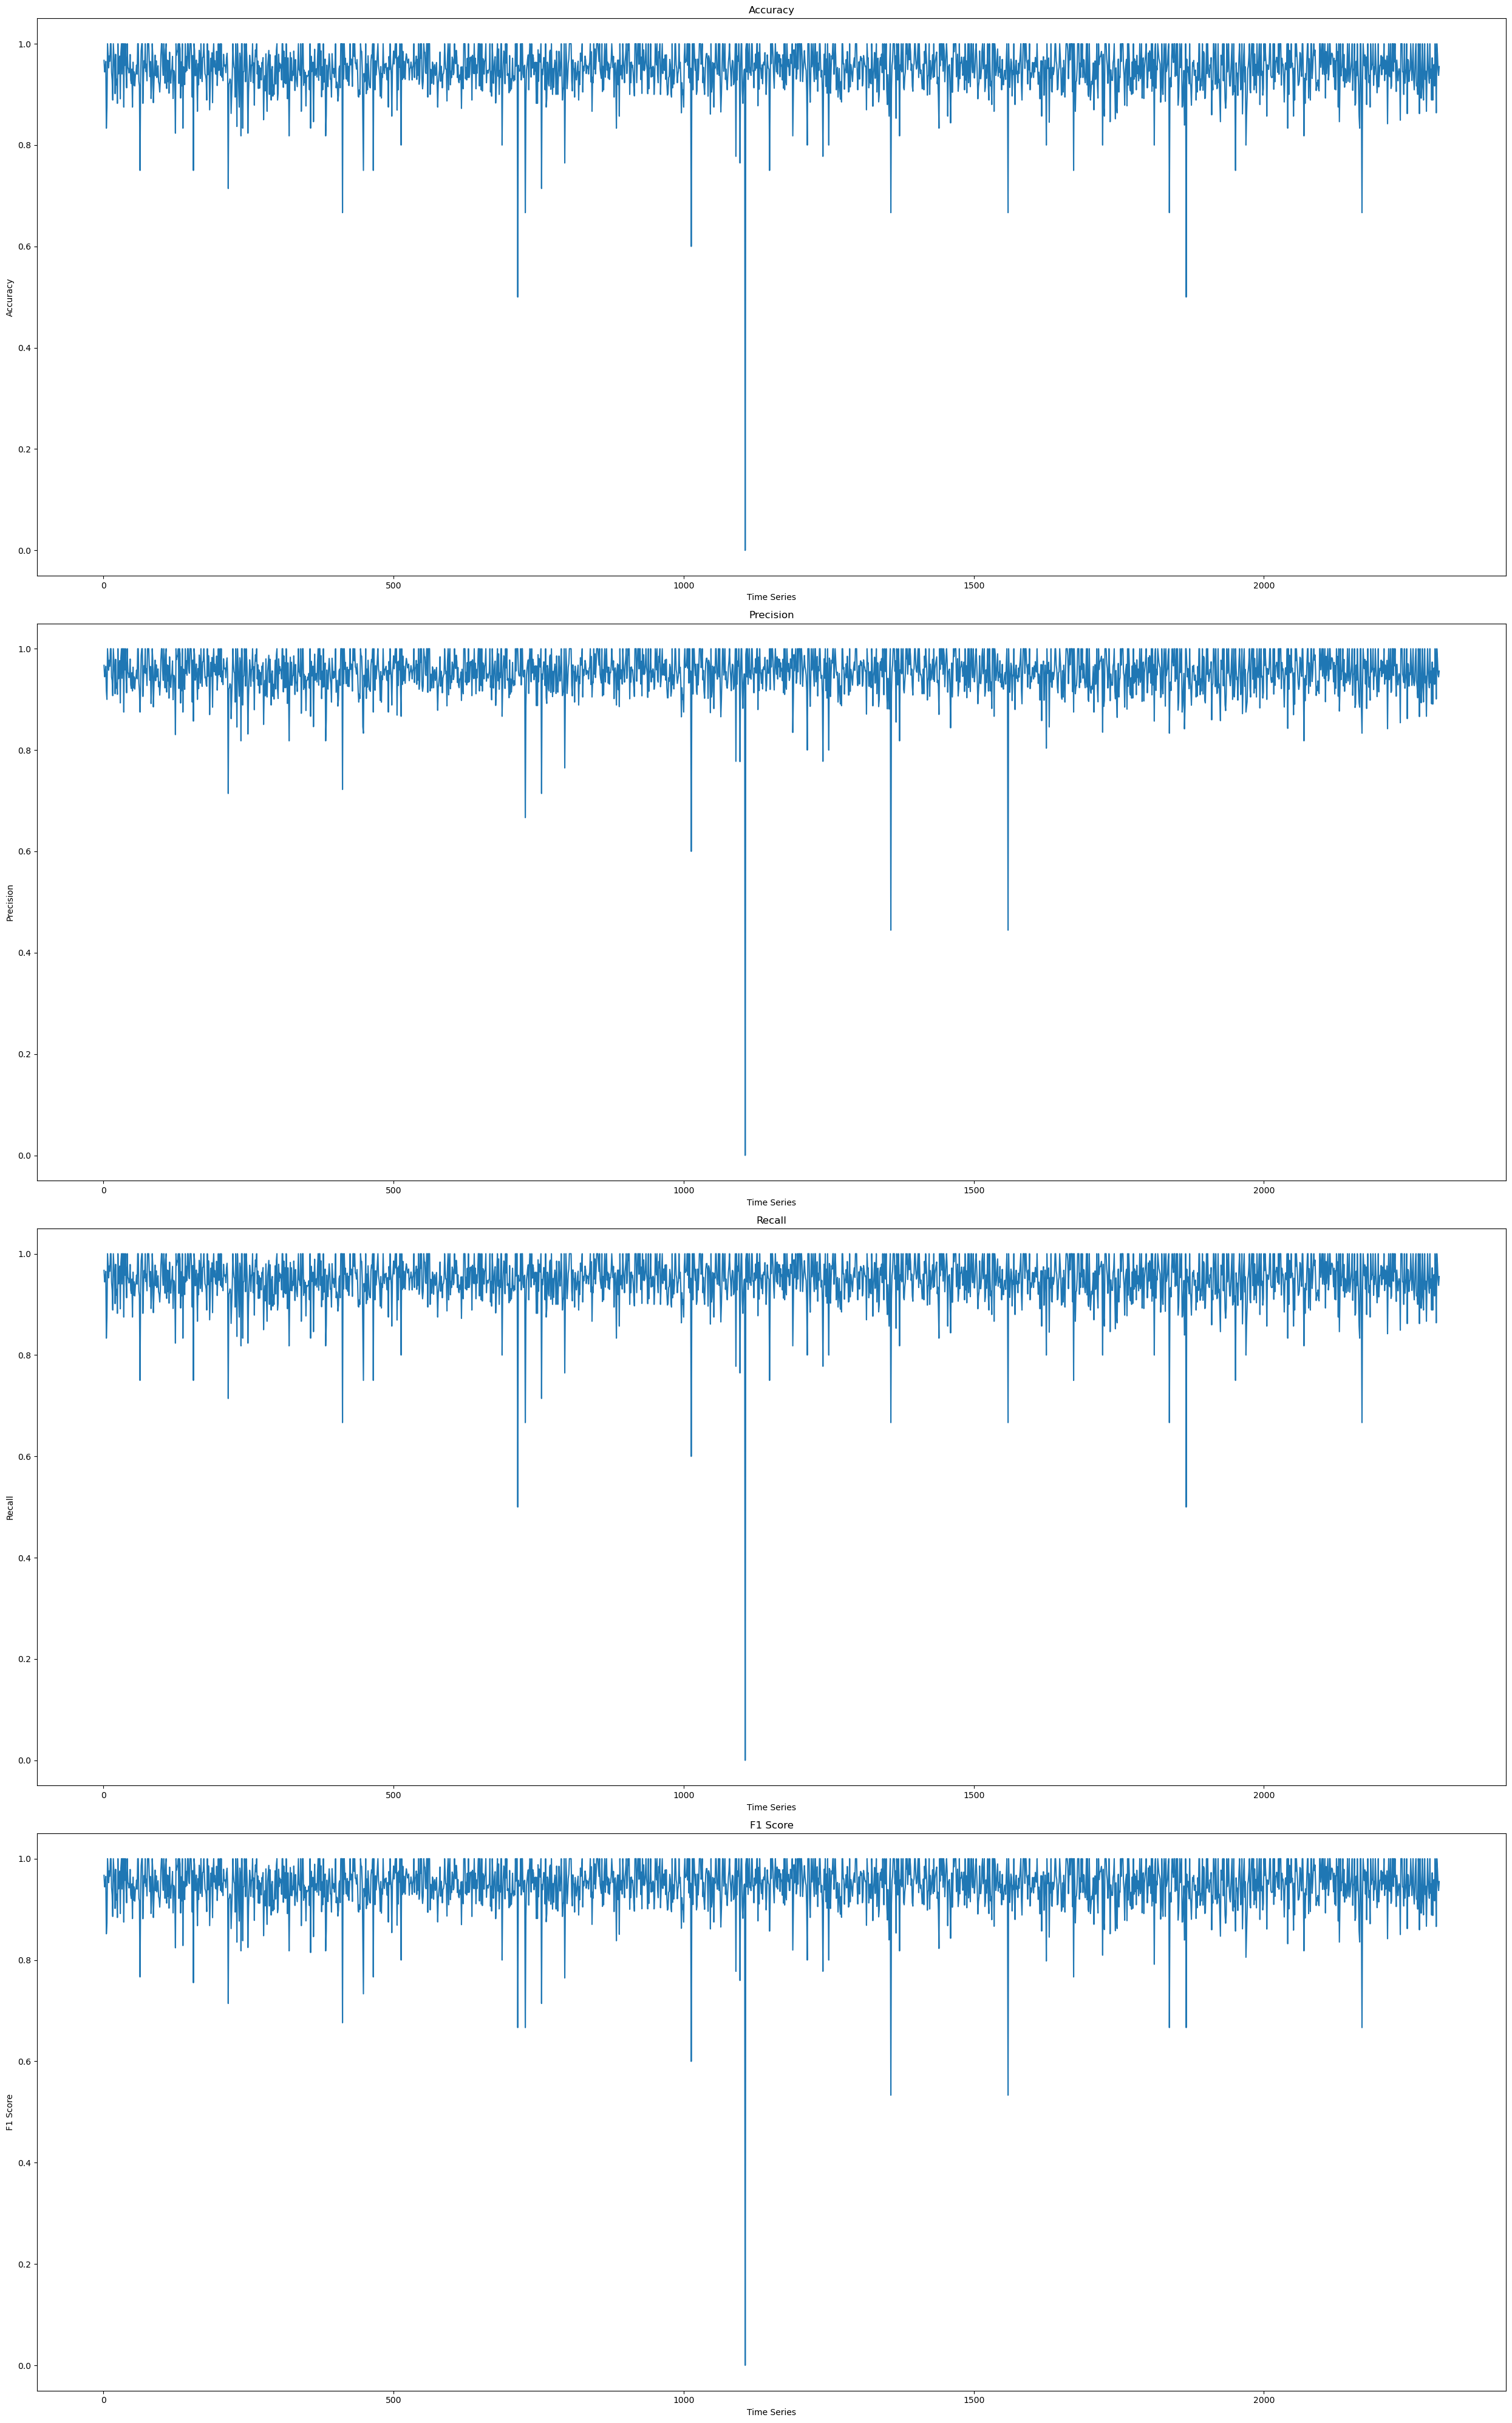

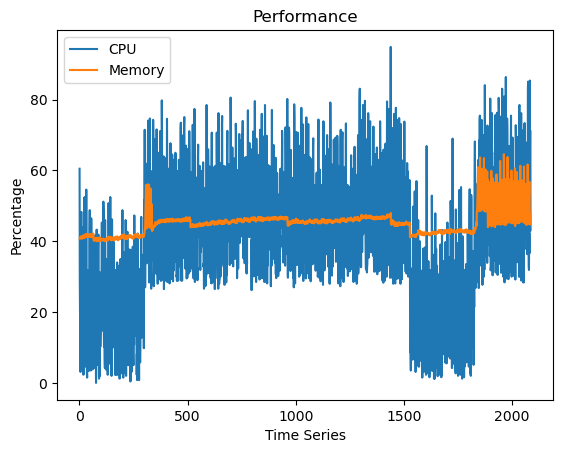

In [4]:
    x_axis = list(range(1, x))
    
    # Store metrics in a table
    metrics_table = pd.DataFrame(result)
    pd.set_option('display.max_rows', None)
    print(metrics_table)

    # Calculate mean, variance, and standard deviation
    mean_accuracy = np.mean(result['accuracy'])
    var_accuracy = np.var(result['accuracy'])
    std_accuracy = np.std(result['accuracy'])

    mean_precision = np.mean(result['precision'])
    var_precision = np.var(result['precision'])
    std_precision = np.std(result['precision'])

    mean_recall = np.mean(result['recall'])
    var_recall = np.var(result['recall'])
    std_recall = np.std(result['recall'])

    mean_f1 = np.mean(result['f1'])
    var_f1 = np.var(result['f1'])
    std_f1 = np.std(result['f1'])

    # Print the calculated values
    print("Accuracy - Mean:", mean_accuracy, "Variance:", var_accuracy, "Standard Deviation:", std_accuracy)
    print("Precision - Mean:", mean_precision, "Variance:", var_precision, "Standard Deviation:", std_precision)
    print("Recall - Mean:", mean_recall, "Variance:", var_recall, "Standard Deviation:", std_recall)
    print("F1-Score - Mean:", mean_f1, "Variance:", var_f1, "Standard Deviation:", std_f1)

    

    # Set the figure size
    #plt.figure(figsize=(25, 10))

    # Accuracy
    #plt.plot(x_axis, result['accuracy'], label="Accuracy")
    #plt.xlabel('Time Series')
    #plt.ylabel('Accuracy')
    #plt.title('Accuracy')


    # F1 Score
    #plt.plot(x_axis, result['f1'], label="F1 Score")
    #plt.xlabel('Time Series')
    #plt.ylabel('F1 Score')
    #plt.title('F1 Score')
    
    # Precision
    #plt.plot(x_axis, result['precision'], label="Precision")
    #plt.xlabel('Time Series')
    #plt.ylabel('Precision')
    #plt.title('Precision')

    # Recall
    #plt.plot(x_axis, result['recall'], label="Recall")
    #plt.xlabel('Time Series')
    #plt.ylabel('Percentage')
    #plt.title('Time Series Graph')
    #plt.legend()
    #plt.show()

    # Set the figure size
    fig, axes = plt.subplots(nrows=4, figsize=(25, 40))

    # Accuracy
    axes[0].plot(x_axis, result['accuracy'])
    axes[0].set_xlabel('Time Series')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_title('Accuracy')

    # Precision
    axes[1].plot(x_axis, result['precision'])
    axes[1].set_xlabel('Time Series')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision')

    # Recall
    axes[2].plot(x_axis, result['recall'])
    axes[2].set_xlabel('Time Series')
    axes[2].set_ylabel('Recall')
    axes[2].set_title('Recall')

    # F1 Score
    axes[3].plot(x_axis, result['f1'])
    axes[3].set_xlabel('Time Series')
    axes[3].set_ylabel('F1 Score')
    axes[3].set_title('F1 Score')

    plt.tight_layout()
    plt.show()
    
    x_axis = list(range(1, z))
    plt.plot(x_axis, performance['cpu'], label="CPU")
    plt.plot(x_axis, performance['memory'], label="Memory")
    plt.xlabel('Time Series')
    plt.ylabel('Percentage')
    plt.title('Performance')
    plt.legend()
    plt.show()
    